# Trade-Ahead-Prediction  

## Objective  
This project focuses on analyzing stock price data and financial indicators for companies listed on the New York Stock Exchange (NYSE). The goal is to group stocks based on their characteristics using clustering techniques and provide actionable insights into the features of each group.  

Trade&Ahead, a financial consultancy firm, aims to use this analysis to deliver personalized investment strategies to its customers.  

---

## Data Description  
The dataset contains information on stock prices and financial indicators such as ROE, earnings per share, and P/E ratio. Below is a summary of the data fields:  

- **Ticker Symbol**: Abbreviation used to uniquely identify publicly traded shares of a particular stock on a stock market.  
- **Company**: Name of the company.  
- **GICS Sector**: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations.  
- **GICS Sub Industry**: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations.  
- **Current Price**: Current stock price in dollars.  
- **Price Change**: Percentage change in the stock price in 13 weeks.  
- **Volatility**: Standard deviation of the stock price over the past 13 weeks.  
- **ROE**: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt).  
- **Cash Ratio**: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities.  
- **Net Cash Flow**: The difference between a company's cash inflows and outflows (in dollars).  
- **Net Income**: Revenues minus expenses, interest, and taxes (in dollars).  
- **Earnings Per Share**: Company's net profit divided by the number of common shares it has outstanding (in dollars).  
- **Estimated Shares Outstanding**: The number of shares of the company's stock currently held by all its shareholders.  
- **P/E Ratio**: Ratio of the company's current stock price to the earnings per share.  
- **P/B Ratio**: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities).  

---

## Exploratory Data Analysis (EDA) Questions  

1. **What does the distribution of stock prices look like?**  
   Analyze the spread and skewness of stock prices to understand pricing patterns.  

2. **The stocks of which economic sector have seen the maximum price increase on average?**  
   Identify sectors showing significant growth trends based on price changes.  

3. **How are the different variables correlated with each other?**  
   Use correlation analysis to identify relationships between financial indicators (e.g., ROE, P/E Ratio) and stock performance.  

4. **How does the average cash ratio vary across economic sectors?**  
   Examine the ability of companies in each sector to meet short-term obligations using cash equivalents.  

5. **How does the P/E ratio vary, on average, across economic sectors?**  
   Analyze P/E ratios to determine how investors value stocks in different sectors relative to earnings.  

---

In [450]:
!pip  install kneed

In [451]:
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# # Import standard scalar
from sklearn.preprocessing import StandardScaler
# # Import Robust scalar

from kneed import KneeLocator

# distances
from scipy.spatial.distance import cdist, pdist

# Lib To  perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from yellowbrick.cluster import SilhouetteVisualizer
import scipy.cluster.hierarchy as sch

# importing library
from sklearn.decomposition import PCA
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")
# Set pandas display option to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_colwidth', None)


In [452]:
# mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [453]:
path='/content/drive/MyDrive/Python Course'

In [454]:
# store pellete for future use
pellete='Set2'
colors = sns.color_palette(pellete)  # Get Set2 color palette for future use
sns.set(style="darkgrid") # Set grid style

## **Data Overview**

- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data
- Check for missing values
- Check for null values

In [455]:
# load the data in to panda dataframe
trad_df=pd.read_csv(f'{path}/stock_data.csv')

In [456]:
# Deep copy the dataframe to avoid chnage to orginal one
trade_ahead_df=trad_df.copy(deep=True)

In [457]:
# Detail info about the dataset
trade_ahead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [458]:
# shape of dataframe
trade_ahead_df.shape

(340, 15)

There are 340 rows and 15 columns

In [459]:
trade_ahead_df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines          42.35         10.00        1.69  135   
1        Pharmaceuticals          59.24          8.34        2.20  130   
2  Health Care Equipment          44.91         11.30        1.27   21   
3   Application Software          93.94         13.98        1.36    9   
4         Semiconductors          55.32         -1.83        1.70   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                  668129938.50       3.72      -8.78  
1                 1633015873.00      18.81      -8.75  
2                 1504421769.00      15.28      -0.39  
3                  499643650.80      74.56       4.20  
4                 2247993548.00     178.45       1.06

### Observations

- **Total Entries:** `340`  
- **Total Columns:** `15`  

#### **Column Details:**

1. **`Ticker Symbol`**  
   - **Type:** `Object` (String)  

2. **`Security`**  
   - **Type:** `Object` (String)  

3. **`GICS Sector`**  
   - **Type:** `Object` (String)  

4. **`GICS Sub Industry`**  
   - **Type:** `Object` (String)  

5. **`Current Price`**  
   - **Type:** `Float`  

6. **`Price Change`**  
   - **Type:** `Float`  

7. **`Volatility`**  
   - **Type:** `Float`  

8. **`ROE`**  
   - **Type:** `Int`  

9. **`Cash Ratio`**  
   - **Type:** `Int`  

10. **`Net Cash Flow`**  
    - **Type:** `Int`  

11. **`Net Income`**  
    - **Type:** `Int`  

12. **`Earnings Per Share`**  
    - **Type:** `Float`  

13. **`Estimated Shares Outstanding`**  
    - **Type:** `Float`  

14. **`P/E Ratio`**  
    - **Type:** `Float`  

15. **`P/B Ratio`**  
    - **Type:** `Float`  

### Summary
- **Total Categorical Columns:** 4
- **Total Numerical Columns:** 11

In [460]:
# Stats summary of number fields
trade_ahead_df.describe(include='number').T


count          mean           std  \
Current Price                340.00         80.86         98.06   
Price Change                 340.00          4.08         12.01   
Volatility                   340.00          1.53          0.59   
ROE                          340.00         39.60         96.55   
Cash Ratio                   340.00         70.02         90.42   
Net Cash Flow                340.00   55537620.59 1946365312.18   
Net Income                   340.00 1494384602.94 3940150279.33   
Earnings Per Share           340.00          2.78          6.59   
Estimated Shares Outstanding 340.00  577028337.75  845849595.42   
P/E Ratio                    340.00         32.61         44.35   
P/B Ratio                    340.00         -1.72         13.97   

                                         min           25%          50%  \
Current Price                           4.50         38.55        59.70   
Price Change                          -47.13         -0.94         4.82   
Volatility                              0.73          1.13         1.39   
ROE                                     1.00          9.75        15.00   
Cash Ratio                              0.00         18.00        47.00   
Net Cash Flow                -11208000000.00 -193906500.00   2098000.00   
Net Income                   -23528000000.00  352301250.00 707336000.00   
Earnings Per Share                    -61.20          1.56         2.90   
Estimated Shares Outstanding     27672156.86  158848216.10 309675137.80   
P/E Ratio                               2.94         15.04        20.82   
P/B Ratio                             -76.12         -4.35        -1.07   

                                       75%            max  
Current Price                        92.88        1274.95  
Price Change                         10.70          55.05  
Volatility                            1.70           4.58  
ROE                                  27.00         917.00  
Cash Ratio                           99.00         958.00  
Net Cash Flow                 169810750.00 20764000000.00  
Net Income                   1899000000.00 24442000000.00  
Earnings Per Share                    4.62          50.09  
Estimated Shares Outstanding  573117457.32  6159292035.00  
P/E Ratio                            31.76         528.04  
P/B Ratio                             3.92         129.06

### Observations:
- **Current Price:**
  The prices vary significantly, ranging from 4.50 to 1,274.95, with a high standard deviation of 98.06.
  The median (59.70) is much lower than the mean (80.86), indicating potential outliers on the higher end.

- **Price Change:**
  Most price changes are small, with a median of 4.82 and an interquartile range (IQR) from -0.94 to 10.70.
  The negative minimum value (-47.13) suggests some stocks experienced significant price drops, while others had sharp increases (maximum of 55.05).
  
- **Volatility:**
  Volatility is relatively low overall, with a mean of 1.53 and a small range (0.73 to 4.58).
  Most values fall between 1.13 (25th percentile) and 1.70 (75th percentile).
  
- **Return on Equity (ROE):**
  ROE has an extremely wide range, from 1.00 to 917.00, and a high standard deviation (96.55).
  A median of 15.00 suggests most companies have moderate ROE, but some outliers have exceptionally high values.

- **Cash Ratio:**
  The median cash ratio is 47.00, suggesting companies generally have enough cash to cover short-term liabilities.
  However, the high maximum (958.00) and large standard deviation (90.42) indicate outliers with significant cash reserves.

- **Net Cash Flow:**
  The mean (55.54 million) is heavily influenced by extreme values, with a range from -11.2 billion to 20.8 billion .
  The median (2.10 million) is much smaller, highlighting the skewed distribution.

- **Net Income:**
  Similar to cash flow, net income has a wide range from -23.5 billion to 24.4 billion, with a median of 707.3 million.
  The mean (1.49 billion) is higher, again influenced by a few high-performing companies.

- **Earnings Per Share (EPS):**
  EPS varies widely, from -61.20 to 50.09, with a median of 2.90.
  A mean of 2.78 and relatively high standard deviation (6.59) indicate a few companies with extreme negative or positive earnings.
  
- **Estimated Shares Outstanding:**
  Share counts vary significantly, from ~27.7 million to ~6.16 billion, with a median of ~309.7 million.
  The large range and high standard deviation (845.85 million) reflect diverse company sizes.

- **P/E Ratio:**
  The average P/E ratio is 32.61, but the range (2.94 to 528.04) suggests a mix of undervalued and overvalued stocks.
  The median (20.82) indicates most stocks are moderately priced relative to earnings.

- **P/B Ratio:**
  The mean P/B ratio is negative (-1.72), driven by outliers on the lower end (-76.12), indicating some companies have significant liabilities or low equity.
  Most values are within the IQR (-4.35 to 3.92), with a median of -1.07.

In [461]:
# Summary of object fields
trade_ahead_df.describe(include='object').T


count unique                                 top freq
Ticker Symbol       340    340                                 AAL    1
Security            340    340             American Airlines Group    1
GICS Sector         340     11                         Industrials   53
GICS Sub Industry   340    104  Oil & Gas Exploration & Production   16

### Observations:
- **Security and Ticker Symbol:**
  Each security name is unique which is similar to Ticker Symbol

- **GICS Sector:**
  There are 11 unique sectors in total, with the Industrials sector being the most represented (53 companies).
  This suggests a strong focus on industrials within the dataset.
- **GICS Sub-Industry:**
  The dataset includes 104 unique sub-industries, with Oil & Gas Exploration & Production being the largest group (16 companies).
  This indicates a relatively broad distribution of companies across sub-industries, but some sub-industries (like oil & gas) are more prevalent.

In [462]:
trade_ahead_df.groupby(['GICS Sector', 'GICS Sub Industry']).describe()

Current Price  \
                                                                           count   
GICS Sector                 GICS Sub Industry                                      
Consumer Discretionary      Advertising                                     2.00   
                            Apparel, Accessories & Luxury Goods             1.00   
                            Auto Parts & Equipment                          2.00   
                            Automobile Manufacturers                        2.00   
                            Broadcasting & Cable TV                         2.00   
...                                                                          ...   
Telecommunications Services Alternative Carriers                            1.00   
                            Integrated Telecommunications Services          4.00   
Utilities                   Electric Utilities                             12.00   
                            MultiUtilities                                 11.00   
                            Water Utilities                                 1.00   

                                                                          \
                                                                    mean   
GICS Sector                 GICS Sub Industry                              
Consumer Discretionary      Advertising                            49.47   
                            Apparel, Accessories & Luxury Goods    80.61   
                            Auto Parts & Equipment                 64.48   
                            Automobile Manufacturers               24.05   
                            Broadcasting & Cable TV                80.15   
...                                                                  ...   
Telecommunications Services Alternative Carriers                   54.36   
                            Integrated Telecommunications Services 27.62   
Utilities                   Electric Utilities                     51.92   
                            MultiUtilities                         53.50   
                            Water Utilities                        59.75   

                                                                          \
                                                                     std   
GICS Sector                 GICS Sub Industry                              
Consumer Discretionary      Advertising                            37.04   
                            Apparel, Accessories & Luxury Goods      NaN   
                            Auto Parts & Equipment                 30.05   
                            Automobile Manufacturers               14.09   
                            Broadcasting & Cable TV                35.26   
...                                                                  ...   
Telecommunications Services Alternative Carriers                     NaN   
                            Integrated Telecommunications Services 17.56   
Utilities                   Electric Utilities                     15.07   
                            MultiUtilities                         26.40   
                            Water Utilities                          NaN   

                                                                          \
                                                                     min   
GICS Sector                 GICS Sub Industry                              
Consumer Discretionary      Advertising                            23.28   
                            Apparel, Accessories & Luxury Goods    80.61   
                            Auto Parts & Equipment                 43.23   
                            Automobile Manufacturers               14.09   
                            Broadcasting & Cable TV                55.21   
...                                                                  ...   
Telecommunications Services Alternative Carriers                   54.36   


### Observations:
It seems there are so many of sub industry which have only one stock listed  in dataset so the standad deviation is nan

In [463]:
## Find those where only one stock
grpd_trade_df=trade_ahead_df.groupby(['GICS Sector', 'GICS Sub Industry'])['GICS Sub Industry'].count().reset_index(name='count')
grpd_trade_df[grpd_trade_df['count']==1]

GICS Sector                            GICS Sub Industry  \
1         Consumer Discretionary          Apparel, Accessories & Luxury Goods   
6         Consumer Discretionary                             Casinos & Gaming   
7         Consumer Discretionary                         Consumer Electronics   
8         Consumer Discretionary                                 Distributors   
9         Consumer Discretionary                             Home Furnishings   
12        Consumer Discretionary                         Household Appliances   
13        Consumer Discretionary                     Housewares & Specialties   
16        Consumer Discretionary                     Motorcycle Manufacturers   
17        Consumer Discretionary                                   Publishing   
19        Consumer Discretionary                             Specialty Retail   
21        Consumer Discretionary                               Tires & Rubber   
22              Consumer Staples                        Agricultural Products   
23              Consumer Staples                                      Brewers   
24              Consumer Staples                                  Drug Retail   
27              Consumer Staples                            Personal Products   
38                    Financials                   Financial Exchanges & Data   
42                    Financials                        Multi-Sector Holdings   
43                    Financials                         Multi-line Insurance   
46                    Financials                   Thrifts & Mortgage Finance   
52                   Health Care               Life Sciences Tools & Services   
60                   Industrials              Diversified Commercial Services   
61                   Industrials            Electrical Components & Equipment   
62                   Industrials                       Environmental Services   
63                   Industrials         Human Resource & Employment Services   
66                   Industrials                         Industrial Materials   
69                   Industrials  Technology, Hardware, Software and Supplies   
70                   Industrials                                     Trucking   
72        Information Technology                            Computer Hardware   
75        Information Technology           Electronic Equipment & Instruments   
76        Information Technology                  Home Entertainment Software   
79        Information Technology                         Networking Equipment   
80        Information Technology                      Semiconductor Equipment   
82        Information Technology   Technology Hardware, Storage & Peripherals   
84                     Materials                                       Copper   
87                     Materials                                         Gold   
88                     Materials                             Industrial Gases   
89                     Materials                     Metal & Glass Containers   
92                     Materials                                        Steel   
93                   Real Estate                                 Office REITs   
95                   Real Estate                         Real Estate Services   
99   Telecommunications Services                         Alternative Carriers   
103                    Utilities                              Water Utilities   

     count  
1        1  
6        1  
7        1  
8        1  
9        1  
12       1  
13       1  
16       1  
17       1  
19       1  
21       1  
22       1  
23       1  
24       1  
27       1  
38       1  
42       1  
43       1  
46       1  
52       1  
60       1  
61       1  
62       1  
63       1  
66       1  
69       1  
70       1  
72       1  
75       1  
76       1  
79       1  
80       1  
82       1  
84       1  
87       1  
88       1  
89       1  
92       1  
93       1  
95       1  
99  

### Insights for Industries with Count = 1

In the dataset, the following industries have exactly one record. This could indicate that these industries are underrepresented or have very specific data:

- **Consumer Discretionary:**
  - Apparel, Accessories & Luxury Goods
  - Casinos & Gaming
  - Consumer Electronics
  - Distributors
  - Home Furnishings
  - Household Appliances
  - Housewares & Specialties
  - Motorcycle Manufacturers
  - Publishing
  - Specialty Retail
  - Tires & Rubber
  
- **Consumer Staples:**
  - Agricultural Products
  - Brewers
  - Drug Retail
  - Personal Products

- **Financials:**
  - Financial Exchanges & Data
  - Multi-Sector Holdings
  - Multi-line Insurance
  - Thrifts & Mortgage Finance

- **Health Care:**
  - Life Sciences Tools & Services

- **Industrials:**
  - Diversified Commercial Services
  - Electrical Components & Equipment
  - Environmental Services
  - Human Resource & Employment Services
  - Industrial Materials
  - Technology, Hardware, Software and Supplies
  - Trucking

- **Information Technology:**
  - Computer Hardware
  - Electronic Equipment & Instruments
  - Home Entertainment Software
  - Networking Equipment
  - Semiconductor Equipment
  - Technology Hardware, Storage & Peripherals

- **Materials:**
  - Copper
  - Gold
  - Industrial Gases
  - Metal & Glass Containers
  - Steel

- **Real Estate:**
  - Office REITs
  - Real Estate Services

- **Telecommunications Services:**
  - Alternative Carriers

- **Utilities:**
  - Water Utilities

These industries might be worth further investigation to understand why their counts are so low. Perhaps they are niche markets, or they might need more data aggregation.

#### Quick Check On Data

In [464]:
# Check for duplicates in dataset
has_duplicates = trade_ahead_df.duplicated().any()

print(f"Does the DataFrame have duplicates? {has_duplicates}")

Does the DataFrame have duplicates? False


In [465]:
# check for null values
trade_ahead_df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [466]:
# check for missing value
trade_ahead_df.isna().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

### Observations:
No missing value or null value

In [467]:
# Unique values of sector
trade_ahead_df['GICS Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Consumer Staples', 'Utilities', 'Financials', 'Real Estate',
       'Materials', 'Consumer Discretionary', 'Energy',
       'Telecommunications Services'], dtype=object)

In [468]:
# Unique values of industry
trade_ahead_df['GICS Sub Industry'].unique()

array(['Airlines', 'Pharmaceuticals', 'Health Care Equipment',
       'Application Software', 'Semiconductors', 'Agricultural Products',
       'Data Processing & Outsourced Services', 'MultiUtilities',
       'Electric Utilities', 'Life & Health Insurance',
       'Property & Casualty Insurance', 'REITs', 'Multi-line Insurance',
       'Insurance Brokers', 'Internet Software & Services',
       'Specialty Chemicals', 'Building Products', 'Biotechnology',
       'Semiconductor Equipment', 'Electrical Components & Equipment',
       'Asset Management & Custody Banks', 'Specialized REITs',
       'Internet & Direct Marketing Retail', 'Specialty Stores',
       'Managed Health Care', 'Oil & Gas Exploration & Production',
       'Electronic Components', 'Aerospace & Defense',
       'Home Entertainment Software', 'Residential REITs',
       'Water Utilities', 'Consumer Finance', 'Banks',
       'Oil & Gas Equipment & Services', 'Metal & Glass Containers',
       'Health Care Distributors',

### Utils

In [469]:
def plot_bar_chart_percentage(df, column_name, xlabel, pellete, bar_width=0.6):
    """
    Plots the percentage distribution of a specified categorical column in a DataFrame.

    Parameters:
    - df: DataFrame containing the data.
    - column_name: The name of the column to analyze.
    - colors: List of colors for the bar plot.
    - figsize: Tuple specifying the figure size.
    - bar_width: Width of the bars in the bar plot.
    """
    # Calculate the percentage of each category in the specified column
    percentages = df[column_name].value_counts(normalize=True)*100
    percentages = percentages.reset_index().rename(columns={ column_name: column_name, 'proportion': 'percent'})
    n=df[column_name].nunique()
    # Increase figure size for better readability
    plt.figure(figsize=(n+1,6))

    # Plot the bar plot with reduced bar width
    ax=sns.barplot(x=column_name, y='percent', data=percentages, palette=pellete,hue=column_name, width=bar_width)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    # Set labels and title
    plt.ylabel('Percentage')
    plt.xlabel(xlabel)
    plt.title(f'Overview of {xlabel}')
    plt.xticks(rotation=45)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


    # Show the plot
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.legend([],[], frameon=False)
    plt.show()


In [470]:
def plot_pie_chart_with_legend(df, column, title=None, colors=None):
    """
    Creates a pie chart with a legend showing the share of each category in a column.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column (str): The column name for which the pie chart will be created.
    - title (str, optional): Title of the pie chart. Default is "Market Segment Proportions".
    - colors (list, optional): List of colors for the pie chart wedges. If not provided, default pastel colors will be used.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Calculate proportions
    proportions = df[column].value_counts(normalize=True)

    # Create the pie chart without annotations
    plt.pie(proportions, labels=None, colors=colors, wedgeprops={'edgecolor': 'white'})

    # Generate legend labels with percentages
    legend_labels = [f'{label}: {percent:.1%}' for label, percent in zip(proportions.index, proportions)]

    # Add the legend
    plt.legend(legend_labels, loc='best', title=column.replace('_', ' ').title())

    # Add title and adjust layout
    plt.title(title)
    plt.tight_layout()

    # Return the plot
    return plt

In [471]:
def plot_histogram_and_boxplot(df, column, xlabel, ylabel, title):
    """
    Plots a histogram with KDE and a box plot for a specified column in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    column (str): The column name for which the plots are to be drawn.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    title (str): The title for the graph.
    Returns:
    None
    """
    # Calculate percentiles
    q25 = df[column].quantile(0.25)
    q50 = df[column].quantile(0.50)
    q75 = df[column].quantile(0.75)
    mean_value = df[column].mean()
    # Create the figure and set the size
    f, (hist, box) = plt.subplots(nrows=2, sharex=True, figsize=(8, 10))

    # Create the histogram with KDE
    sns.histplot(data=df, x=column, ax=hist, kde=True, legend=True, color=colors[1])
    hist.set_xlabel(xlabel)
    hist.axvline(mean_value, color='peru', linestyle=':', label='Mean')
    hist.axvline(q25, color='green', linestyle='--', label='25th percentile')
    hist.axvline(q50, color='blue', linestyle='-', label='50th percentile (Median)')
    hist.axvline(q75, color='purple', linestyle='--', label='75th percentile')
    hist.set_ylabel(ylabel)
    hist.legend()

    # Create the box plot in a subplot below the histogram
    sns.boxplot(data=df, x=column, ax=box, color=colors[1])
    box.axvline(mean_value, color='peru', linestyle=':', label=f'Mean: {mean_value:.2f}')
    box.axvline(q25, color='green', linestyle='--', label=f'25th percentile: {q25:.2f}')
    box.axvline(q50, color='blue', linestyle='-', label=f'50th percentile: {q50:.2f}')
    box.axvline(q75, color='purple', linestyle='--', label=f'75th percentile: {q75:.2f}')

    # Setting the x-label and title on the shared axis and figure
    box.set_xlabel(xlabel)
    f.suptitle(title)

    # Adjust layout and show the combined plots
    f.tight_layout(rect=[0, 0, 1, 0.95])
    box.legend()  # Add legend to the box plot for the percentiles


In [472]:
def draw_count_plot(df, x, xlabel, ylabel, title, hue=None):
    """
    Draws a count plot for a specified column in a DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - x (str): The column name to be used for the x-axis categories.
    - xlabel (str): The label for the x-axis.
    - ylabel (str): The label for the y-axis.
    - title (str): The title for the plot.
    - hue (str, optional): The column name to be used for hue (categorical separation). Default is None.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object.
    """
    # Create the plot
    count=df[x].nunique()
    plt.figure(figsize=(count + 1, 4))
    ax = sns.countplot(data=df, x=x, hue=hue, palette='Set2')
    plt.xticks(rotation=45)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Annotate the plot with the count values
    annotate_chart(plt, ax)

    return plt

In [473]:
def annotate_chart(plot, ax):
    """
    Annotates a chart with the height of each bar.

    Parameters:
    - plot (matplotlib.pyplot): The matplotlib plot object.
    - ax (Axes): The Axes object to annotate.
    """
    for p in ax.patches:
        height = p.get_height()

        # Only annotate if height is significant, and avoid zero or near-zero annotations
        if height > 0.001:
            plot.annotate(f'{format(height, ".1f")}% ',          # Annotate with 1 decimal places
                          (p.get_x() + p.get_width() / 2., height),  # Position the annotation at the top of the bar
                          ha='center', va='center',       # Center the annotation
                          xytext=(0, 4),                  # Small offset to avoid overlapping with the bar
                          textcoords='offset points')


In [474]:

def plot_avg_metrics_by_category(df, group_col, metric_cols, title, xlabel, ylabel, figsize=(14, 10), color_palette=pellete):
    """
    Plots a bar chart of average metrics by a specified category.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        group_col (str): The column name to group by (e.g., 'GICS Sector').
        metric_cols (list): List of metric column names to calculate averages for.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        figsize (tuple): Size of the plot (default is (12, 6)).
        color_palette (str): Color palette for the plot (default is 'viridis').

    Returns:
        None: Displays the bar plot.
    """
    # Group by the specified column and calculate the mean for the selected metrics
    avg_df = df.groupby(group_col)[metric_cols].mean()

    # Plot the grouped data
    ax = avg_df.plot(kind='bar', figsize=figsize, colormap=color_palette)

    # Customize the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.legend(title="Metrics", loc='best')
    plt.tight_layout()  # Adjust layout to prevent label cutoff

    # Show the plot
    plt.show()

In [475]:
def plot_boxplot(df, x_col, y_col, hue_col=None, title=None, xlabel=None, figsize=(8, 5), xticks_rotation=90):
    """
    Creates a box plot to visualize the relationship between variables.

    Parameters:
    - df: pandas DataFrame containing the data.
    - x_col: str, column name for the x-axis.
    - y_col: str, column name for the y-axis.
    - hue_col: str, column name for grouping by color (optional).
    - title: str, title of the plot (optional).
    - xlabel: str, label for the x-axis (optional).
    - figsize: tuple, size of the figure (default is (8, 5)).
    - xticks_rotation: int, rotation angle for x-axis tick labels (default is 90).
      Returns:
    - plt (matplotlib.pyplot): The matplotlib plot object with annotations.
    """

    plt.figure(figsize=figsize)  # Set the figure size
    bxp = sns.boxplot(data=df, x=x_col, y=y_col, hue=hue_col,palette="Set2")  # Create the box plot

    if xlabel:
        bxp.set_xlabel(xlabel)  # Set x-axis label if provided
    if title:
        bxp.axes.set_title(title)  # Set the plot title if provided

    plt.xticks(rotation=xticks_rotation)  # Rotate x-axis labels
    return plt


In [476]:
def draw_box_plot_with_legend(df, x, xlabel, color='red'):
    """
    Draws a box plot with a vertical line indicating the mean value and includes a legend.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    mean_value = df[x].mean()
    sns.boxplot(data=df, x=x, color=color)
    plt.xlabel(xlabel)
    plt.axvline(mean_value, color='green', linestyle=':', label=f'Mean: {mean_value:.2f}')
    plt.legend()
    return plt

In [477]:
def plot_box_plot_side_by_side(df, x, xlabel, category_col, color='red'):
    """
    Plots side-by-side box plots for different categories in a DataFrame.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data to plot.
    - x (str): The name of the column in the DataFrame to be plotted.
    - xlabel (str): The label for the x-axis.
    - category_col (str): The column name in the DataFrame used to categorize the data.
    - color (str, optional): The color of the box plot. Default is 'red'.

    Returns:
    - plt (matplotlib.pyplot): The matplotlib pyplot object for further customization or saving.
    """
    # Extract unique categories
    categories = df[category_col].unique()

    # Create subplots with 1 row and the number of columns equal to the number of categories
    fig, axes = plt.subplots(1, len(categories), figsize=(12, 6))

    # Loop over each category and plot
    for i, category in enumerate(categories):
        plt.sca(axes[i])  # Set the current axes
        subset = df[df[category_col] == category]
        draw_box_plot_with_legend(subset, x, xlabel, color=color)
        axes[i].set_title(f'{category.capitalize()}')

    plt.tight_layout()
    return plt

In [478]:
def create_catplot_with_annotations(df, x, hue, col, colors, height=4, aspect=1, title="Catplot with Annotations", annotation_color='b'):
    """
    Creates a catplot with count kind, a color palette, axis labels, title, and annotations.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x (str): The name of the column for the x-axis.
    hue (str): The name of the column for hue.
    col (str): The name of the column for creating subplots.
    colors (tuple): A tuple of two colors for the palette.
    height (int): The height of each facet (default is 4).
    aspect (float): Aspect ratio of each facet (default is 1).
    title (str): The title of the plot (default is "Catplot with Annotations").
    annotation_color (str): The color of the annotations (default is 'b').
    """
    # Create the catplot
    catplot = sns.catplot(data=df, x=x, hue=hue, col=col, kind='count', height=height, aspect=aspect, palette=colors)

    # Set axis labels and title
    catplot.set_axis_labels(x, 'Count')
    catplot.set_titles(col_template="{col_name}")
    catplot.fig.suptitle(title, y=1.02)  # Title with a bit of padding

    # Add annotations with specified color
    for ax in catplot.axes.flat:
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                        color=annotation_color)

In [479]:

def distribution_plot_wrt_target(data, predictor, target, xlabel1=None, xlabel2=None, showhistogram=False,figsize=(12,8)):
    """
    Plots the distribution of a predictor variable with respect to a target variable.

    This function creates a 2x2 grid of plots, including:
    1. Histograms with KDE for each unique value of the target variable (if showhistogram=True).
    2. A boxplot showing the distribution of the predictor variable grouped by the target variable.
    3. A boxplot showing the distribution of the predictor variable grouped by the target variable without outliers.

    Parameters:
    - data (DataFrame): The input DataFrame containing the data.
    - predictor (str): The name of the predictor variable (column) to visualize.
    - target (str): The name of the target variable (column) to group the data by.
    - xlabel1 (str): Label for the x-axis of the first histogram.
    - xlabel2 (str): Label for the x-axis of the second histogram.
    - showhistogram (bool): If True, histograms with KDE plots will be displayed.

    Returns:
    - None: Displays the plots but does not return any values.
    """

    fig, axs = plt.subplots(2, 2, figsize=figsize)
    target_uniq = data[target].unique()

    if showhistogram:
        # Histogram for the first unique target value
        axs[0, 0].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[0]))
        sns.histplot(
            data=data[data[target] == target_uniq[0]],
            x=predictor,
            kde=True,
            ax=axs[0, 0],
            color=colors[0],
            stat="density",
        )
        axs[0, 0].set_xlabel(xlabel1)

        # Histogram for the second unique target value
        axs[0, 1].set_title("Distribution of " + predictor + " for target=" + str(target_uniq[1]))
        sns.histplot(
            data=data[data[target] == target_uniq[1]],
            x=predictor,
            kde=True,
            ax=axs[0, 1],
            color=colors[1],
            stat="density",
        )
        axs[0, 1].set_xlabel(xlabel2)
    else:
        # If no histograms are shown, hide the first row
        axs[0, 0].axis('off')
        axs[0, 1].axis('off')

    # Boxplot with outliers
    axs[1, 0].set_title("Boxplot of " + predictor + " w.r.t " + target)
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], color=colors[0])

    # Boxplot without outliers
    axs[1, 1].set_title("Boxplot (without outliers) of " + predictor + " w.r.t " + target)
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        color=colors[1],
        showmeans=True
    )

    plt.tight_layout()
    plt.show()



In [480]:
def plot_barplot_with_correct_annotations(data, x, y, title=None, xlabel=None, ylabel=None, figsize=(10, 6), rotation=45, color=None, add_numbers=True, fmt="{:.2f}", small_value_threshold=1e6):
    """
    Creates a bar plot and correctly positions annotations for both positive and negative values.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data to plot.
        x (str): The column name for the x-axis.
        y (str): The column name for the y-axis.
        title (str, optional): Title of the plot.
        xlabel (str, optional): Label for the x-axis.
        ylabel (str, optional): Label for the y-axis.
        figsize (tuple, optional): Size of the plot.
        rotation (int, optional): Rotation for x-axis labels.
        color (str, optional): Color of the bars.
        add_numbers (bool, optional): Whether to add numbers on top of the bars.
        fmt (str, optional): Format for the numbers.
        small_value_threshold (float, optional): Threshold for determining small values for adjusted annotation placement.

    Returns:
        None: Displays the bar plot.
    """
    # Create the plot
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=data, x=x, y=y, ci=None, color=color)

    # Format large numbers
    def format_large_values(value):
        if abs(value) >= 1e9:
            return f"{value/1e9:.2f}B"
        elif abs(value) >= 1e6:
            return f"{value/1e6:.2f}M"
        else:
            return f"{value:.2f}"

    # Add annotations
    if add_numbers:
        for p in ax.patches:
            value = p.get_height()
            if not pd.isna(value):  # Avoid NaN values
                # Adjust position based on positive or negative value
                # Scale offset for small values and large values
                if abs(value) < small_value_threshold:
                    offset = 0  # No offset for small values
                else:
                    offset = 5e7 if value > 0 else -5e7

                ax.annotate(
                    format_large_values(value),
                    (p.get_x() + p.get_width() / 2., value + offset),
                    ha='center',
                    va='bottom' if value > 0 else 'top',
                    fontsize=9,
                    color='black'
                )

    # Customize the plot
    if title:
        plt.title(title, fontsize=14)
    plt.xlabel(xlabel if xlabel else x, fontsize=12)
    plt.ylabel(ylabel if ylabel else y, fontsize=12)
    plt.xticks(rotation=rotation, fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Adjust layout
    plt.tight_layout()
    plt.show()


In [481]:
def plot_cluster_boxplots(data,cluster_col, title="Boxplot of Numerical Variables for Each Cluster",
                          figsize=(20, 20), palette=pellete):
    """
    Generates a boxplot of numerical variables for each cluster with specified colors.

    Parameters:
    - data: The DataFrame containing the data to plot.
    - cluster_labels: The cluster labels (e.g., from KMeans or Hierarchical clustering).
    - title: The title for the plot.
    - figsize: The size of the plot.
    - palette: The color palette or list of colors to use for the clusters.

    Returns:
    - A plot showing the boxplots for each cluster and numerical variable.
    """

    # Set up the plot
    plt.figure(figsize=figsize)
    plt.suptitle(title)

    # Selecting numerical columns
    num_col = data.select_dtypes(include=np.number).columns.tolist()
    num_col = list(filter(lambda col: col != 'clusters',num_col))

    # Create a boxplot for each numerical variable
    for i, variable in enumerate(num_col):
        plt.subplot(3, 4, i + 1)  # You can adjust the layout here based on the number of variables
        sns.boxplot(data=data, x=cluster_col, y=variable, palette=palette)

    # Adjust layout and show the plot
    plt.tight_layout(pad=2.0)
    plt.show()

In [482]:
def plot_high_cophenetic_clusters(data, distance_metrics, linkage_methods, threshold=0.9):
    """
    Tries all combinations of distance metrics and linkage methods, computes cophenetic correlation,
    and plots dendrograms for combinations with a cophenetic correlation above the given threshold.

    Parameters:
        data (pd.DataFrame): The dataset for hierarchical clustering.
        distance_metrics (list): List of distance metrics to try (e.g., ["euclidean", "chebyshev"]).
        linkage_methods (list): List of linkage methods to try (e.g., ["single", "complete"]).
        threshold (float): Minimum cophenetic correlation for plotting dendrograms. Default is 0.9.
    """
    # Store results
    results = []
    high_corr_combinations = []

    # Iterate through all combinations of distance metrics and linkage methods
    for dm in distance_metrics:
        for lm in linkage_methods:
            try:
                # Perform hierarchical clustering
                Z = linkage(data, method=lm, metric=dm)

                # Compute cophenetic correlation
                c, coph_dists = cophenet(Z, pdist(data, metric=dm))

                # Store results
                results.append({"Distance": dm, "Linkage": lm, "Cophenetic Corr": c})

                # If cophenetic correlation exceeds the threshold, plot the dendrogram
                if c >= threshold:
                    high_corr_combinations.append((dm, lm, c))
                    plt.figure(figsize=(10, 6))
                    sch.dendrogram(Z)
                    plt.title(f"Dendrogram ({dm.capitalize()} distance, {lm.capitalize()} linkage)\n"
                              f"Cophenetic Corr: {c:.4f}")
                    plt.xlabel("Samples")
                    plt.ylabel("Distance")
                    plt.show()

            except Exception as e:
                print(f"Error with {dm} distance and {lm} linkage: {e}")

    # Display summary of results
    print("\n--- Summary of Results ---")
    for result in sorted(results, key=lambda x: x["Cophenetic Corr"], reverse=True):
        print(f"{result['Distance'].capitalize()} distance + {result['Linkage'].capitalize()} linkage: "
              f"Cophenetic Corr = {result['Cophenetic Corr']:.4f}")

    return high_corr_combinations


In [483]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all values smaller than Lower_Whisker will be assigned value of Lower_Whisker
    # all values greater than Upper_Whisker will be assigned value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_apply(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [565]:
def plot_dendrogram(data, method="average", metric="chebyshev", threshold=8, figsize=(10, 5)):
    """
    Plots a dendrogram with a horizontal line at a specified threshold.

    Parameters:
    - data (DataFrame or array): Scaled data to perform hierarchical clustering.
    - method (str): Linkage method to use (e.g., 'single', 'complete', 'average', 'ward').
    - metric (str): Distance metric to use (e.g., 'euclidean', 'chebyshev', 'mahalanobis').
    - threshold (float): Height (distance) at which to draw a horizontal line.
    - figsize (tuple): Figure size for the plot.
    """
    # Perform hierarchical clustering
    Z = linkage(data, method=method, metric=metric)

    # Plot the dendrogram
    plt.figure(figsize=figsize)
    dict=sch.dendrogram(Z, color_threshold=threshold, above_threshold_color='gray')
    plt.axhline(y=threshold, color='r', linestyle='--')  # Horizontal line
    plt.title(f"Dendrogram ({metric.capitalize()} distance, {method.capitalize()} linkage)")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()
    return dict

### EDA  Univariate Analysis

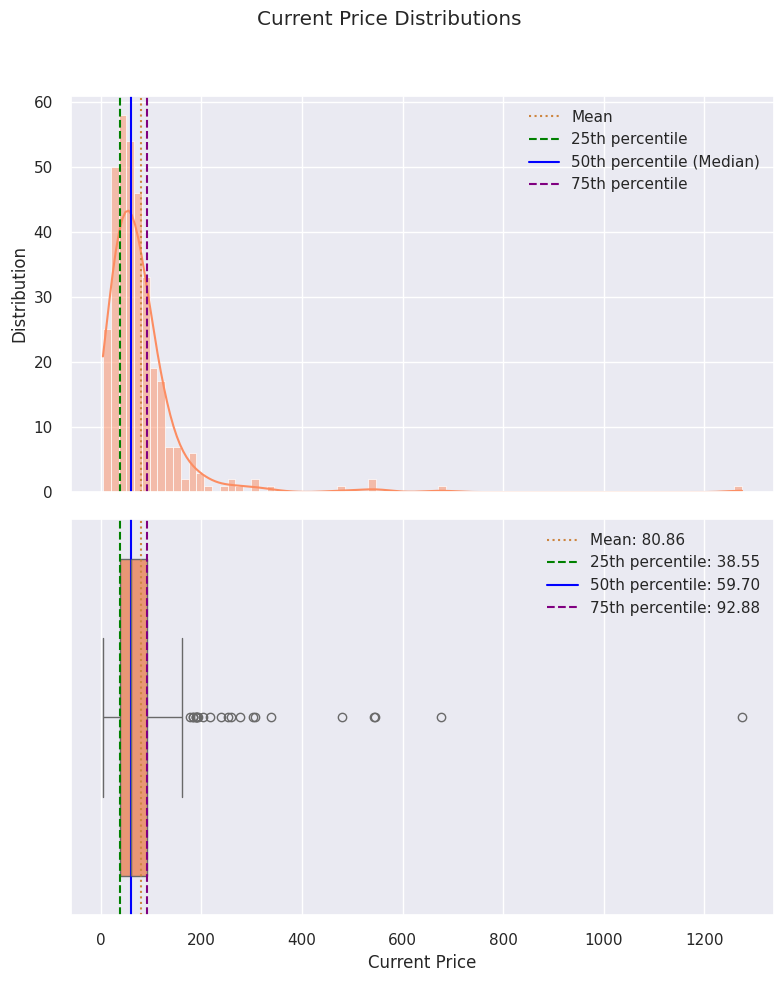

In [484]:
# Draw box plot and histogram to see ditribution of current price
plot_histogram_and_boxplot(trade_ahead_df, 'Current Price', 'Current Price', 'Distribution', 'Current Price Distributions ')

### Observations:
The current price distribution is right-skewed , with a long right tail and mean > median (59.70) . The average current price is around $80.86

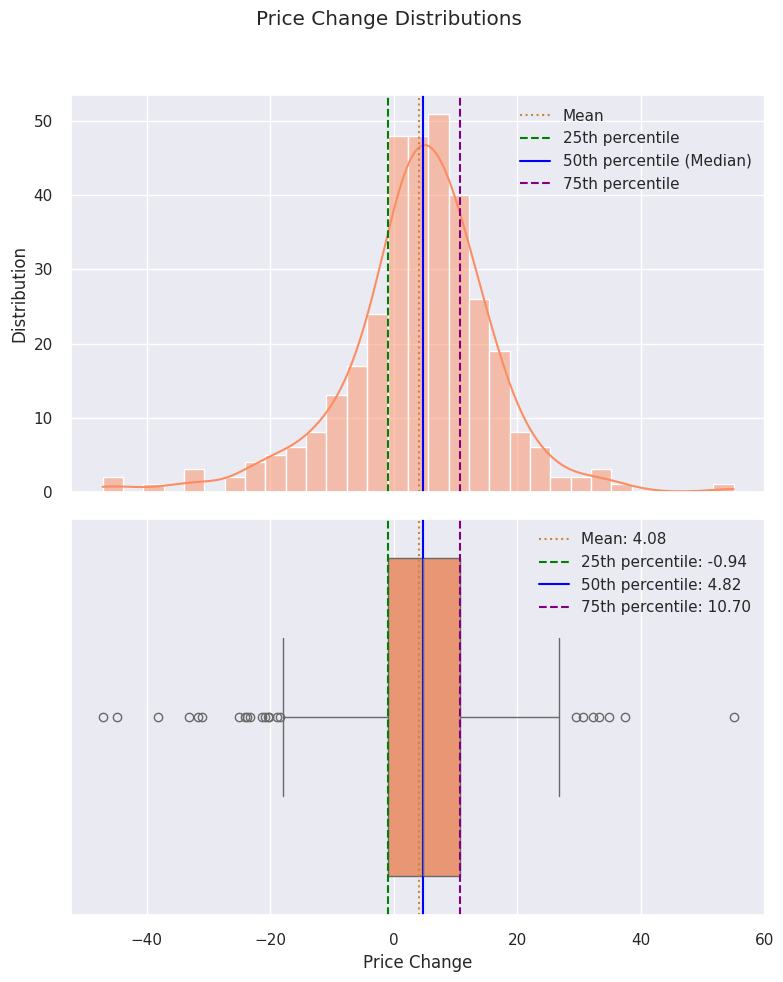

In [485]:
# Draw box plot and histogram to see ditribution of Price Change
plot_histogram_and_boxplot(trade_ahead_df, 'Price Change', 'Price Change', 'Distribution', 'Price Change Distributions ')

### Observations:
The distribution of Price Changes close to normal distribution. Even the mean(4.08) and median (4.82) are near to each other

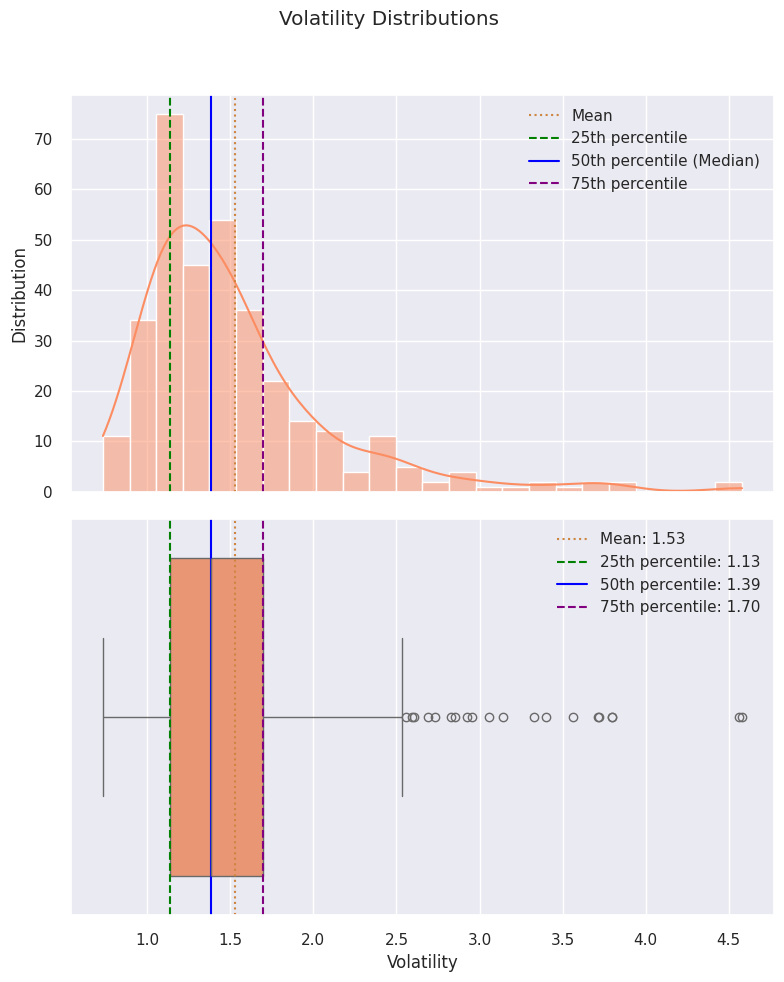

In [486]:
# Draw box plot and histogram to see ditribution of volatility
plot_histogram_and_boxplot(trade_ahead_df, 'Volatility', 'Volatility', 'Distribution', 'Volatility Distributions ')

### Observations:
The distribution of Volatility is right-skewed

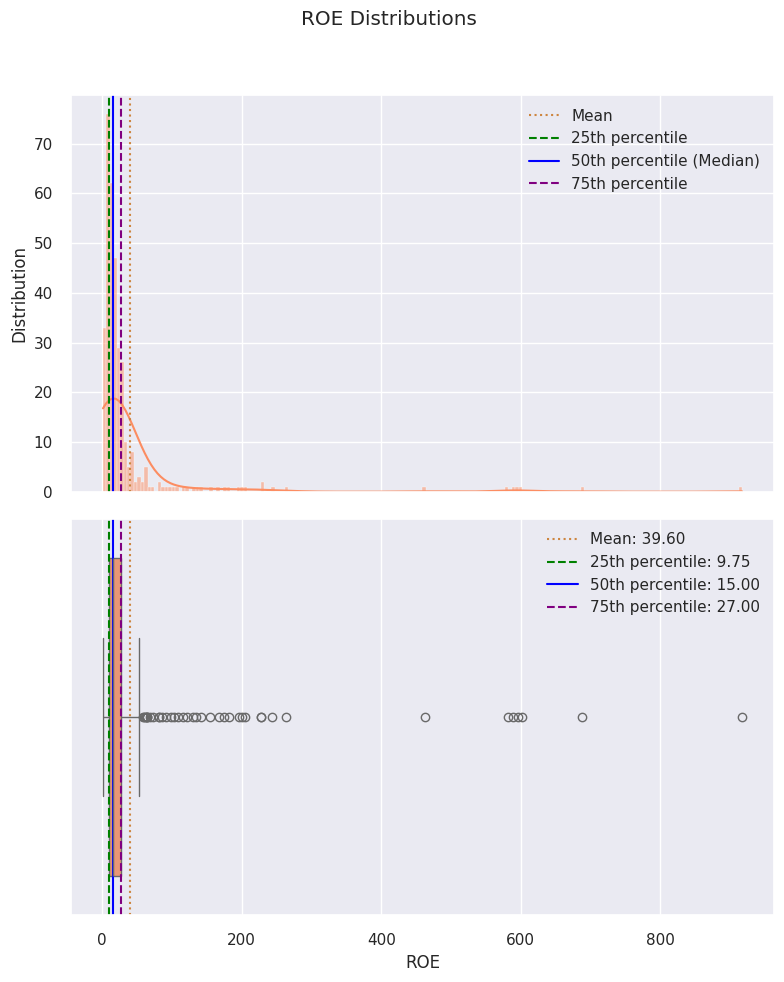

In [487]:
# Draw box plot and histogram to see ditribution of ROE
plot_histogram_and_boxplot(trade_ahead_df, 'ROE', 'ROE', 'Distribution', 'ROE Distributions ')

### Observations:
The distribution of Return on Equity (ROE) is  right-skewed, and most of  the stocks exhibit ROE values below 100.



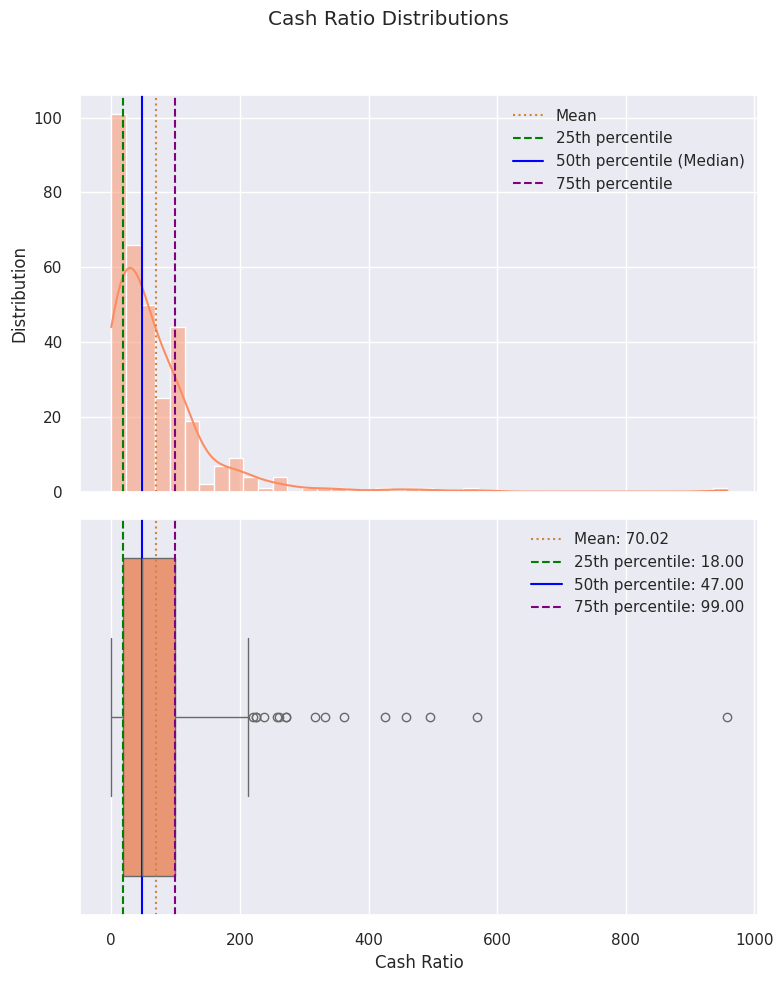

In [488]:
# Draw box plot and histogram to see ditribution of Cash Ratio
plot_histogram_and_boxplot(trade_ahead_df, 'Cash Ratio', 'Cash Ratio', 'Distribution', 'Cash Ratio Distributions ')

### Observations:
The distribution of cash ratios is right-skewed. The distribution has a very long tail to the right and maximum value is near to 1000

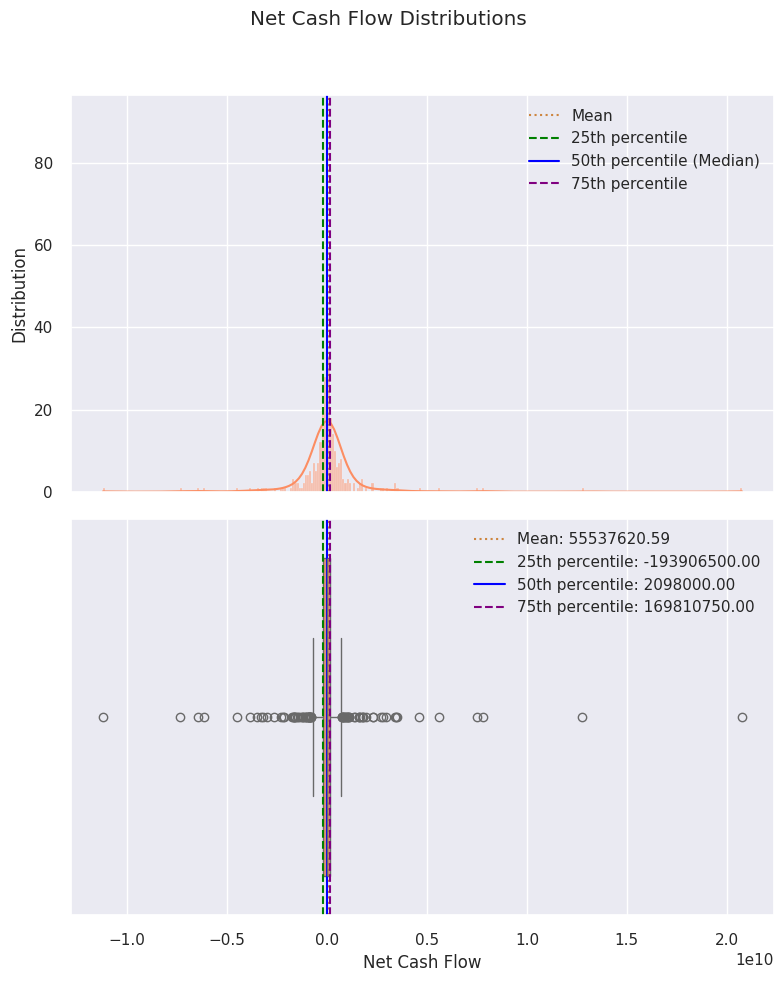

In [489]:
# Draw box plot and histogram to see ditribution of Net Cash Flow
plot_histogram_and_boxplot(trade_ahead_df, 'Net Cash Flow', 'Net Cash Flow', 'Distribution', 'Net Cash Flow Distributions ')

### Observations:
The majority of values in the net cash flow distribution are concentrated within  -193 million to 170 million.

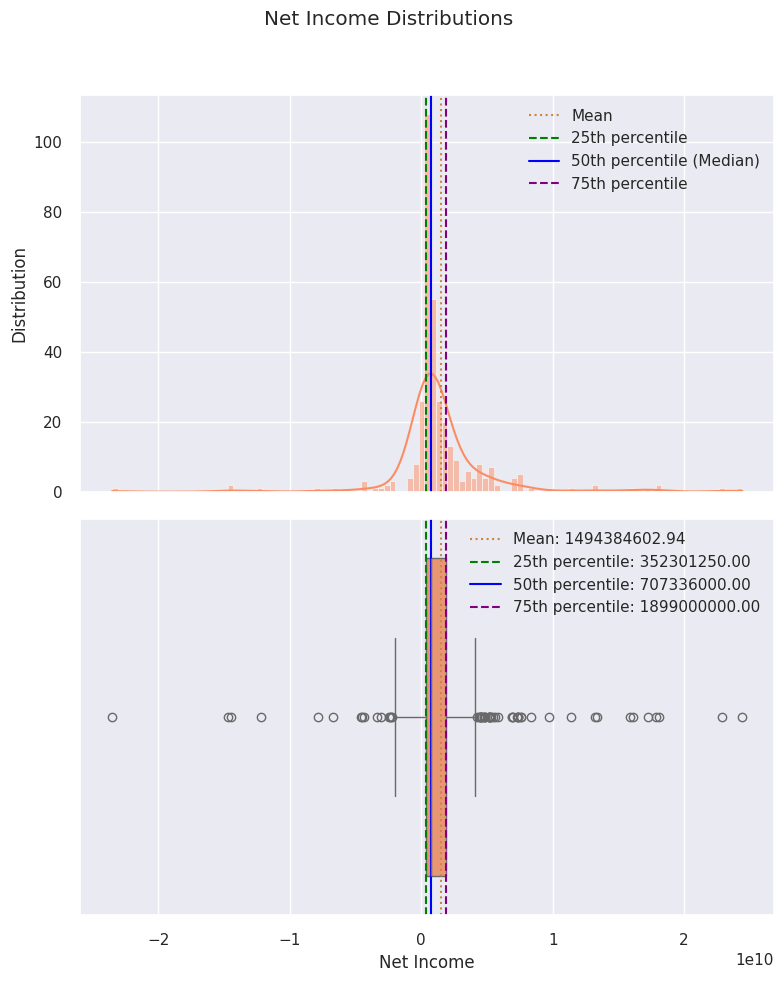

In [490]:
# Draw box plot and histogram to see ditribution of Net Income
plot_histogram_and_boxplot(trade_ahead_df, 'Net Income', 'Net Income', 'Distribution', 'Net Income Distributions ')

### Observations:
 Due to outliers the mean is pulled towards right (mean 1.4billion and median 707 million)

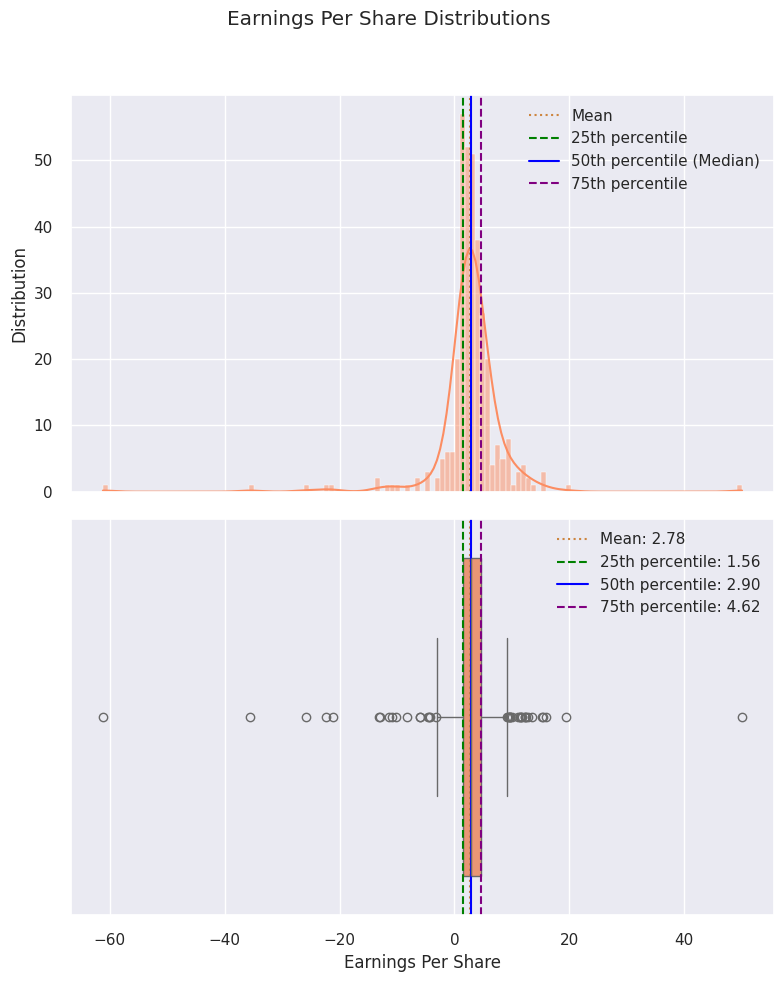

In [491]:
# Draw box plot and histogram to see ditribution of Earnings Per Share
plot_histogram_and_boxplot(trade_ahead_df, 'Earnings Per Share', 'Earnings Per Share', 'Distribution', 'Earnings Per Share Distributions ')

### Observations:
Earnings per share follows a normal distribution

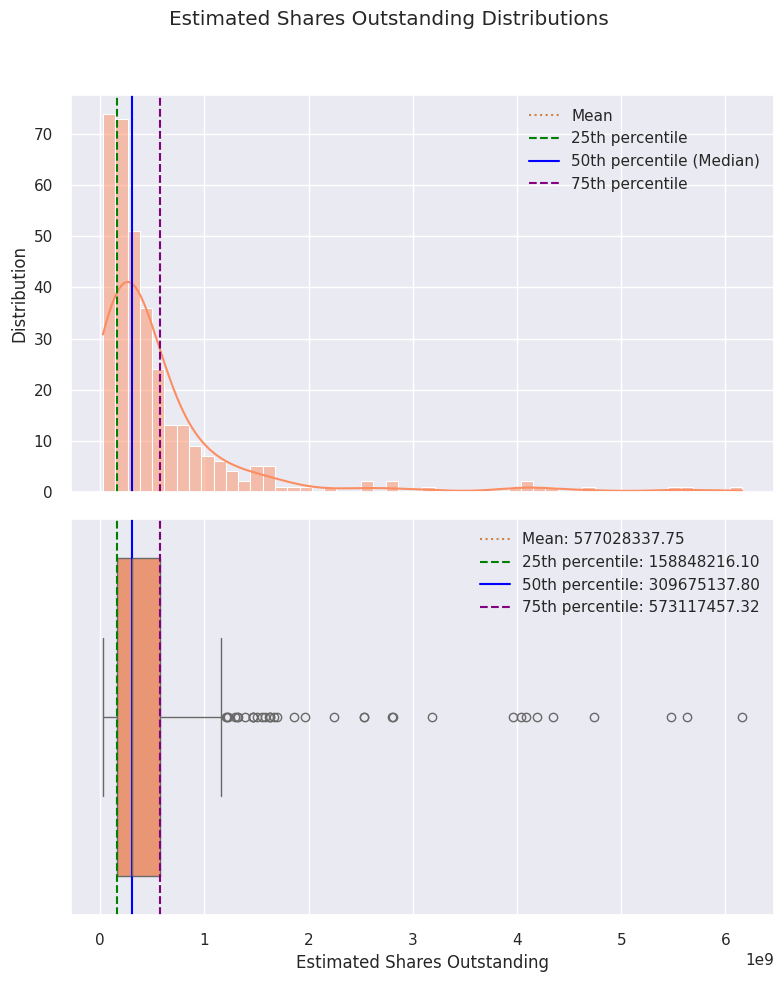

In [492]:
# Draw box plot and histogram to see ditribution of Estimated Shares
plot_histogram_and_boxplot(trade_ahead_df, 'Estimated Shares Outstanding', 'Estimated Shares Outstanding', 'Distribution', 'Estimated Shares Outstanding Distributions ')

### Obersvations:
- The distribution of estimated shares outstanding is right-skewed.
- The majority of companies/entities in this dataset have relatively low shares outstanding.
- A small number of entities with extremely high shares outstanding pull the mean to the right reaching to billions.
- The outliers could represent large corporations or anomalies that need further investigation.


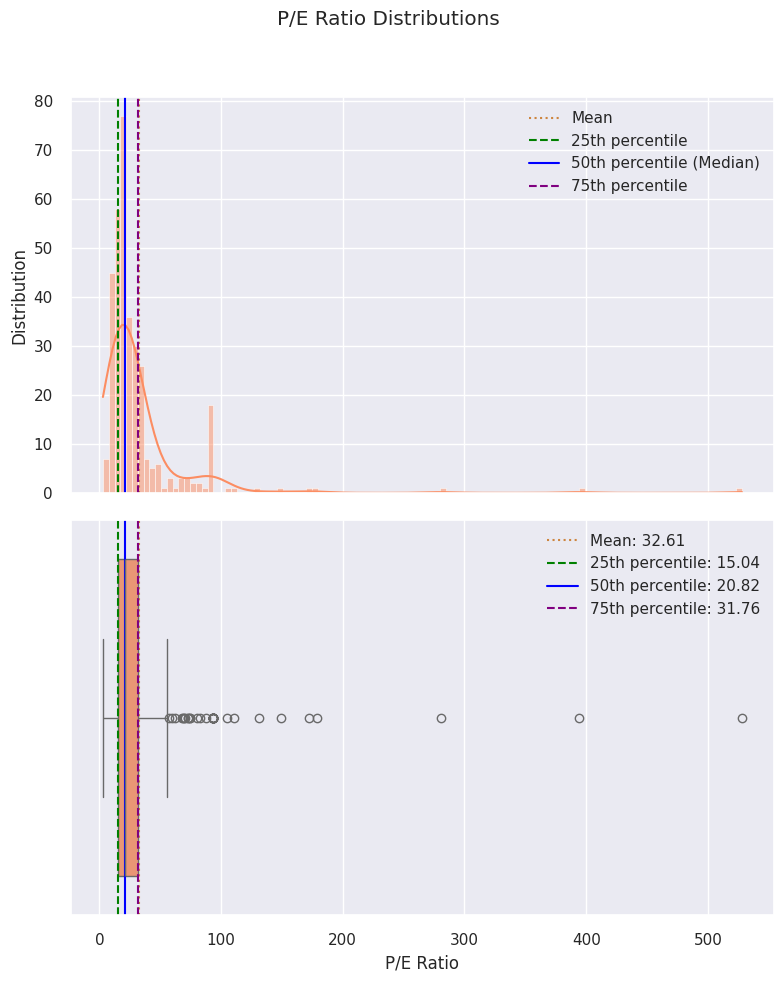

In [493]:
# Draw box plot and histogram to see ditribution of P/E Ratio
plot_histogram_and_boxplot(trade_ahead_df, 'P/E Ratio', 'P/E Ratio', 'Distribution', 'P/E Ratio Distributions ')

### Observations:
The distribution of P/E ratios is right-skewed, with a mean of approximately 32 and  median around 20 .


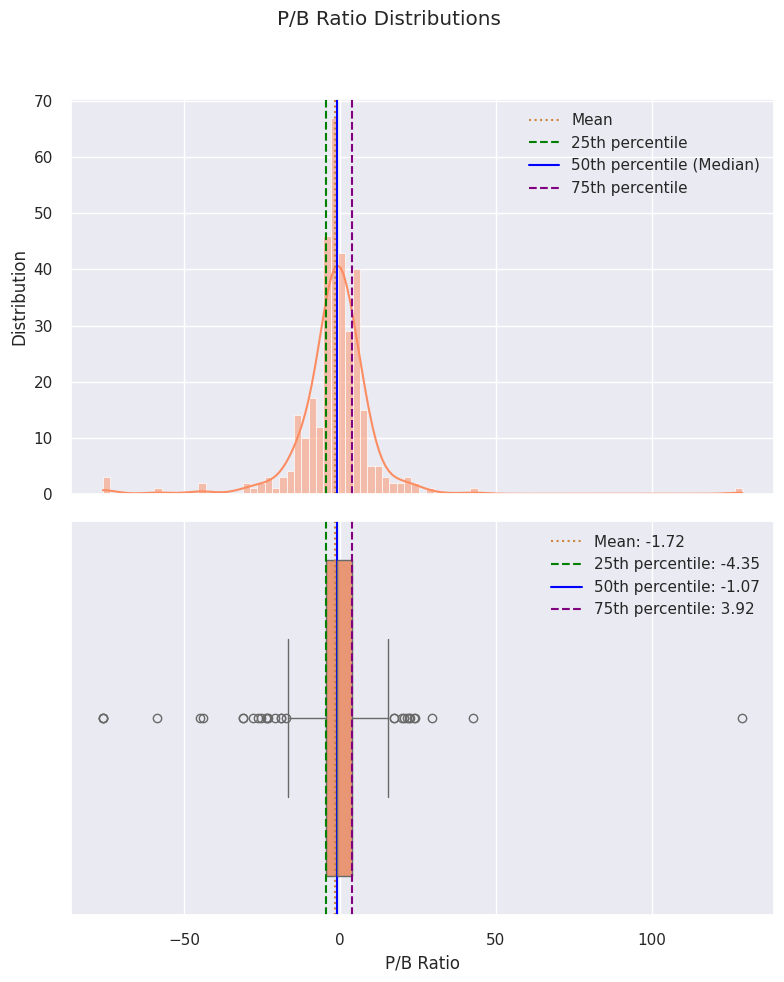

In [494]:
# Draw box plot and histogram to see ditribution of P/B Ratio
plot_histogram_and_boxplot(trade_ahead_df, 'P/B Ratio', 'P/B Ratio', 'Distribution', 'P/B Ratio Distributions ')

### Observations:
- The distribution of P/B ratios looks like normal distributions
-  we have outliers in both side some shares having p/b ratio of near to -80 some are having PB ratio more then 100.
- Majority of shares falls between -4 to 3.92 P/B ratio



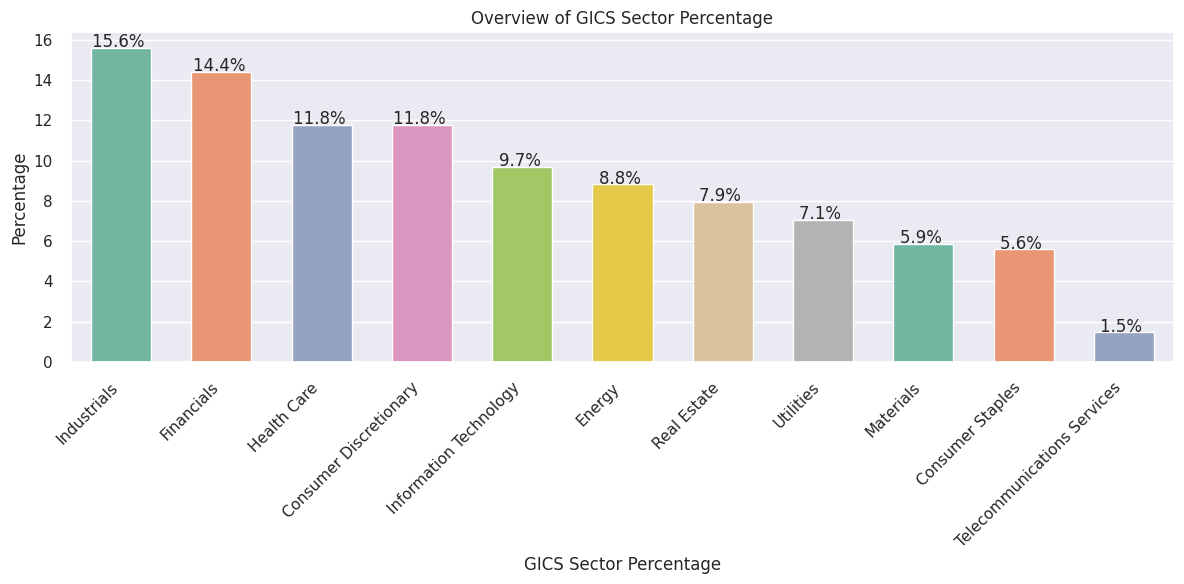

In [495]:
# Bar chart to show sector wise percentage in dataset
plot_bar_chart_percentage(trade_ahead_df, 'GICS Sector', 'GICS Sector Percentage',pellete=pellete)

### Observations:

| **Sector**                    | **Percentage (%)** | **Rank** | **Insight**                                                                                     |
|-------------------------------|--------------------|----------|-------------------------------------------------------------------------------------------------|
| **Industrials**               | 15.6              | 1        | Largest sector, leading in representation.                                                     |
| **Financials**                | 14.4              | 2        | Second largest sector, slightly behind Industrials.                                            |
| **Health Care**               | 11.8              | 3        | Along with Consumer Discretionary, it holds equal weight as the third most significant sector. |
| **Consumer Discretionary**    | 11.8              | 3        | Similar share as Health Care, indicating diverse interests.                                    |
| **Information Technology**    | 9.7               | 5        | Represents the growing impact of tech, though smaller compared to Industrials.                |
| **Energy**                    | 8.8               | 6        | Significant contribution, driven by demand for resources.                                      |
| **Real Estate**               | 7.9               | 7        | Medium-level presence, reflective of global real estate trends.                                |
| **Utilities**                 | 7.1               | 8        | Consistent but less dominant role in the sector.                                               |
| **Materials**                 | 5.9               | 9        | Represents industries like mining and raw material production.                                 |
| **Consumer Staples**          | 5.6               | 10       | Provides essentials but smaller market representation.                                         |
| **Telecommunications Services** | 1.5            | 11       | Smallest sector, indicating low emphasis or niche representation.                              |

Stocks are from 11  industrial sectors.No single sector dominates more than 16% of the dataset. We can see the details in above



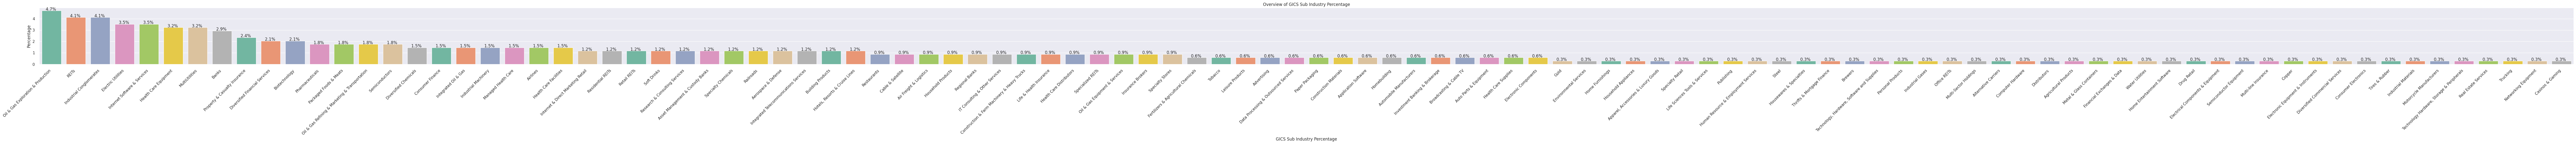

In [496]:
# Bar chart to show industry wise percentage in dataset
plot_bar_chart_percentage(trade_ahead_df, 'GICS Sub Industry', 'GICS Sub Industry Percentage',pellete=pellete,bar_width=0.8)

In [497]:
print(f" Total no of sub industry {trade_ahead_df.groupby('GICS Sub Industry')['GICS Sub Industry'].value_counts().shape[0]}")

 Total no of sub industry 104


In [498]:
# Showing the no of companies of top 10
trade_ahead_df.groupby('GICS Sub Industry')['GICS Sub Industry'].value_counts().sort_values(ascending=False).head(10)

GICS Sub Industry
Oil & Gas Exploration & Production    16
REITs                                 14
Industrial Conglomerates              14
Internet Software & Services          12
Electric Utilities                    12
MultiUtilities                        11
Health Care Equipment                 11
Banks                                 10
Property & Casualty Insurance          8
Diversified Financial Services         7
Name: count, dtype: int64

### Observations:
There are 104 distinct sub-industries in total. Among them, **Oil and Gas** has the highest number of stocks (16), followed by **REITs** and **Industrial Conglomerates**, each with 14. This is followed by **Internet Software & Services** and **Electric Utilities**, both with 12 stocks. Additionally, **Multi-Utilities** and **Health Care Equipment** each have 11 stocks, while there are around 10 stocks in the **Banking** sector.Other stocks are below 10.

In [499]:
trade_ahead_df.columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry',
       'Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

### EDA Bivariate Analysis

#### Sector Vs Price Change Vs Current Price Vs Volatility

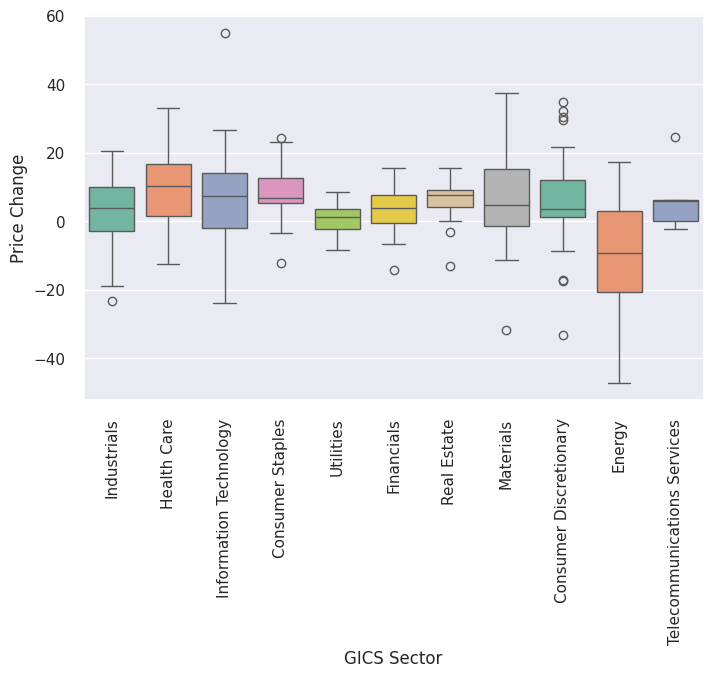

In [500]:
# Box Plot for differnet Sector and price change
plot_boxplot(trade_ahead_df, 'GICS Sector', 'Price Change');

### Observations:
- The Energy sector is the most volatile, making it potentially risky.
- Utilities, Financials, and Consumer Staples are relatively stable and likely appealing to risk-averse investors.

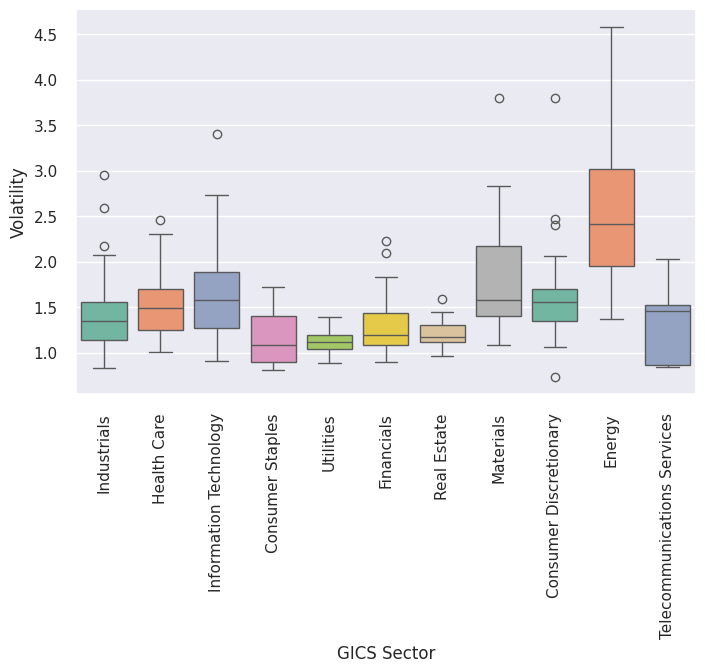

In [501]:
# Box plot to understand distribution of volatility across sectors
plot_boxplot(trade_ahead_df, 'GICS Sector', 'Volatility');

### Obsevations:
- We can see same kind trend on volatility like above.Energy sector is highly volatile .
- Compared to other sectors, the Telecommunications Services sector has low median volatility and a narrow IQR.This has lowest volatility among other sectors

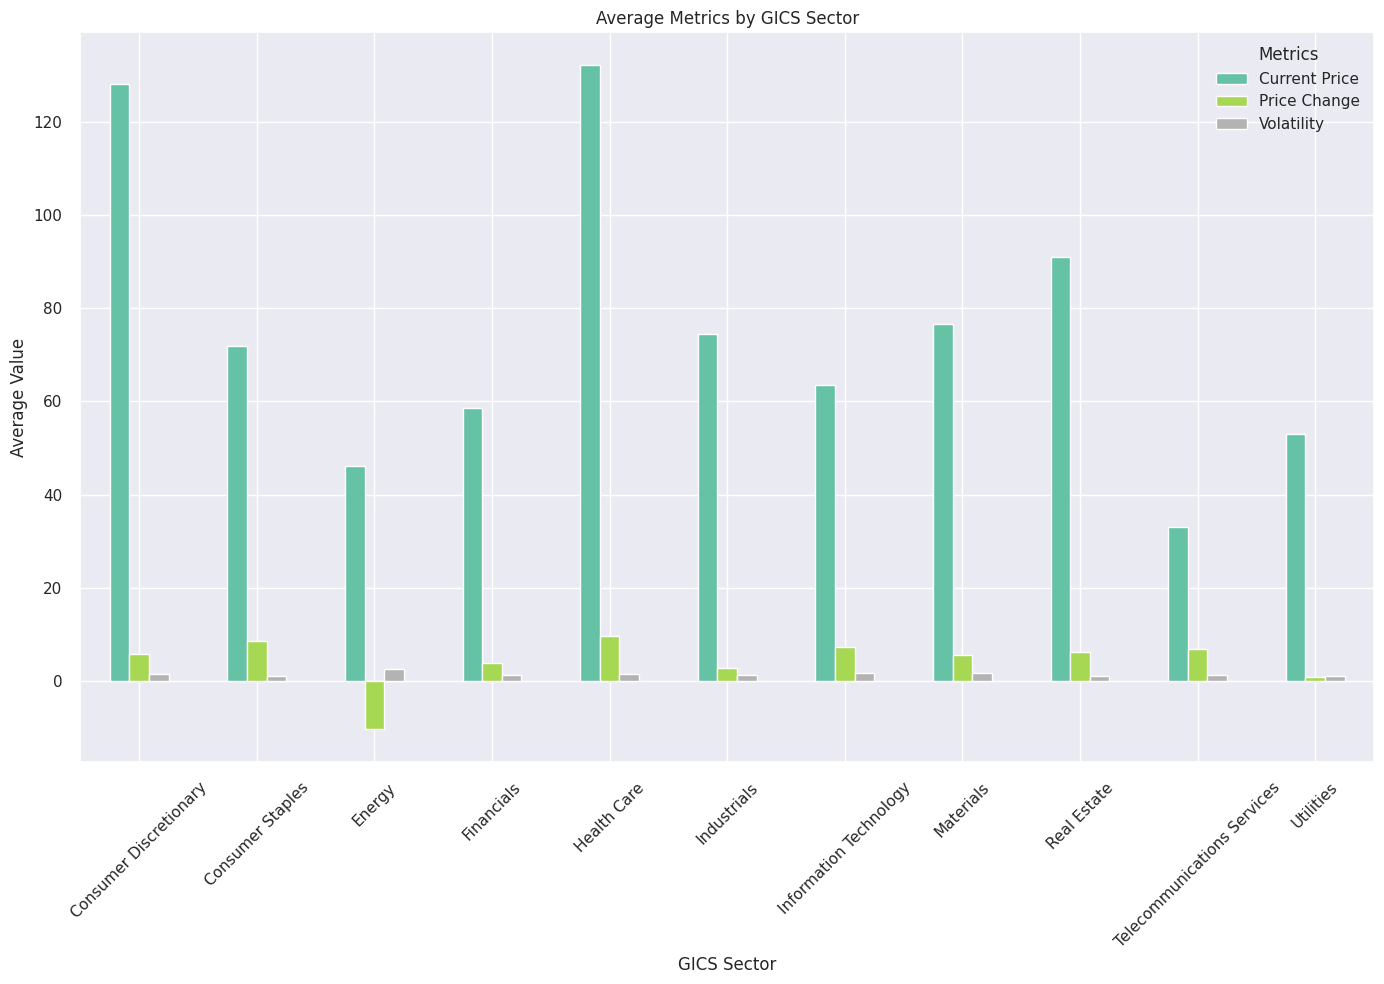

In [502]:
#Plot Bar chart on avg metrics (current price price change and Volatility)
plot_avg_metrics_by_category(trade_ahead_df,'GICS Sector',['Current Price','Price Change','Volatility'],'Average Metrics by GICS Sector','GICS Sector','Average Value')

### Observations:
- Helath care seems to have highest Price change followed by Consumer Staples
- Energy is a high-risk  with both significant price changes and elevated volatility.
- Health Care and Information Technology seem to offer a balance of high current prices and moderate price changes, indicating they might be good choices for stable investments with growth potential.
- Utilities and Telecommunications Services are stable, low-volatility sectors, likely appealing to conservative investors prioritizing consistency over large gains.
- Telecommunication  Services share current price is less followed by Energy

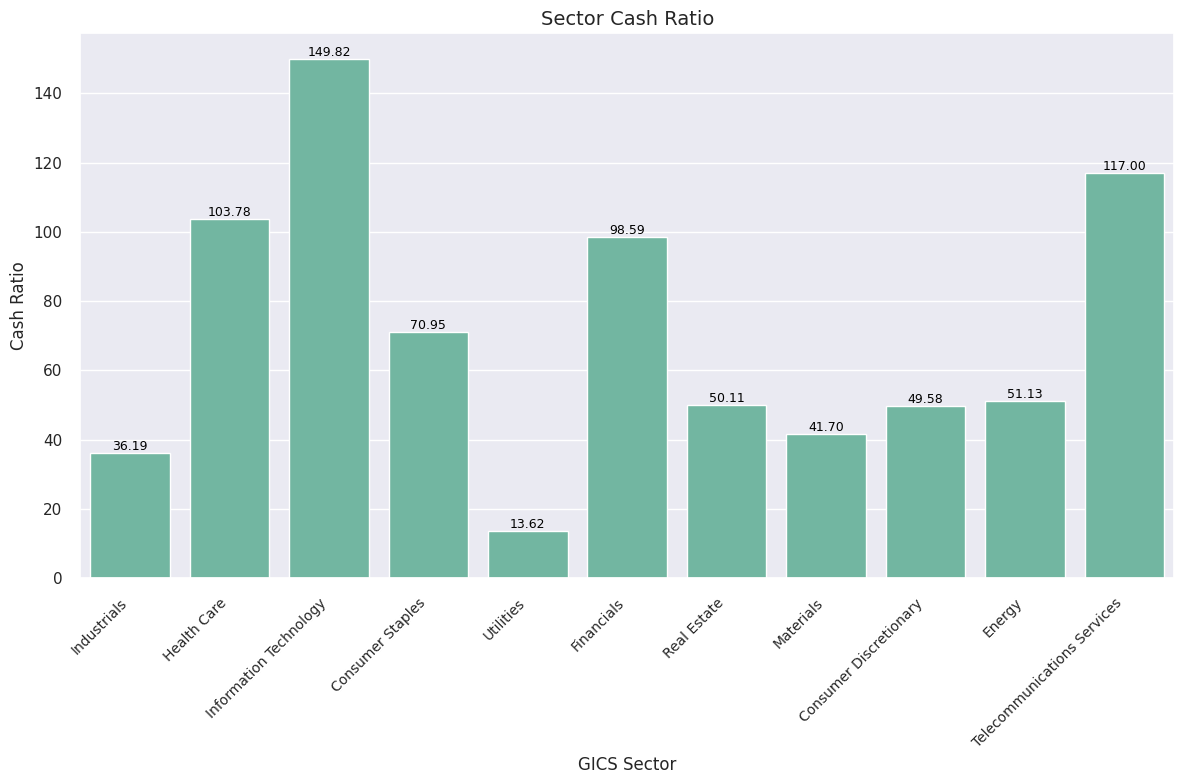

In [503]:
# Bar plot of cash ratio each sector has
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Cash Ratio',title='Sector Cash Ratio',color=colors[0],figsize=(12,8))

### Observations:
- Top three Sectors which has high reservations of cash
  1.   Information Technology 150
  2.   Telecommunication  Services  117
  3.   Helath Care 103
- Bottom 3 having least Reservations of cash
  1. Utilities: 13
  2. Industrials: 36
  3. Materials: 41.70


---
A positive cash ratio is a sign that the company has enough liquid assets to cover its short-term liabilities.




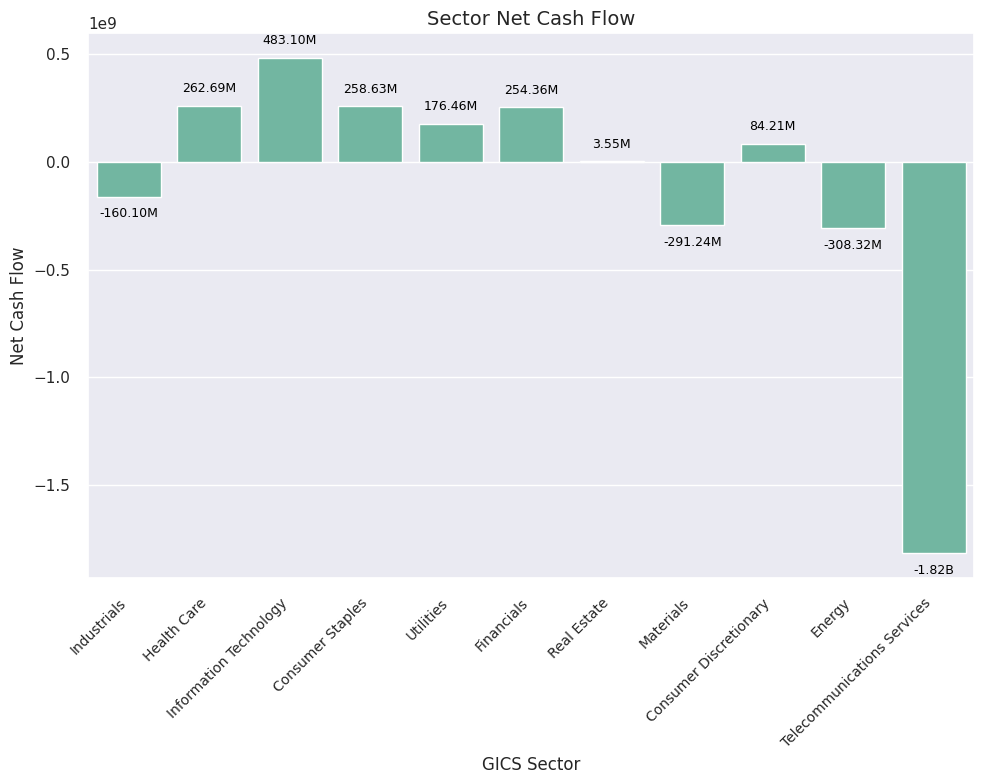

In [504]:
# Bar Plot on Net Cash Flow for each sector
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Net Cash Flow',title='Sector Net Cash Flow',color=colors[0],figsize=(10,8))

### Observations:
-  **Telecommunication Services** has highest nagative cash flow(1.82Billion) or highest spending.
- Other sectors like **Energy** , **Materials** and **Industrials** has moderate nagative cash flow as well.
- All the other sectors shows Positive cash flow


---
Nagative cash flow indicates either there is finacial issue or comonay is investing on growing its business .We can jump to conclusion by looking at net income of the same sector.


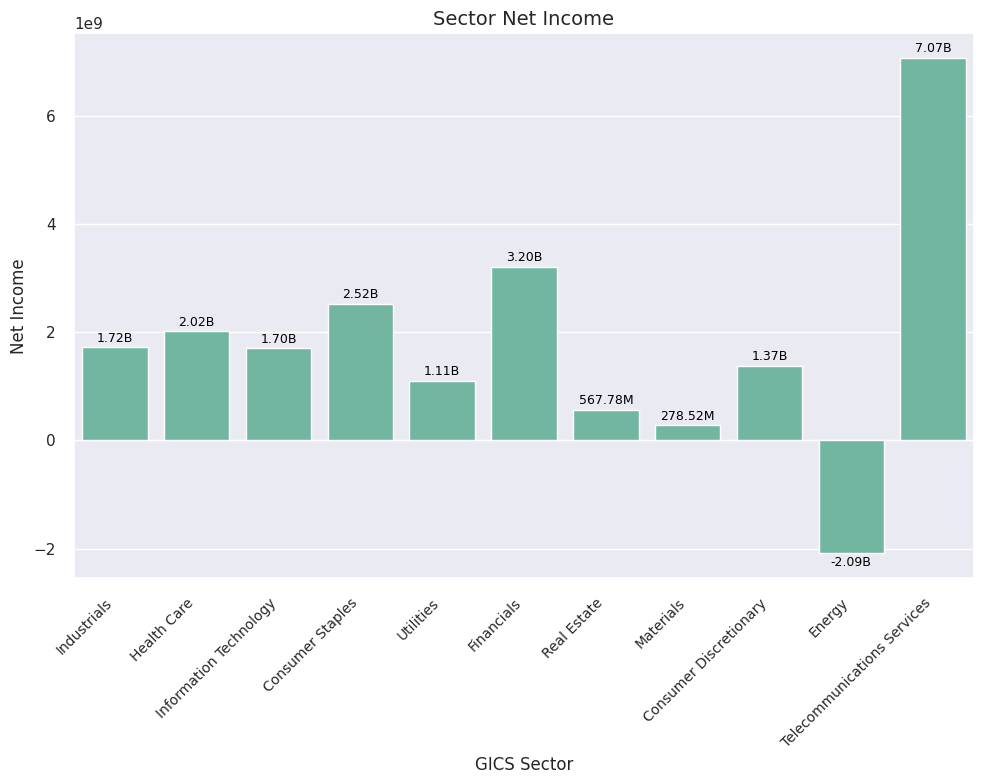

In [505]:
# Bar plot for Net income across each sector
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Net Income',title='Sector Net Income',color=colors[0],figsize=(10,8))

### Observations:
- Telecommunication Service has 7.07 Billion income followed by financials(3.20B) and Health care (2.02B)
- Energy sector has nagative income -2.09 Billion

### Overall Observations (Cash Ratio,Net Cash Flow and Net Income):
- Though **Telecommunication Services** has nagative cash flow but Net Income is high for this sector so sector is expanding by investing so cash flow is in nagative
- **Energy Sector** is seems to be under pressure as the Net Income  cash flow both seems to be nagative .Even the share price is going down.This is riskier sector to invest.It seems to be highly volatile sector
- Materials sector is not doing that well as well with not much net income and cash ratio is less and share was volatile though we did not see nagative change in share price for last 13 weeks.

In [506]:
# Sectors Mean earning share
trade_ahead_df.groupby('GICS Sector')['Earnings Per Share'].mean()

GICS Sector
Consumer Discretionary         4.53
Consumer Staples               3.22
Energy                        -6.91
Financials                     4.22
Health Care                    4.54
Industrials                    4.46
Information Technology         2.27
Materials                      3.13
Real Estate                    2.34
Telecommunications Services    3.55
Utilities                      2.75
Name: Earnings Per Share, dtype: float64

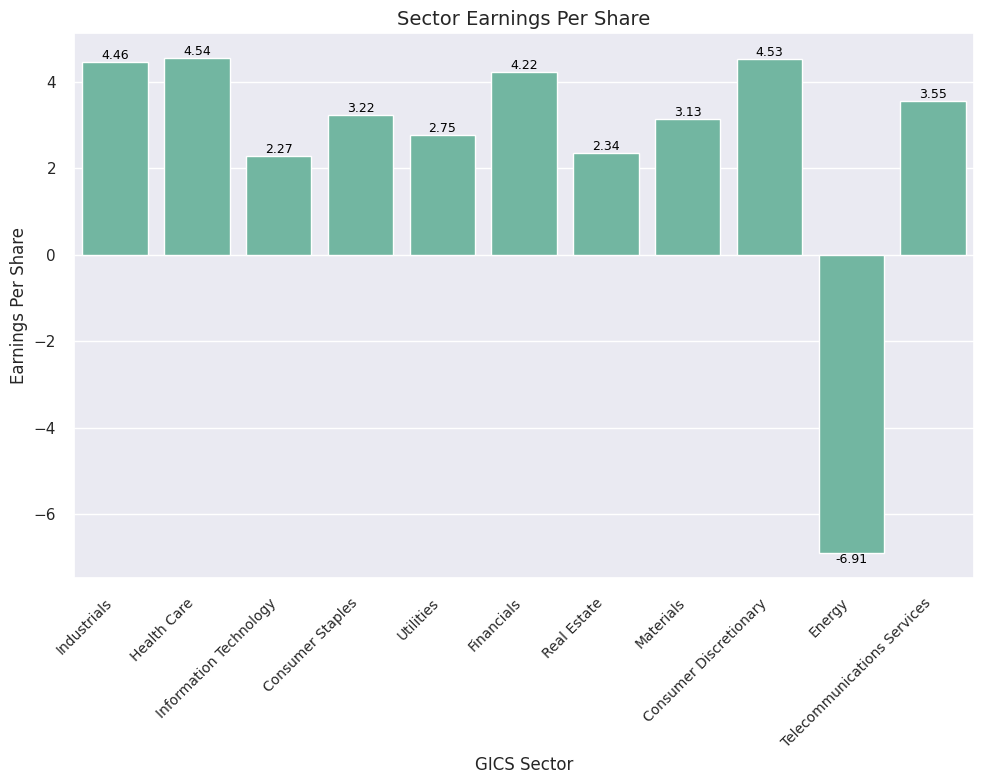

In [507]:
# Bar Plot Sectors Earning per share
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Earnings Per Share',title='Sector Earnings Per Share',color=colors[0],figsize=(10,8))

### Observations:
- **Energy** is having nagative earnings
- **Industrials** and **Helath care** sector has highest earnings per share

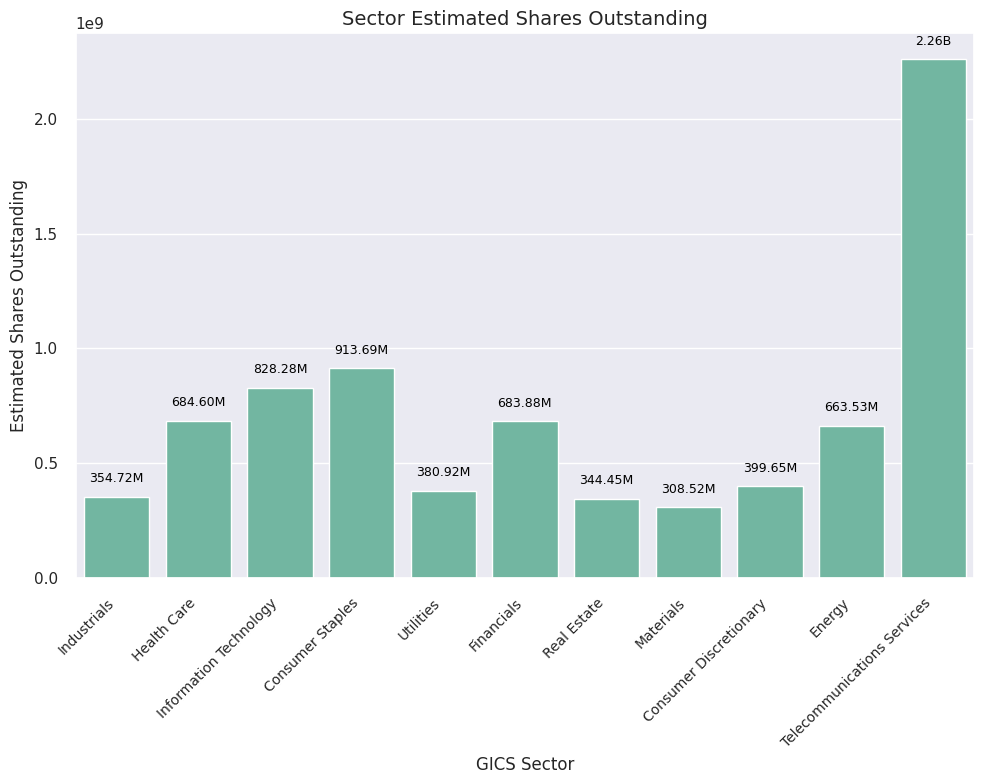

In [508]:
# Bar plot on estimated shares outstanding
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Estimated Shares Outstanding',title='Sector Estimated Shares Outstanding',color=colors[0],figsize=(10,8))

### Observations:
- We see Telecom  sector has highest no(2.26B) of shares outstanding but its growing market followed by Consumer Staples (913.69)
- Energy sector has lots of outstanding shares

Both telecom and energy shares price are less as well we had seen this before

---
The Estimated Shares Outstanding refers to the total number of shares a company has in circulation that are available for trading in the market. Whether a high number of shares outstanding is considered good or bad depends on the context and the company's situation.


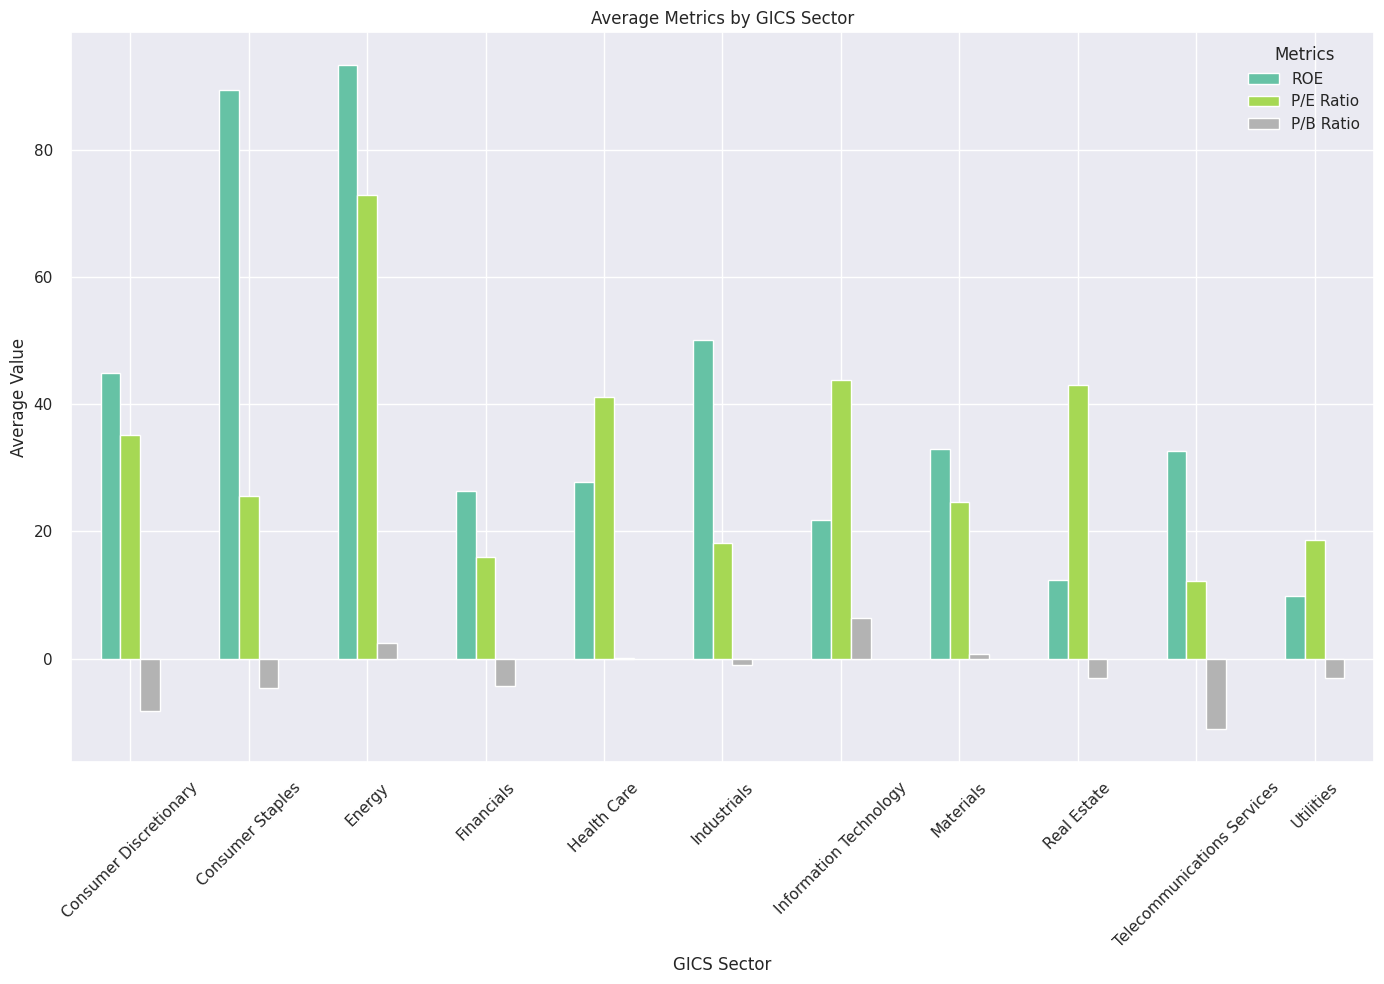

In [509]:
# Compare ROE P/E and P/B ration across sectors
plot_avg_metrics_by_category(trade_ahead_df,'GICS Sector',['ROE','P/E Ratio','P/B Ratio'],'Average Metrics by GICS Sector','GICS Sector','Average Value')

### Overview
The chart displays the **average values of three metrics (ROE, P/E Ratio, and P/B Ratio)** across various **GICS sectors**. Below are key observations and insights:
- The **Energy** sector has the highest average **Return on Equity (ROE)**, reflecting strong profitability for companies in this sector relative to their equity.However This has High **P/E Ratio** as well.
- **Information Technology** and **Consumer Staples** sectors have relatively higher **P/E Ratios**, indicating that these sectors are highly valued by investors, potentially due to expected future growth.
- The **Telecommunications Services** and **Utilities** sectors show **low or negative P/B Ratios**, which means  undervaluation .
- **Industrials** and **Materials** sectors demonstrate balanced performance across all three metrics, suggesting stable growth and valuation.

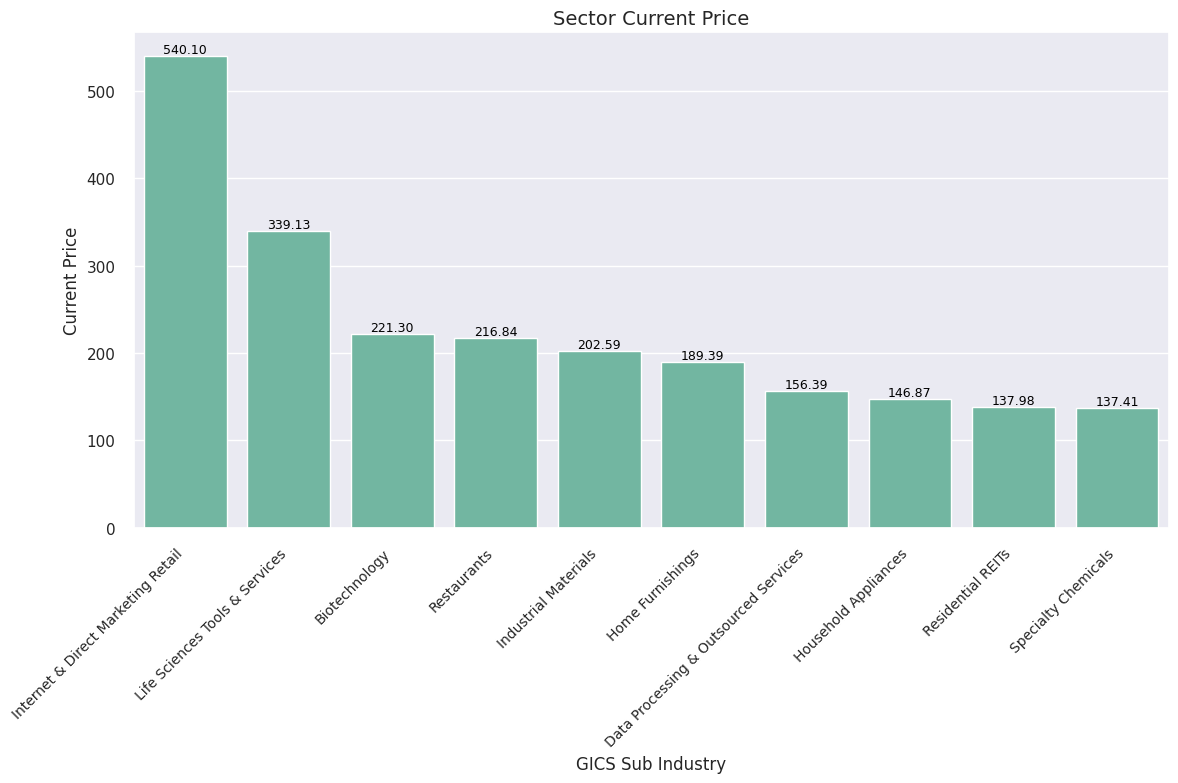

In [510]:
# Get Top Ten sub industry and plot
top_ten_df=trade_ahead_df.groupby('GICS Sub Industry')['Current Price'].mean().sort_values(ascending=False).head(10).reset_index()
plot_barplot_with_correct_annotations(data=top_ten_df, x='GICS Sub Industry', y='Current Price',title='Sector Current Price',color=colors[0],figsize=(12,8))

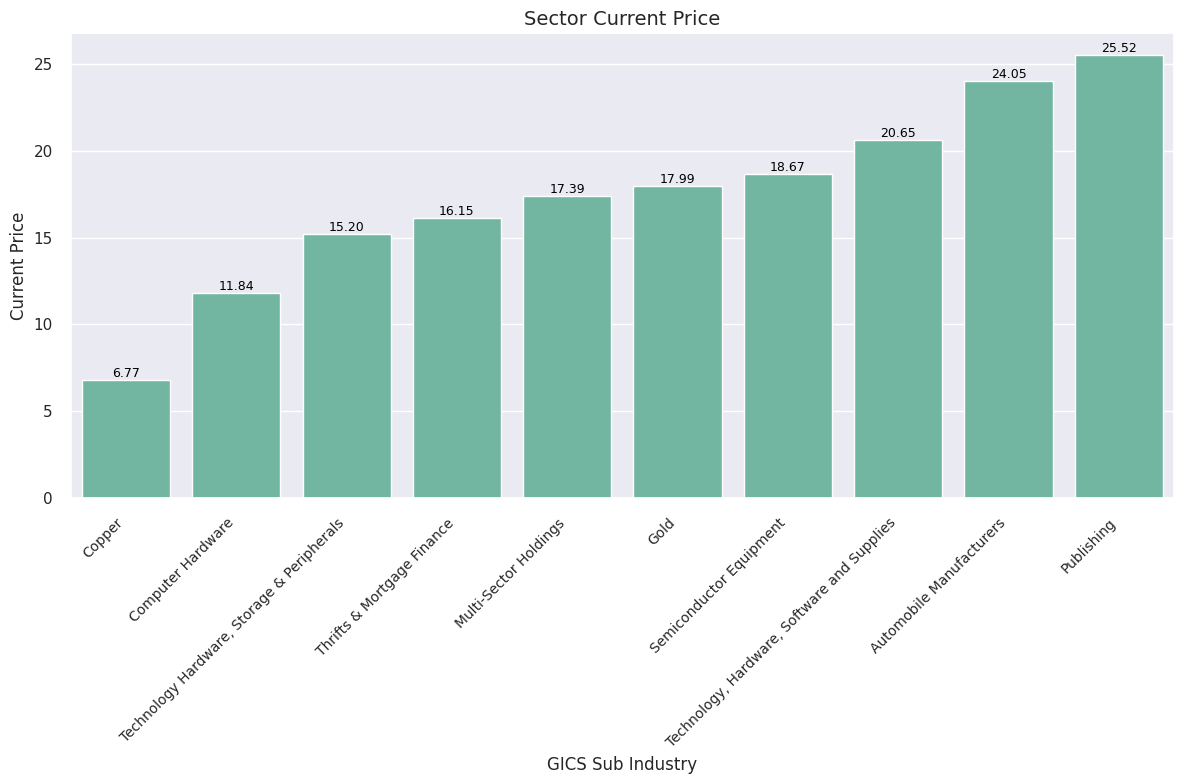

In [511]:
## get Bot 10 industry  and plot
bot_ten_df=trade_ahead_df.groupby('GICS Sub Industry')['Current Price'].mean().sort_values(ascending=True).head(10).reset_index()
plot_barplot_with_correct_annotations(data=bot_ten_df, x='GICS Sub Industry', y='Current Price',title='Sector Current Price',color=colors[0],figsize=(12,8))

### Observations:
- Internet and Direct Marketing Retail sector has highst share price followed by Life Scinece tools and setvices
- Copper industry has least current share price has highest share price currently

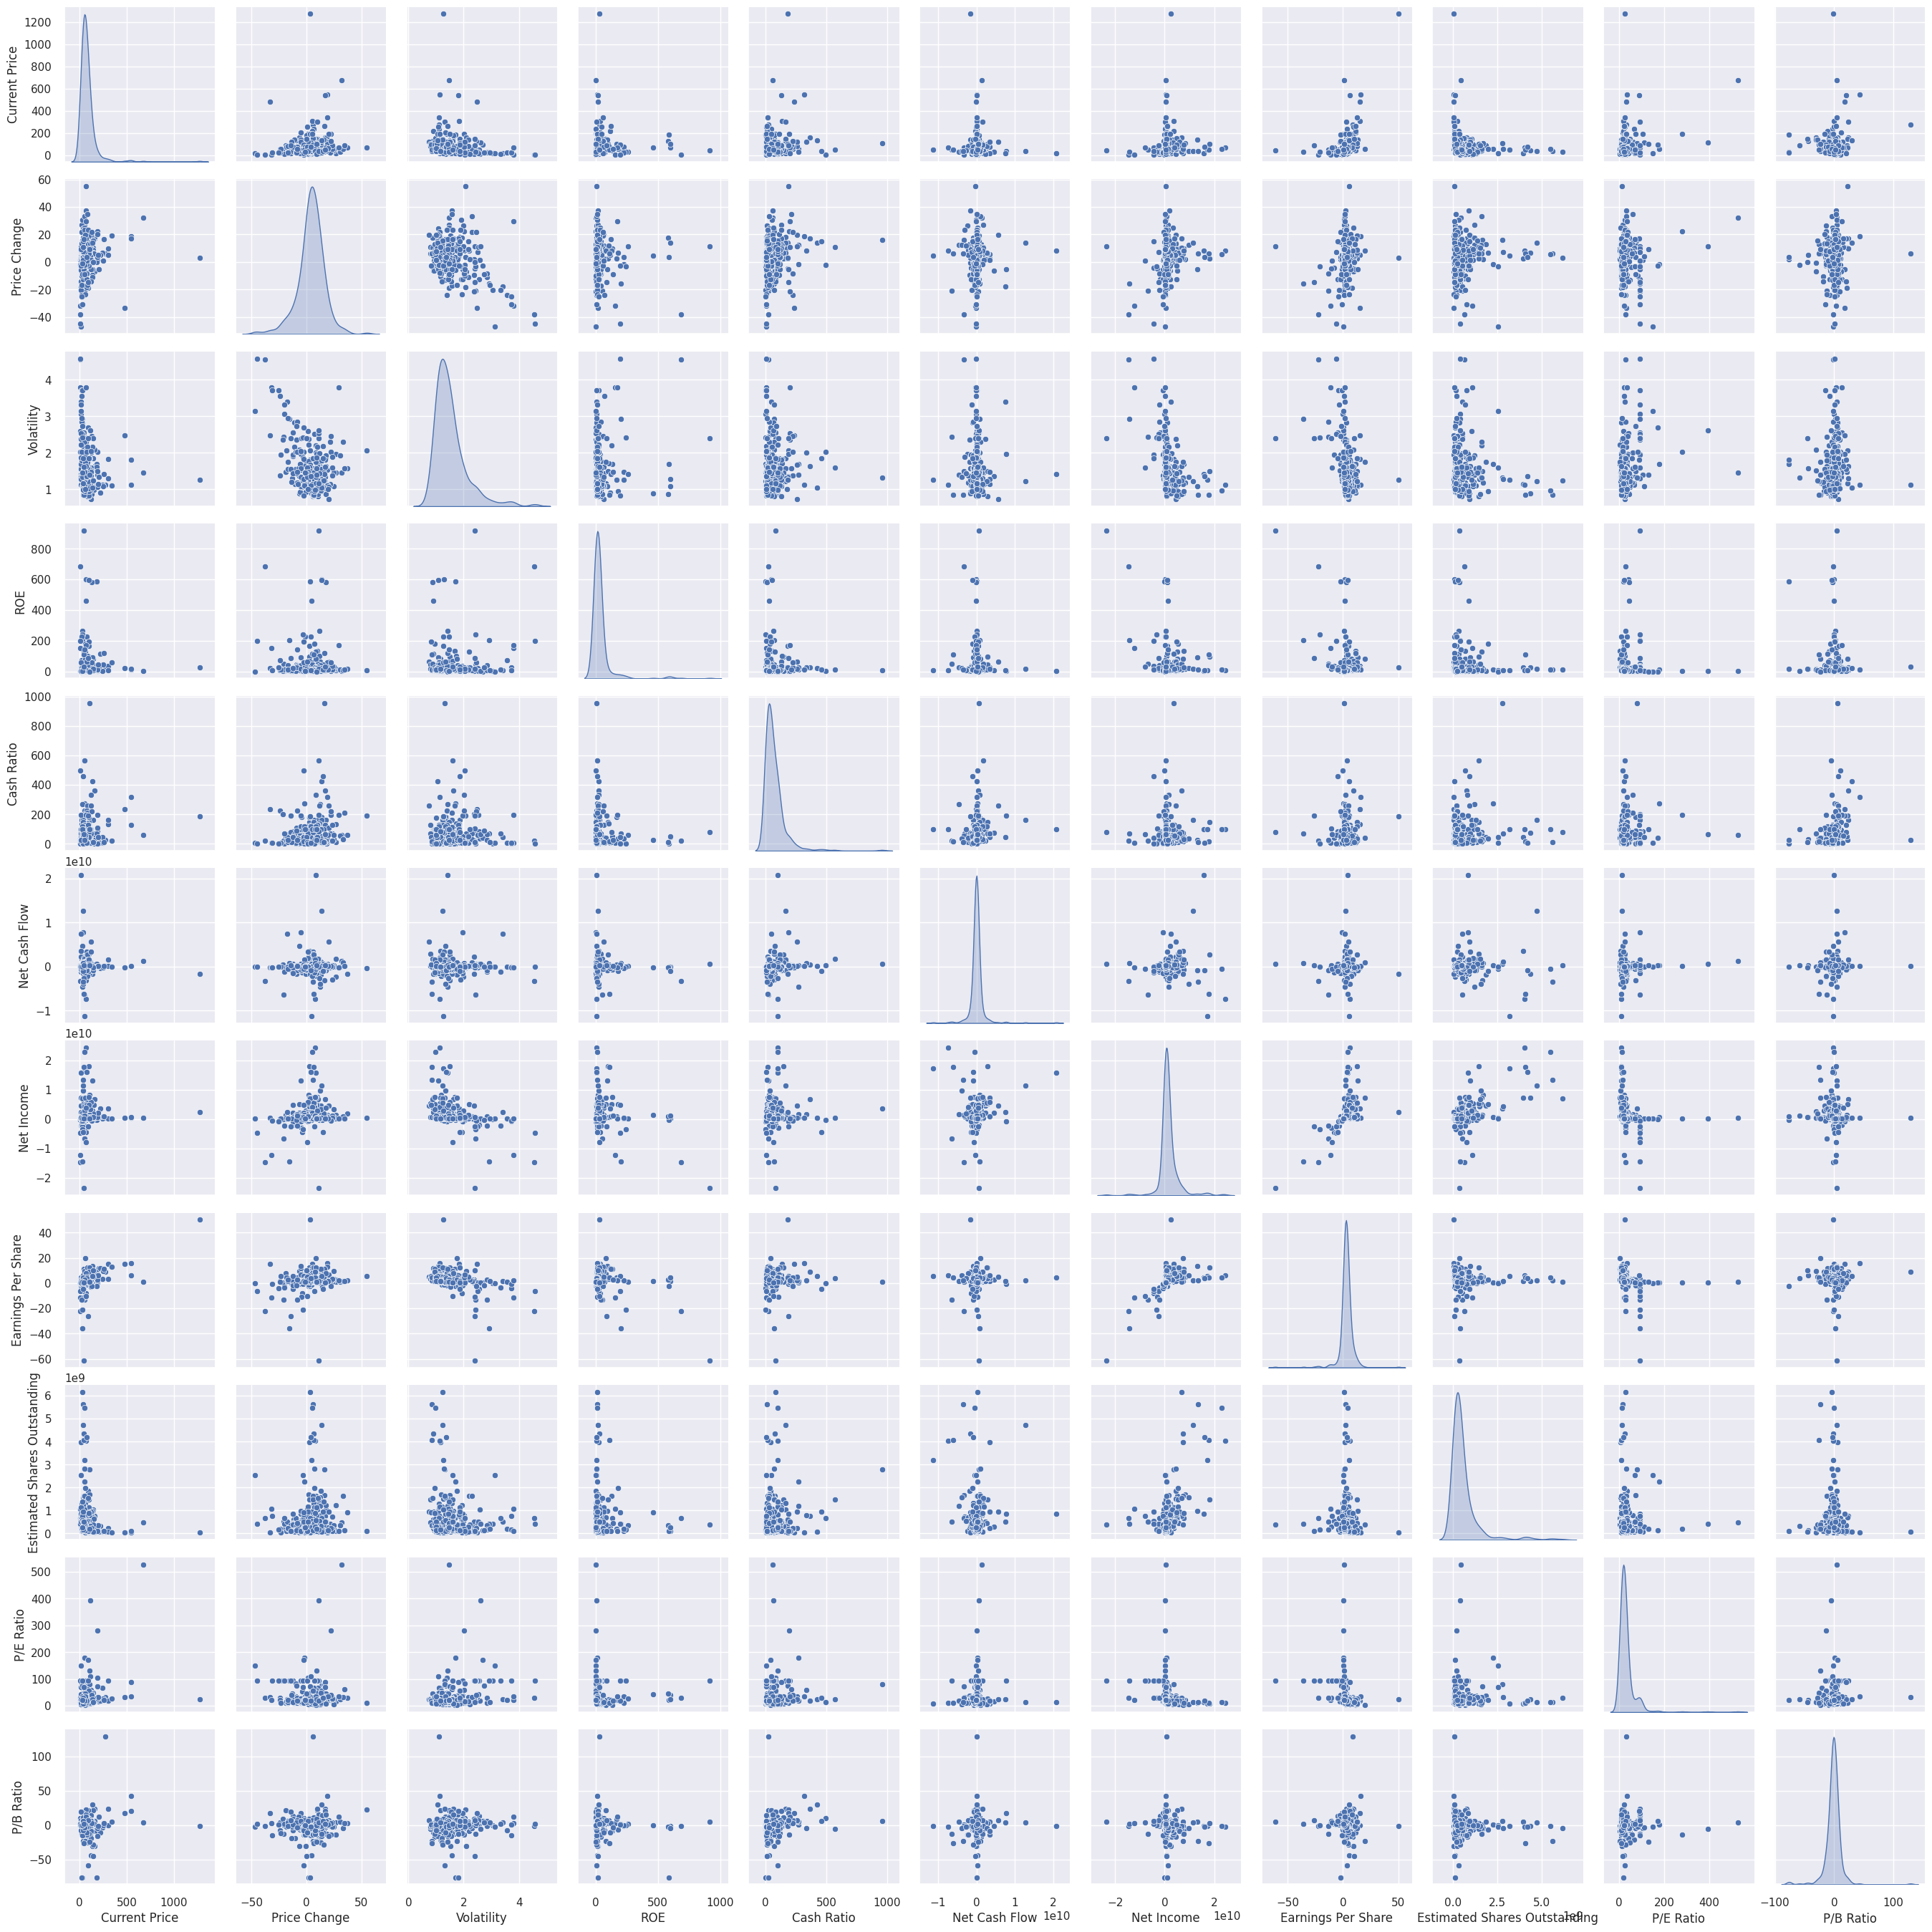

In [512]:
# Pair Plot across all the numerical values
sns.pairplot(trade_ahead_df[trade_ahead_df.select_dtypes(include=np.number).columns],diag_kind='kde',palette=pellete);

### Observations:
- The distribution of values for both P/B ratio and net cash flow is concentrated  around 0
- The distribution of earnings per share (EPS) is primarily concentrated in the range of 0 to 25 approx, while net income spans from 0 to 10 billion.  The net income varies widely but is generally capped at a figure, possibly reflecting the presence of both smaller and larger enterprises in the dataset.
- The price change varies between -20 and 20 in relation to the P/E ratio.This means the fluctuations in stock prices relative to their earnings.

From the pair plot it seems like best no of cluster is  2-5 depending on peak.

### 1.What does the distribution of stock prices look like?

Mean of current Price is 80.86234477216765 and Median of current price is 59.705 


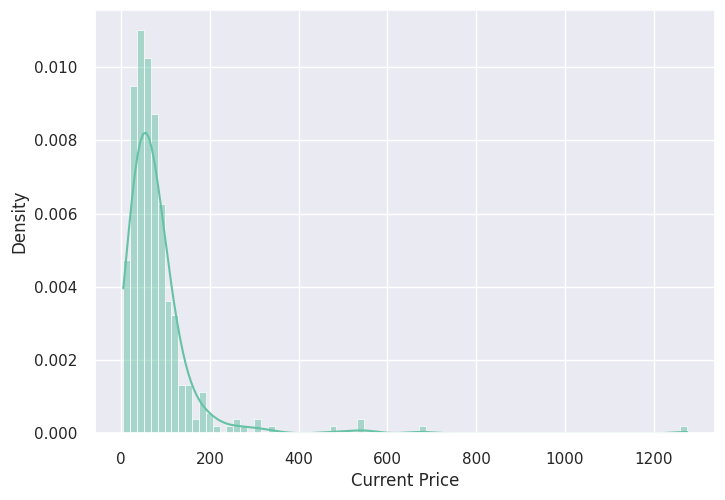

In [513]:
# Calculate mean and median of current price
print(f"Mean of current Price is {trade_ahead_df['Current Price'].mean()} and Median of current price is {trade_ahead_df['Current Price'].median()} ")
# Draw histogram
sns.histplot(trade_ahead_df['Current Price'],color=colors[0],kde=True,stat="density");

### Observations:
- The distribution is right skewed due to long tail .Mean (80) > Median(59) due to higher value at right mean is pull towards right
- We have seen this in univarite analysis already with box plot and KDE plot so using histogram here.


### 2.The stocks of which economic sector have seen the maximum price increase on average?

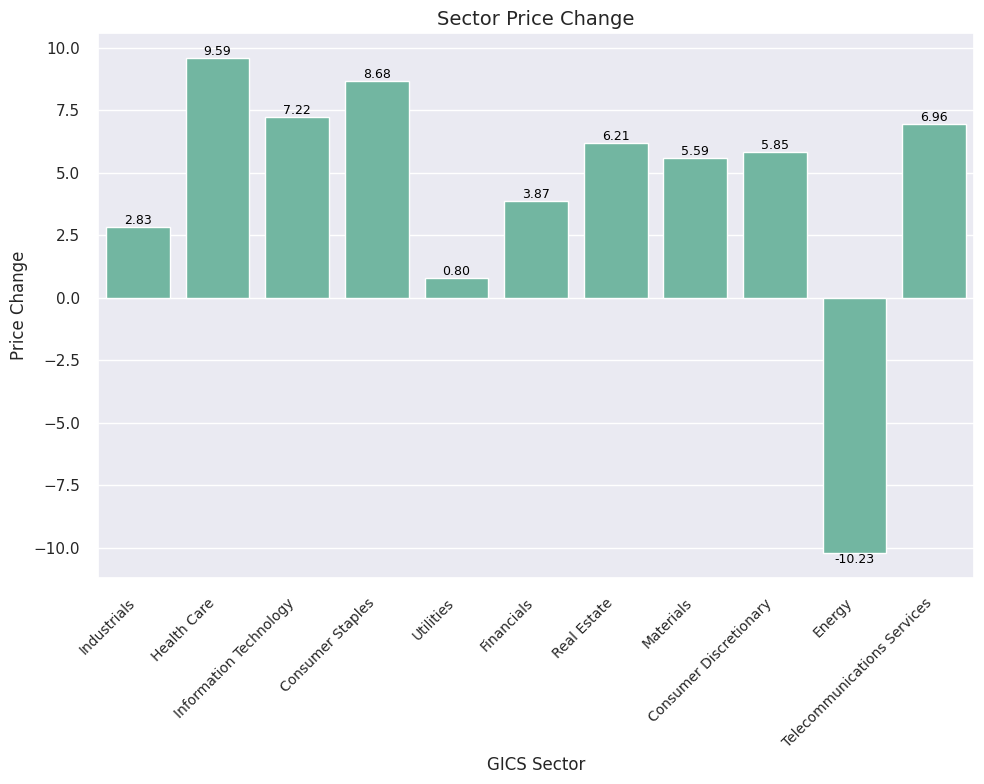

In [514]:
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Price Change',title='Sector Price Change',color=colors[0],figsize=(10,8))

### Observations:
- Health care has highest price change(9.59) followed by consumer staples 8.68
- This was done in univraite analysis as well

### 3.How are the different variables correlated with each other?

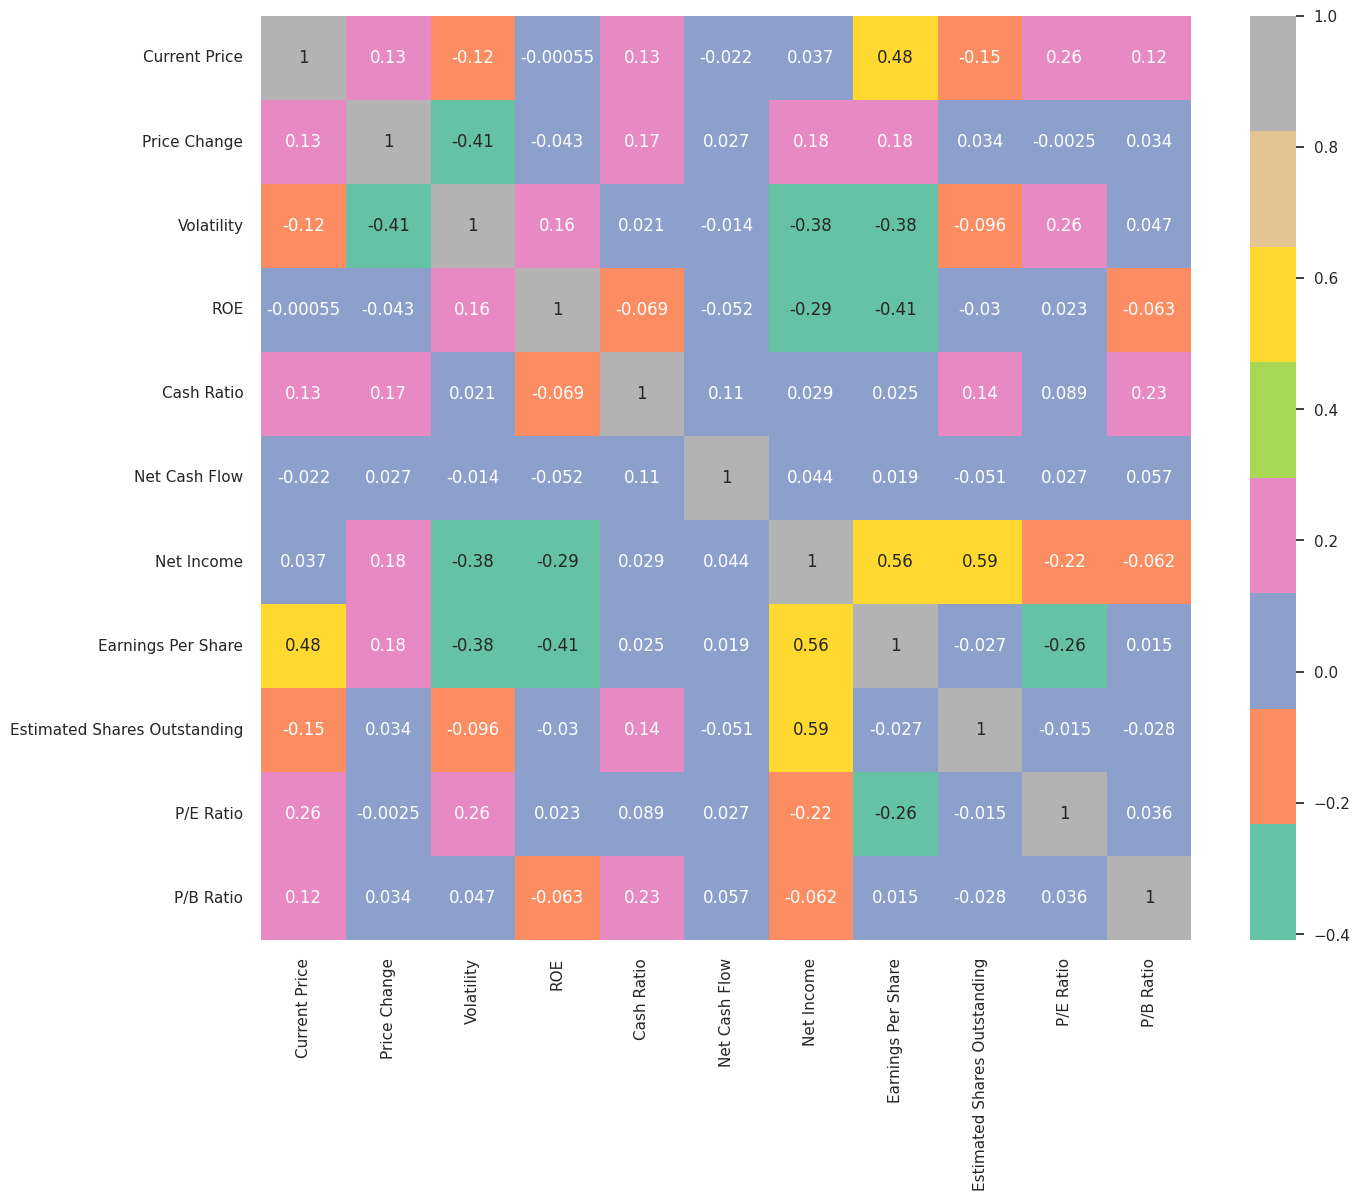

In [515]:
# Heat map to visualize the corelation
plt.figure(figsize=(15, 12))  #  the size
sns.heatmap(trade_ahead_df.select_dtypes(include="number").corr(),annot=True,cmap=pellete);


### Observations:
- Earnings Per Share (EPS) and Net Income have a strong positive correlation (~0.56). This indicates that higher earnings per share are often associated with higher net income.
- Net Income and Estimated Shares Outstanding also have a positive correlation (~0.59). Companies with higher net income might have more shares outstanding due to factors like equity-based financing or stock options.

- Volatility has a strong negative correlation with Earnings Per Share (-0.38) and Net Income (-0.38). This suggests that more volatile stocks tend to have lower earnings per share and lower net income.
- Estimated Shares Outstanding and Earnings Per Share show a weak negative correlation (~-0.27). This could reflect the dilution effect of additional shares on earnings per share.

- Metrics like Net Cash Flow have weak correlations with most variables, suggesting limited direct relationships in the dataset.
- P/E Ratio has weak correlations with most other features except Current Price (moderate positive correlation of ~0.26).
- Current Price Positively correlated with Earnings Per Share (0.48) and P/E Ratio (0.26). This indicates that higher current prices are associated with better earnings per share and higher price-to-earnings ratios.
Volatility:

- Volatility Negatively correlated with Price Change (-0.41) and Earnings Per Share (-0.38). Stocks with higher volatility may see less stable price changes and earnings.

**Potential Interpretations:**

- Investor Sentiment: The positive correlation between the P/E Ratio and Current Price might indicate that investors favor companies with higher perceived growth potential.
- Risk-Return Tradeoff: The negative relationship between Volatility and EPS highlights a common theme—higher risk (volatility) often corresponds to lower earnings stability.
- Financial Stability: Strong positive correlations involving EPS and Net Income suggest that companies with robust earnings are more likely to be financially stable.

### 4 How does the average cash ratio vary across economic sectors?

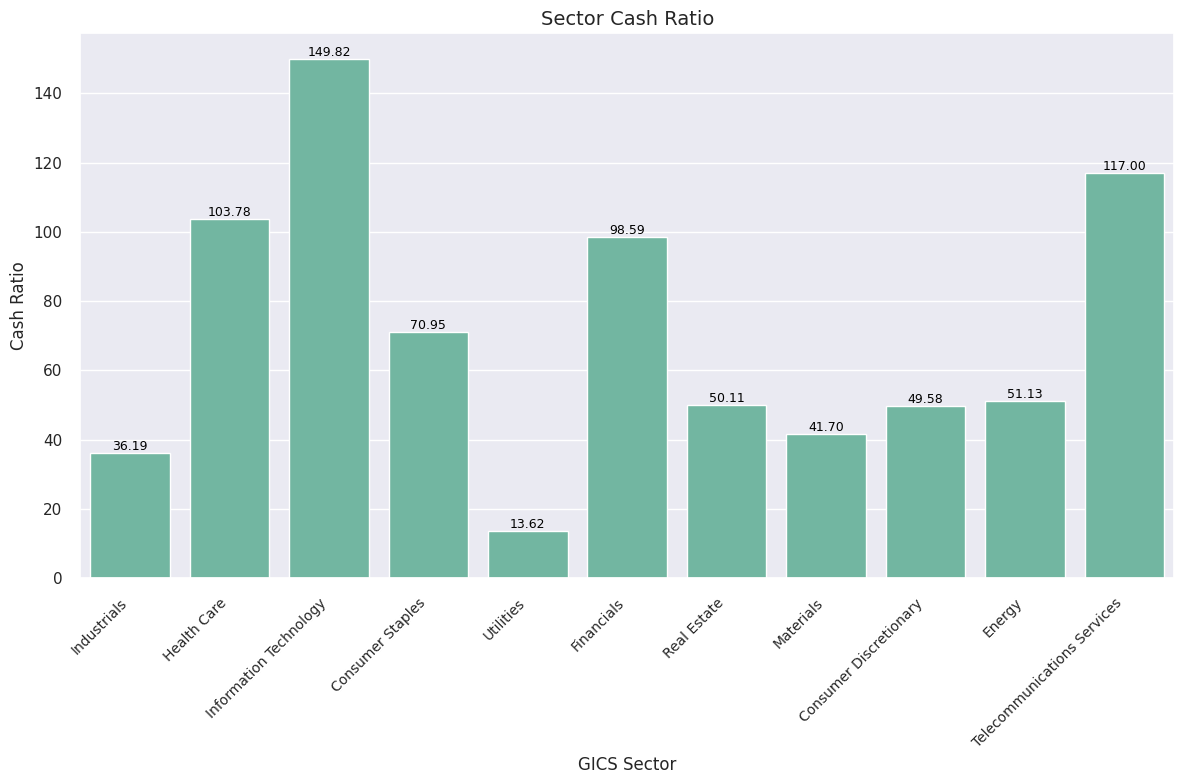

In [516]:
# Bar plot of cash ratio each sector has
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='Cash Ratio',title='Sector Cash Ratio',color=colors[0],figsize=(12,8))

In [517]:
# Group by  sector and calculate the mean cash ratio
avg_cashration_sector = trade_ahead_df.groupby('GICS Sector')['Cash Ratio'].mean().sort_values(ascending=False)
# Print  result
print(avg_cashration_sector)

GICS Sector
Information Technology        149.82
Telecommunications Services   117.00
Health Care                   103.78
Financials                     98.59
Consumer Staples               70.95
Energy                         51.13
Real Estate                    50.11
Consumer Discretionary         49.58
Materials                      41.70
Industrials                    36.19
Utilities                      13.62
Name: Cash Ratio, dtype: float64


### Observations:
- Top three Sectors which has high reservations of cash
  1.   Information Technology 150
  2.   Telecommunication  Services  117
  3.   Helath Care 103
- Bottom 3 having least Reservations of cash
  1. Utilities: 13
  2. Industrials: 36
  3. Materials: 41.70


---
A positive cash ratio is a sign that the company has enough liquid assets to cover its short-term liabilities.




### 5.How does the P/E ratio vary, on average, across economic sectors?

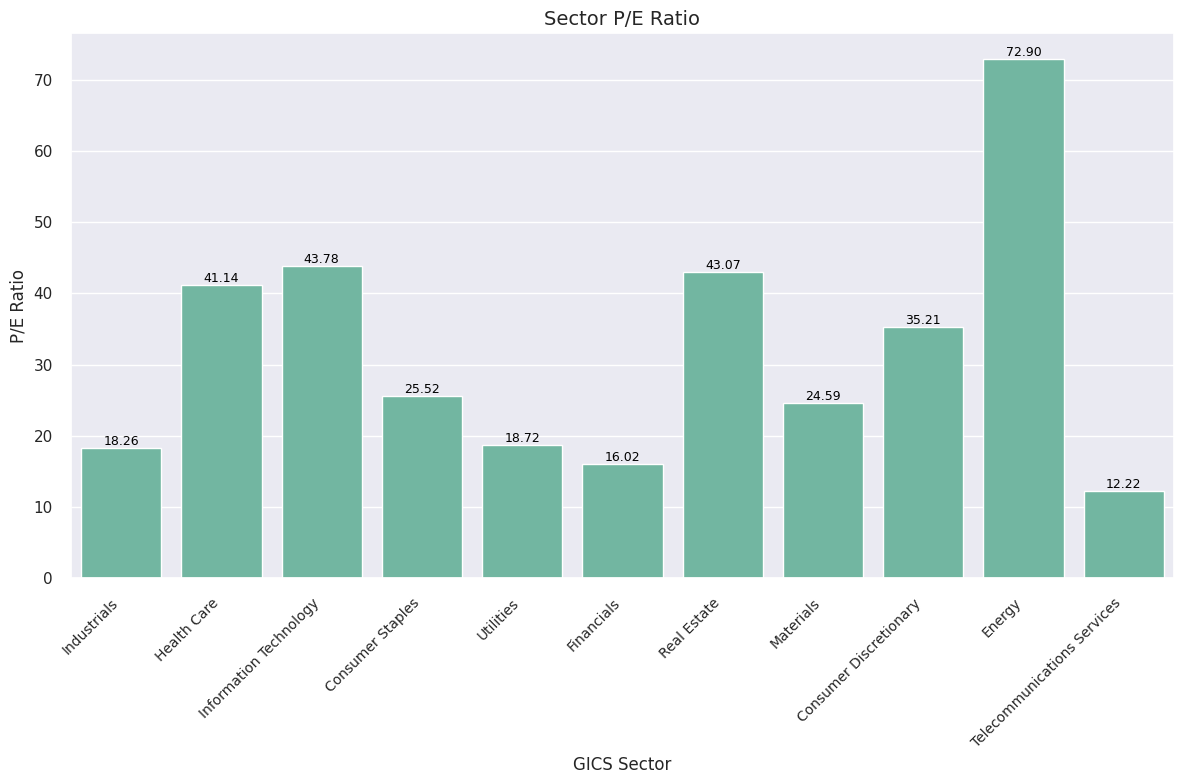

In [518]:
# Bar plot of P/E each sector has
plot_barplot_with_correct_annotations(data=trade_ahead_df, x='GICS Sector', y='P/E Ratio',title='Sector P/E Ratio',color=colors[0],figsize=(12,8))

### Observations:

- **Energy**:  
  The **Energy** sector has the **highest average P/E ratio**(72.90), showing that investors are willing to pay a premium for each share relative to its earnings.  

- **Telecommunications Services**:  
  This sector has the **lowest average P/E ratio** (12.22), indicating a more conservative valuation approach by investors.  

- **Financials**:  
  The **Financials** sector also shows a relatively low average **P/E ratio** (16.02), reflecting cautious investor sentiment in this space.  

- **Information Technology**:  
  The **Information Technology** sector has a **moderate average P/E ratio**(43.78), suggesting a balance between growth expectations and valuation considerations.  

- **Consumer Discretionary and Health Care**:  
  These sectors have **average P/E ratios exceeding 35**, highlighting that investors are willing to pay a higher price for shares due to strong growth prospects.  

- **Utilities**:  
  The **Utilities** sector reflects a **moderate average P/E ratio**(18.72), indicating a balance between valuation and growth potential.  

### Data Preparation For Modeling
### Outlier Detection and Treatment

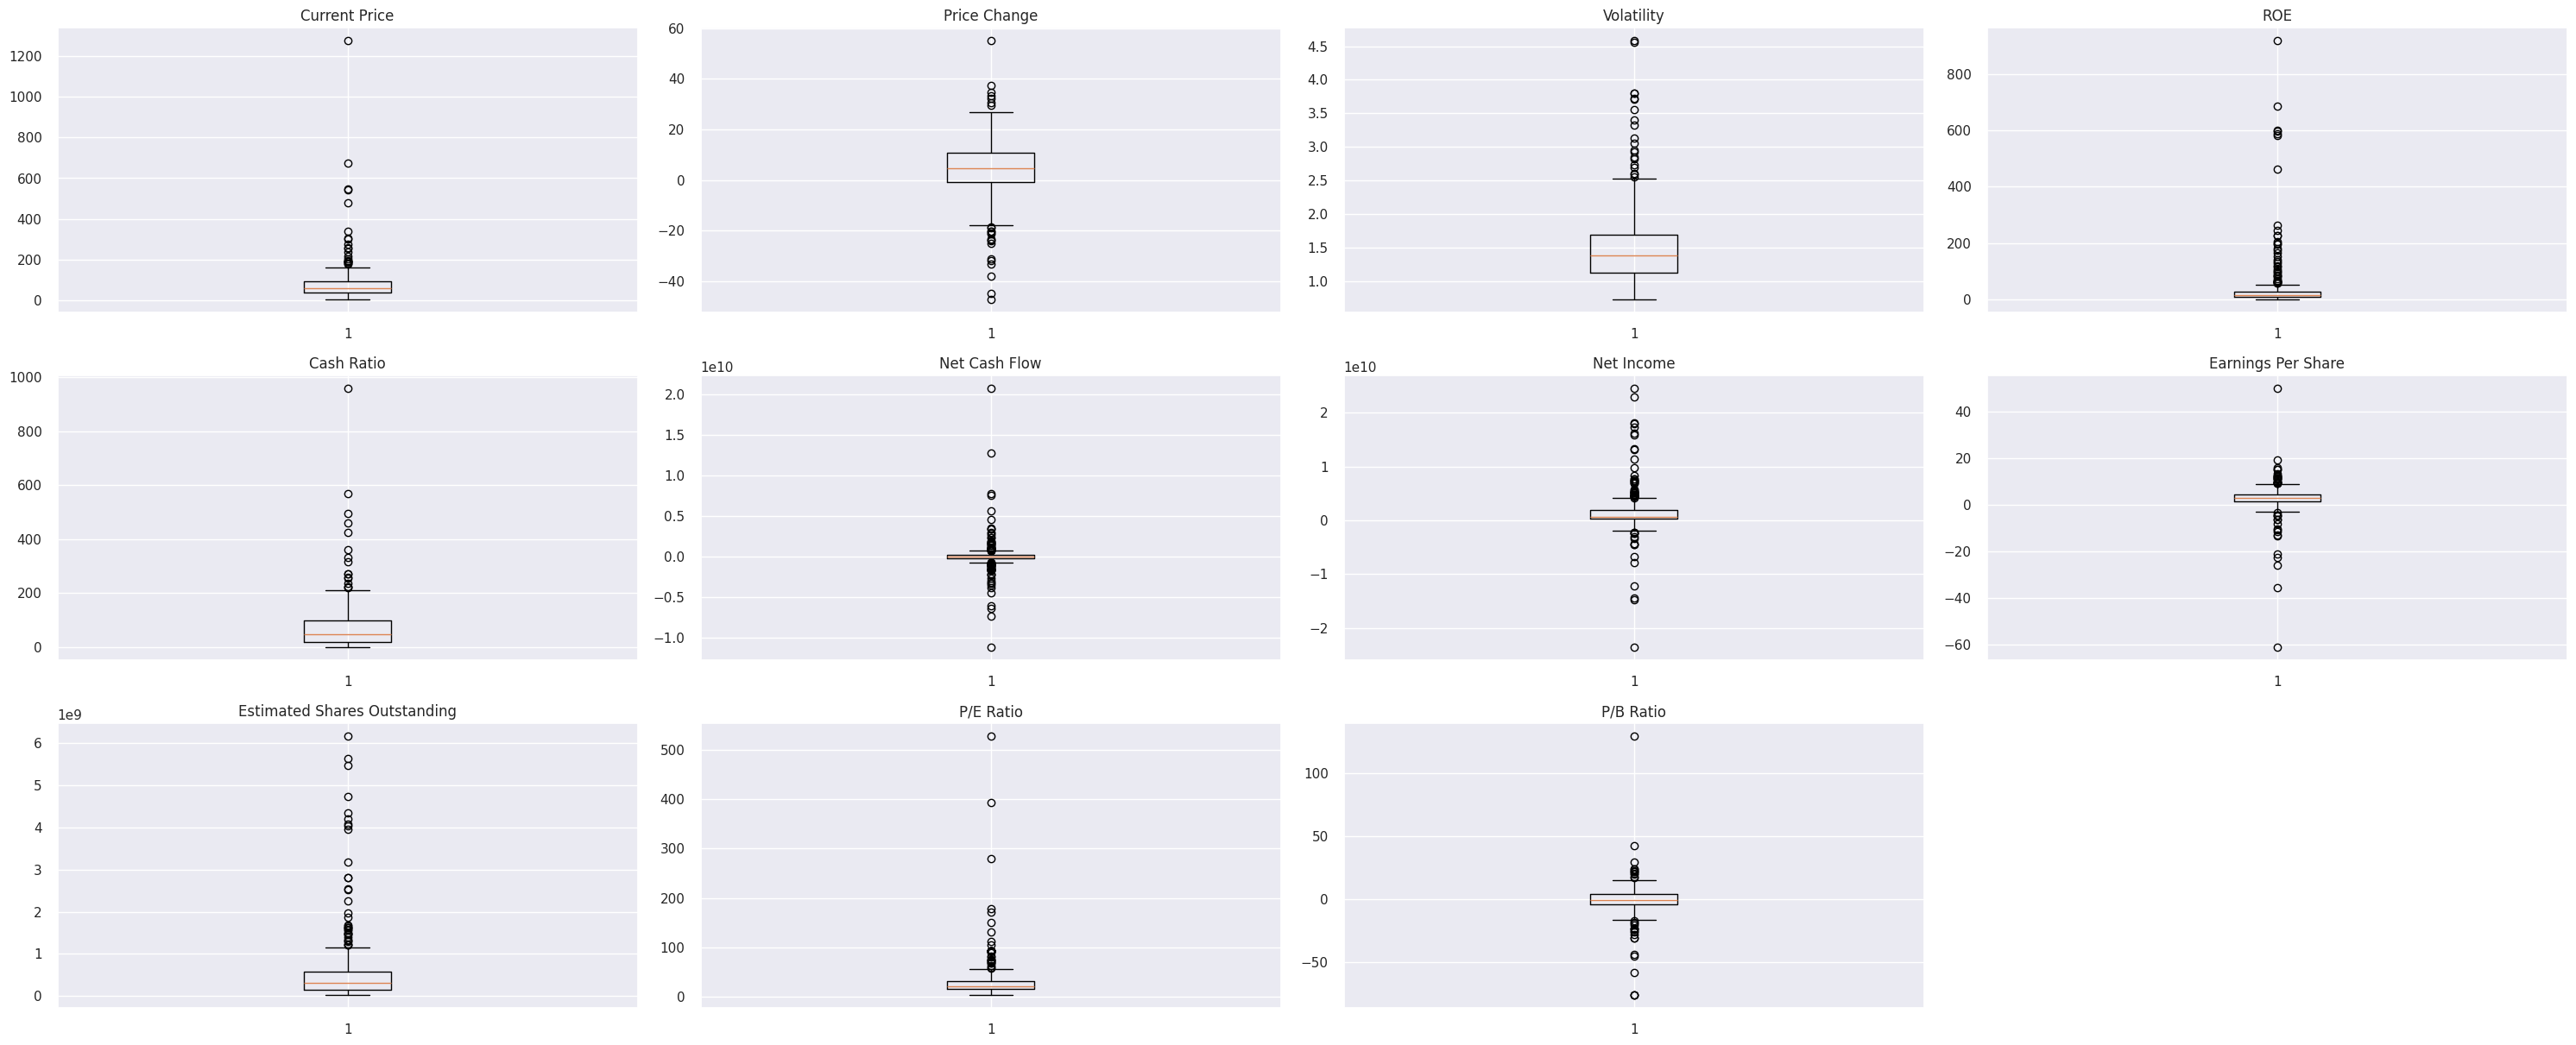

In [519]:
numerical_col = trade_ahead_df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30, 20))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(trade_ahead_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation
- We have outliers in each numericalcolumn, but these values shows market dip or trend for sectors and clipping them might not give us correct result.So we will keep them .


### Scaling


In [520]:
# Apply standard scalar
scaler = StandardScaler()
scaled_trade_data = scaler.fit_transform(trade_ahead_df.select_dtypes(include=np.number))
## Create Dataframe out of scaled values and show
scaled_trade_data_df = pd.DataFrame(scaled_trade_data, columns=trade_ahead_df.select_dtypes(include=np.number).columns)
scaled_trade_data_df.head()

Current Price  Price Change  Volatility   ROE  Cash Ratio  Net Cash Flow  \
0          -0.39          0.49        0.27  0.99       -0.21          -0.34   
1          -0.22          0.36        1.14  0.94        0.08          -0.00   
2          -0.37          0.60       -0.43 -0.19       -0.03           0.45   
3           0.13          0.83       -0.28 -0.32        1.22          -0.15   
4          -0.26         -0.49        0.30 -0.27        2.24           0.13   

   Net Income  Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  \
0        1.55                1.31                          0.11      -0.65   
1        0.93                0.06                          1.25      -0.31   
2        0.74                0.02                          1.10      -0.39   
3       -0.22               -0.23                         -0.09       0.95   
4       -0.20               -0.37                          1.98       3.29   

   P/B Ratio  
0      -0.51  
1      -0.50  
2       0.09  
3       0.42  
4       0.20

### Kmeans Clustering

In [521]:
# copy for use in kmeans
kmeans_scaledDf=scaled_trade_data_df.copy(deep=True)

Number of Clusters: 2 	WCSS: 3255.019911353368 	Silhouette Score: 0.45335782729503565
Number of Clusters: 3 	WCSS: 3036.2722942382948 	Silhouette Score: 0.40374060030338865
Number of Clusters: 4 	WCSS: 2685.7742066146407 	Silhouette Score: 0.4246430808437099
Number of Clusters: 5 	WCSS: 2426.0152657475123 	Silhouette Score: 0.4381539778147092
Number of Clusters: 6 	WCSS: 2221.116832723935 	Silhouette Score: 0.40869599703024256
Number of Clusters: 7 	WCSS: 2103.713526426531 	Silhouette Score: 0.1207450219233897
Number of Clusters: 8 	WCSS: 1912.0301023385432 	Silhouette Score: 0.3693991650696542
Number of Clusters: 9 	WCSS: 1851.4372557185366 	Silhouette Score: 0.35185096182499204
Number of Clusters: 10 	WCSS: 1797.9547900179632 	Silhouette Score: 0.32950073703610283
Number of Clusters: 11 	WCSS: 1678.842646305452 	Silhouette Score: 0.1486586842527321
Number of Clusters: 12 	WCSS: 1564.7181451708975 	Silhouette Score: 0.15784241071085106
Number of Clusters: 13 	WCSS: 1517.1067817629637 

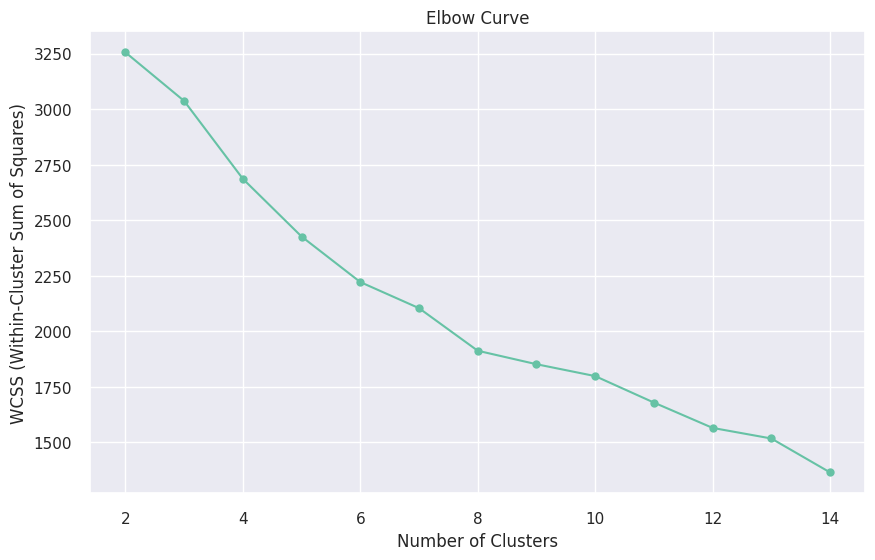

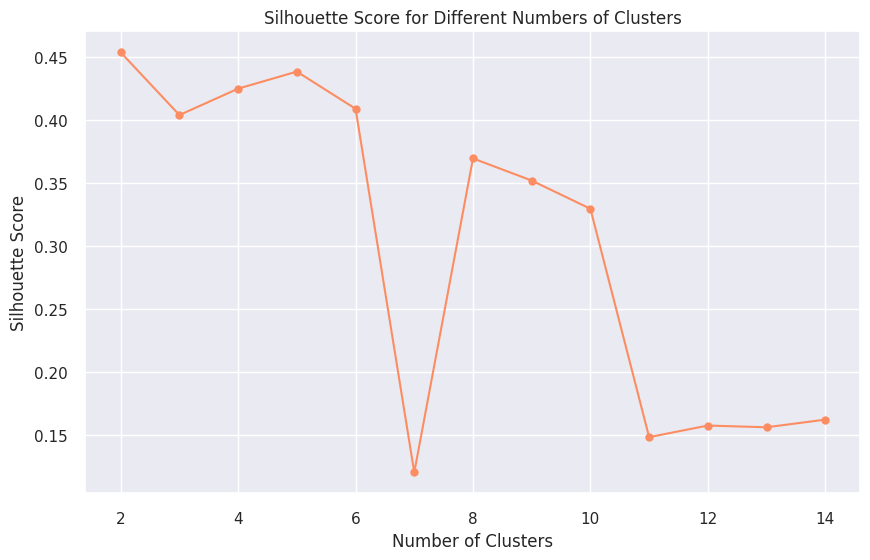

In [522]:
clusters = range(2, 15)  # Number of clusters range
wcss = []  # List to store inertia for elbow curve
sil_score = []  # List to store silhouette score

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1, init='k-means++')
    model.fit(kmeans_scaledDf)  # Fit the model to the data
    prediction = model.predict(kmeans_scaledDf)  # Predict cluster assignments

    wcss.append(model.inertia_)  # Append inertia to the list (WCSS)

    score = silhouette_score(kmeans_scaledDf, prediction)  # Calculate silhouette score
    sil_score.append(score)  # Append silhouette score
    print(f"Number of Clusters: {k} \tWCSS: {model.inertia_} \tSilhouette Score: {score}")

# Plot the elbow curve (WCSS)
plt.figure(figsize=(10, 6))
plt.plot(clusters, wcss, marker='o',color=colors[0])
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Curve")
plt.show()

# Optionally, plot the silhouette scores to check how well clusters are formed
plt.figure(figsize=(10, 6))
plt.plot(clusters, sil_score, marker='o', color=colors[1])
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

### Observations:
It seems no of clusters could be 2,4,5,6 and 8 as we have Silhoute score and elbow plot suggesting that

Using Knee Locator to find elbow

In [523]:
k=KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
print(f"Printing elbow value {k.elbow}")

Printing elbow value 8


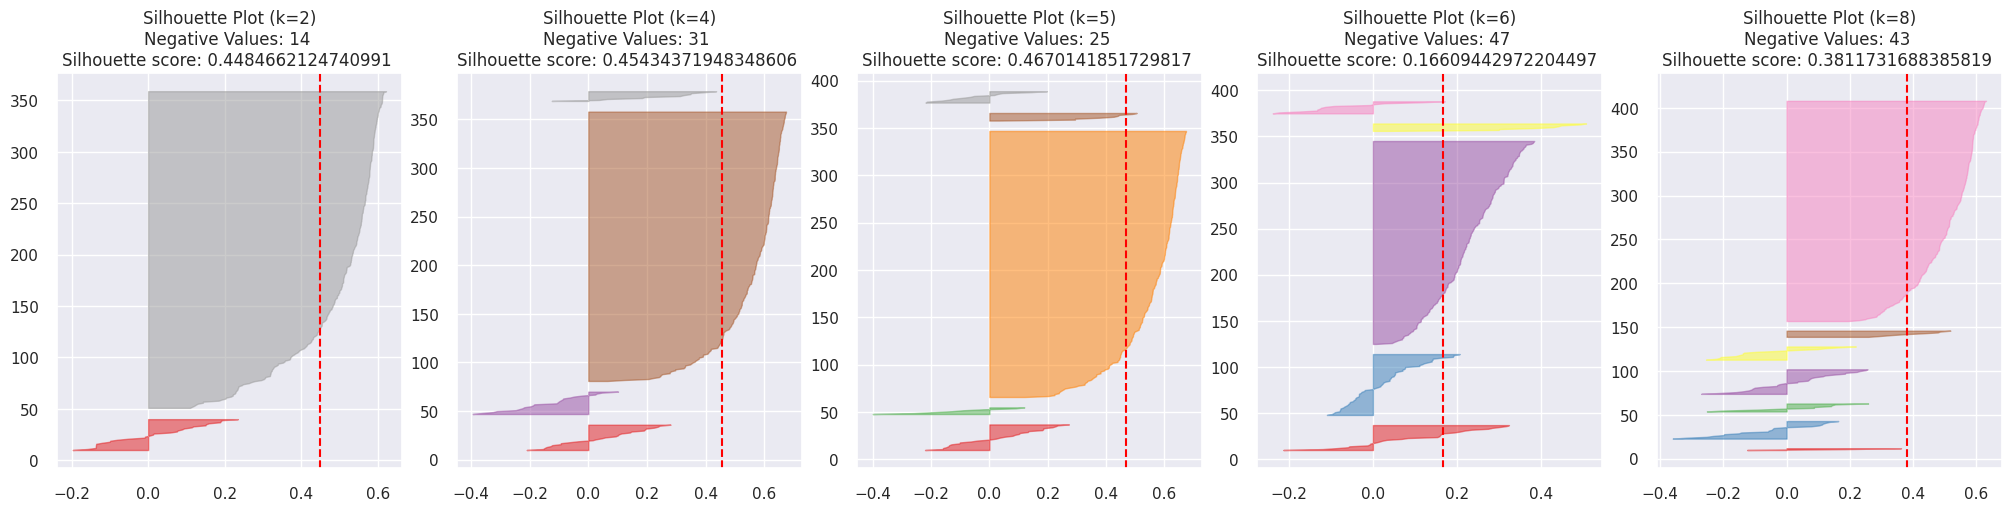

In [524]:
# Number of clusters to test
clusters = [2, 4,5, 6, 8]

# Create subplots for silhouette plots
fig, axes = plt.subplots(1, len(clusters), figsize=(20, 5), constrained_layout=True)

# Store negative silhouette score counts
negative_values_counts = []

# Loop through different values of k and plot
for i, k in enumerate(clusters):
    model_kmeans = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model_kmeans, ax=axes[i])
    visualizer.fit(scaled_trade_data_df)

    # Extract silhouette scores and count negative values
    silhouette_scores = visualizer.silhouette_samples_
    negative_count = np.sum(silhouette_scores < 0)
    negative_values_counts.append(negative_count)
    score = silhouette_score(scaled_trade_data_df, visualizer.predict(scaled_trade_data_df))
    # Update title with negative count
    axes[i].set_title(f"Silhouette Plot (k={k})\nNegative Values: {negative_count} \nSilhouette score: {score} ")

plt.show()

### Observations:

**Silhouette Plot (k=2):**
- **Silhouette Score:** `0.4485` (relatively low)
- **Negative Values:** `14`  
  *31 data points might be misclassified.*

---

**Silhouette Plot (k=4):**
- **Silhouette Score:** `0.4543` (slightly higher than k=2)
- **Negative Values:** `31`  
  * improvement over k=2. interms of silhouette Score *

---

**Silhouette Plot (k=5):**
- **Silhouette Score:** `0.4670` (similar to k=4)
- **Negative Values:** `25`  
  *Less data points  misclassified compared to k=4.*

---

**Silhouette Plot (k=6):**
- **Silhouette Score:** `0.1661` (significantly lower than previous plots)
- **Negative Values:** `47`  
  *Clustering solution is not well-defined for this number of clusters.*

---

**Silhouette Plot (k=8):**
- **Silhouette Score:** `0.3812` (lower than k=4 and k=5)
- **Negative Values:** `43`  
  *Similar misclassification count as k=6.*


**We will go ahead with K=5 which has moderate nagative values highest silhouette score**

### Creating Final Model with K=5

In [525]:
# Train model with 5 clusters
final_kmeans_model = KMeans(5, random_state=42)
# Fit model
final_kmeans_model.fit(kmeans_scaledDf)
kmeans_df=trade_ahead_df.copy(deep=True)
# Assign the model with labels
kmeans_df['clusters']=final_kmeans_model.labels_


In [526]:
# Check the no of values in each clusters
kmeans_df.groupby('clusters')['clusters'].value_counts()

clusters
0     28
1      8
2    282
3      9
4     13
Name: count, dtype: int64

In [527]:
# Mean value across clusters
kmeans_df.select_dtypes(include='number').groupby('clusters').mean()

Current Price  Price Change  Volatility    ROE  Cash Ratio  \
clusters                                                               
0                 39.21        -13.77        2.94 109.46       55.32   
1                536.18          9.58        1.57  15.62      163.62   
2                 73.46          5.43        1.40  34.51       55.65   
3                 46.67          5.17        1.08  25.00       58.33   
4                 74.53          9.02        1.54  24.38      363.92   

          Net Cash Flow     Net Income  Earnings Per Share  \
clusters                                                     
0         -157380142.86 -3741645321.43               -9.07   
1          192455375.00   722016625.00               12.69   
2          -13418521.28  1470931982.27                3.64   
3        -3040666666.67 14848444444.44                3.44   
4         4069216538.46  4510914000.00                3.10   

          Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
clusters                                                      
0                         466855285.55      88.66       1.75  
1                         128041091.15     138.98      27.73  
2                         434059580.68      24.02      -3.18  
3                        4564959946.22      15.60      -6.35  
4                        1431070526.36      44.69       7.57

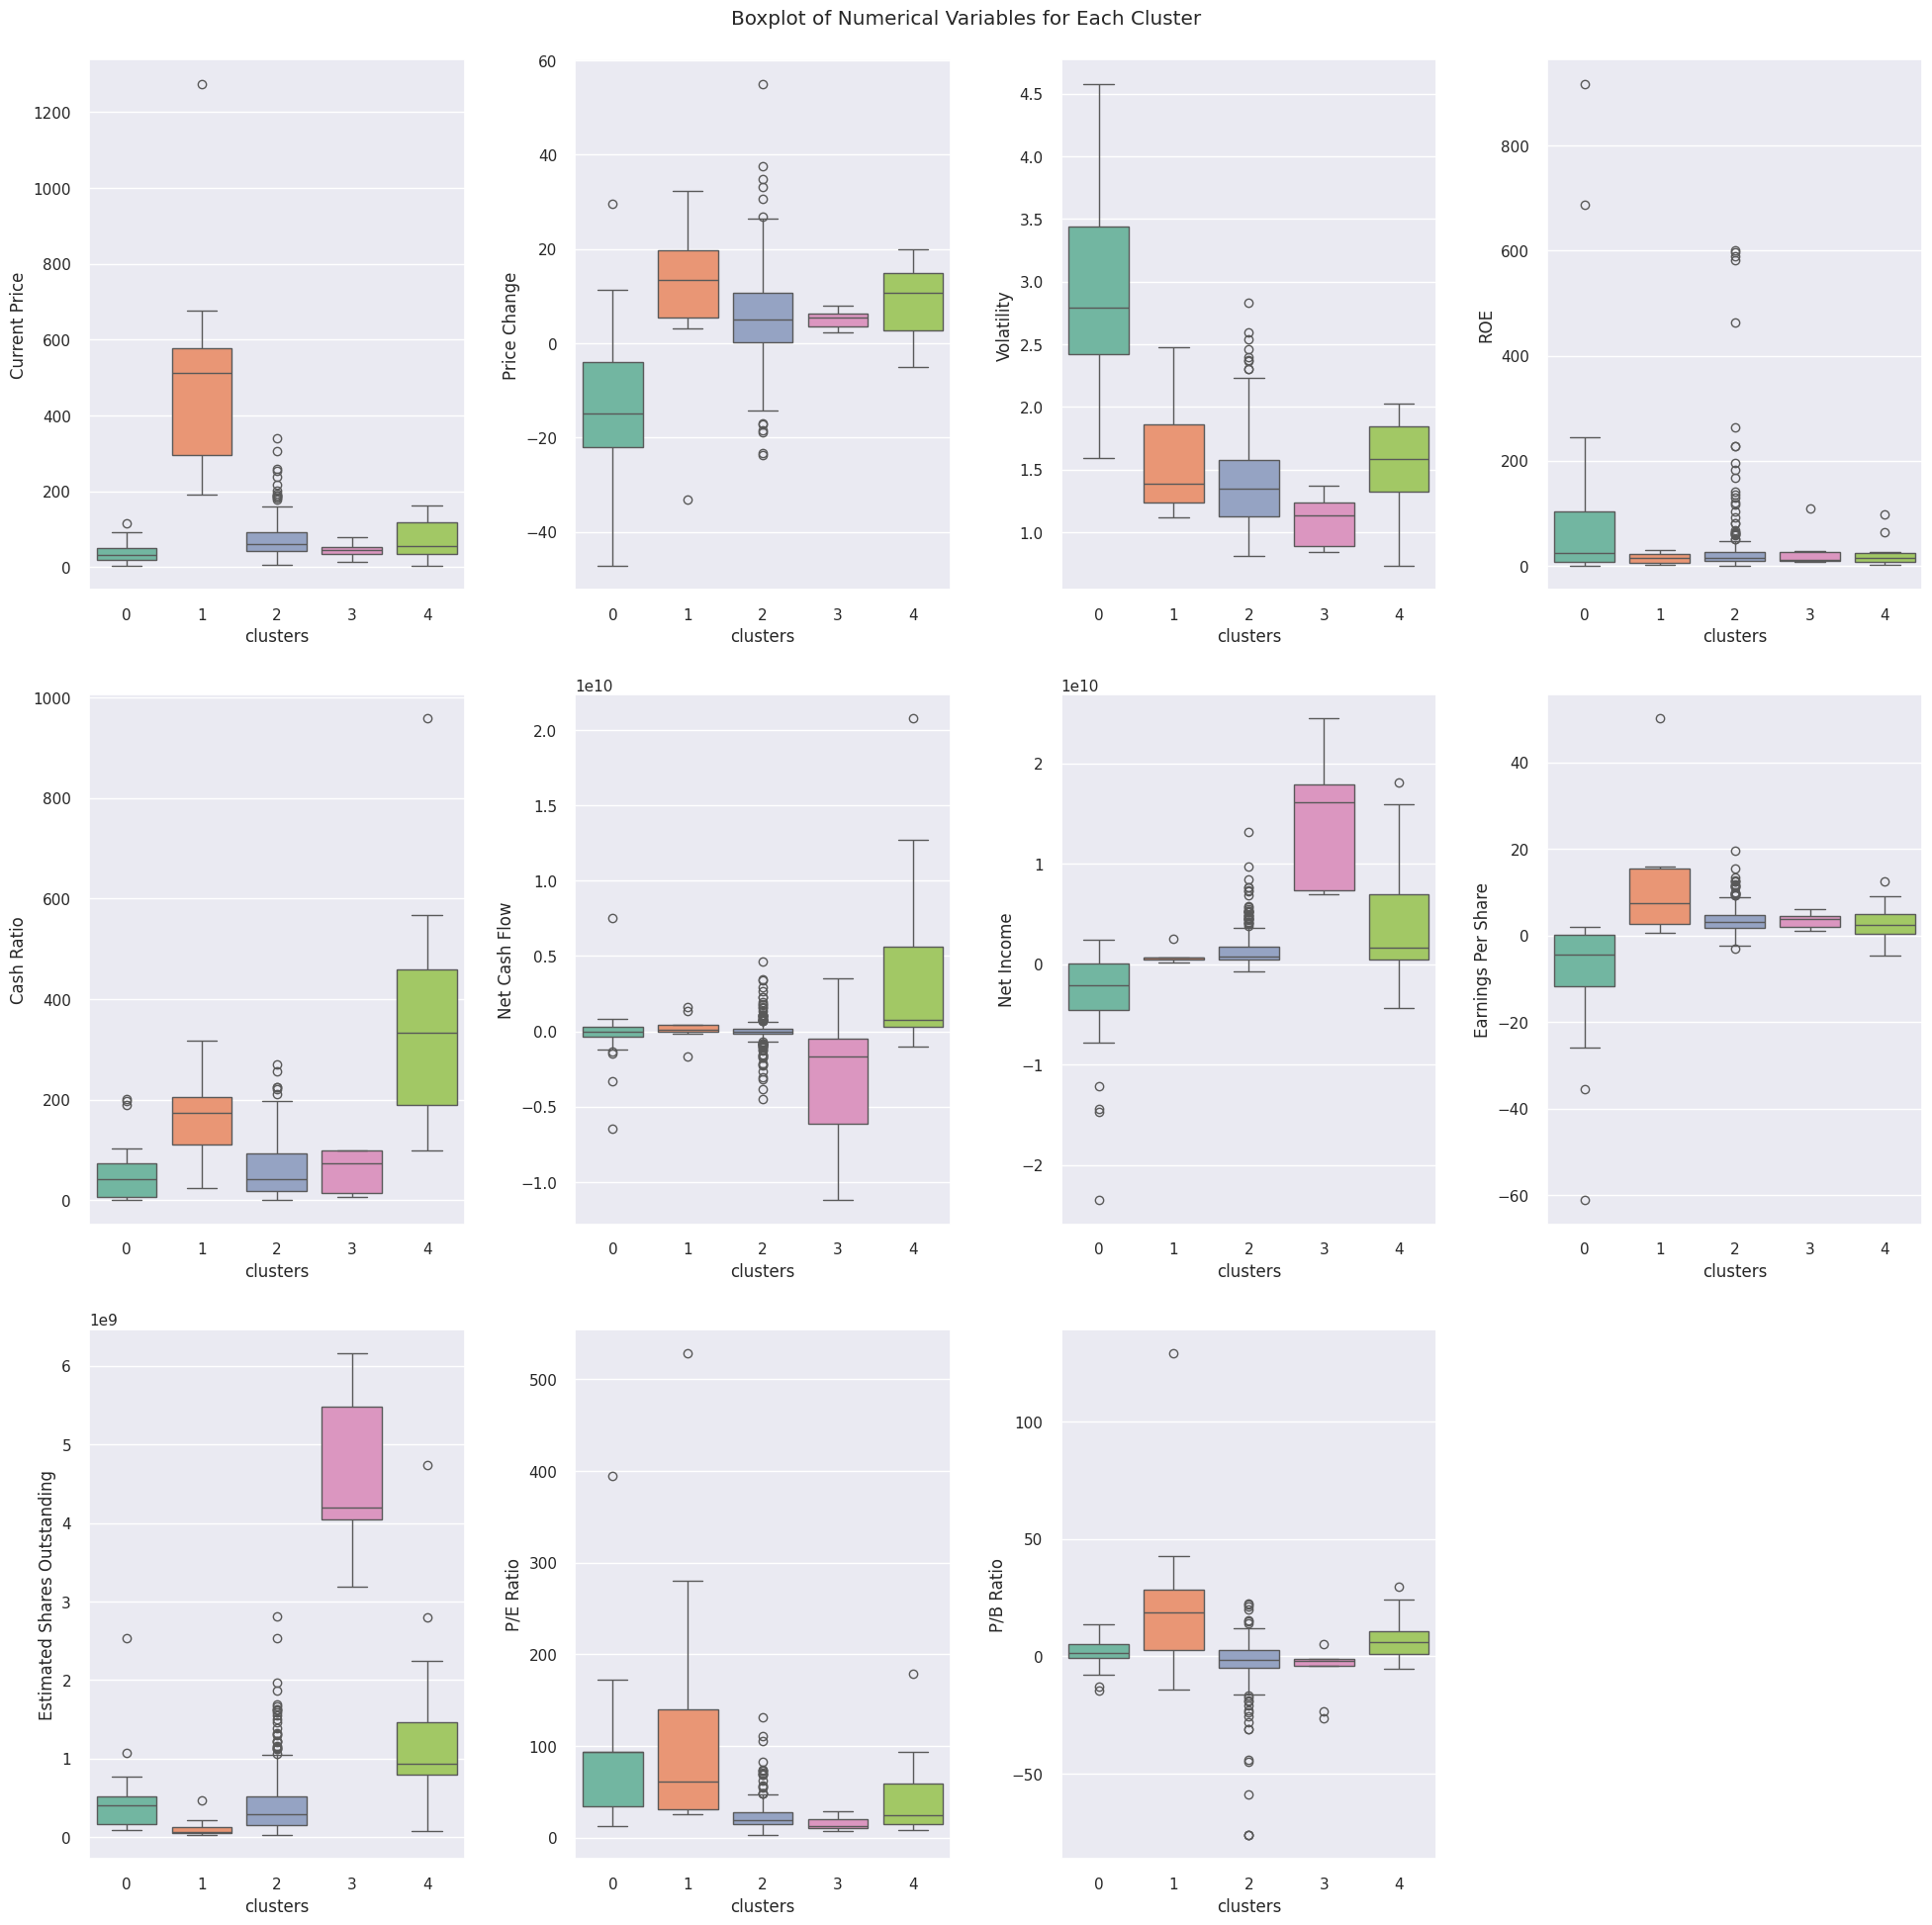

In [528]:
# Call utility function to show the box plot in all cluster
plot_cluster_boxplots(kmeans_df, 'clusters')

In [529]:
# Group it and shows differnt sectors across each cluster
gics_per_cluster = (
    kmeans_df.groupby('clusters')['GICS Sector']
    .unique()  # Extract unique values for each cluster
    .reset_index()  # Optional: Convert the result back to a DataFrame
    .rename(columns={'GICS Sector': 'Unique GICS Sectors'})  # Rename for clarity
)

gics_per_cluster


clusters  \
0         0   
1         1   
2         2   
3         3   
4         4   

                                                                                                                                                                Unique GICS Sectors  
0                                                                                                  [Energy, Materials, Information Technology, Industrials, Consumer Discretionary]  
1                                                                                                        [Information Technology, Health Care, Consumer Discretionary, Real Estate]  
2  [Industrials, Health Care, Information Technology, Consumer Staples, Utilities, Financials, Real Estate, Materials, Consumer Discretionary, Telecommunications Services, Energy]  
3                                                                          [Financials, Consumer Discretionary, Consumer Staples, Health Care, Telecommunications Services, Energy]  
4                                                  [Information Technology, Health Care, Financials, Telecommunications Services, Energy, Consumer Discretionary, Consumer Staples]

In [610]:
# Group by 'clusters' and 'GICS Sector', then count the 'Security' column
sorted_counts = (
    kmeans_df.groupby(["clusters", "GICS Sector"])["Security"]
    .count()
    .reset_index(name="count")  # Convert the result to a DataFrame with a column named 'count'
    .sort_values(by=["clusters", "count"], ascending=[True, False])  # Sort by 'clusters' and then 'count' descending
)

# Display
sorted_counts

clusters                  GICS Sector  count
1          0                       Energy     22
3          0       Information Technology      3
0          0       Consumer Discretionary      1
2          0                  Industrials      1
4          0                    Materials      1
5          1       Consumer Discretionary      3
6          1                  Health Care      3
7          1       Information Technology      1
8          1                  Real Estate      1
14         2                  Industrials     52
12         2                   Financials     45
9          2       Consumer Discretionary     34
13         2                  Health Care     32
17         2                  Real Estate     26
15         2       Information Technology     25
19         2                    Utilities     24
16         2                    Materials     19
10         2             Consumer Staples     17
11         2                       Energy      6
18         2  Telecommunications Services      2
23         3                   Financials      3
25         3  Telecommunications Services      2
20         3       Consumer Discretionary      1
21         3             Consumer Staples      1
22         3                       Energy      1
24         3                  Health Care      1
30         4                  Health Care      4
31         4       Information Technology      4
26         4       Consumer Discretionary      1
27         4             Consumer Staples      1
28         4                       Energy      1
29         4                   Financials      1
32         4  Telecommunications Services      1

### Observations:
**Cluster 0:**(28)
- Concentration in Energy Dominated by the Energy sector with 22 entities.
- Information Technology (3) and minor presence from Consumer Discretionary (1), Industrials (1), and Materials (1).
- Insight: Due to concentration of energy this cluster is high Variation in Prices and Cash Ratio and even volatility.

**Cluster 1:** (8)
- Mixed Presence Balanced representation of:
Consumer Discretionary (3), Health Care (3).
- Minor presence from Information Technology (1) and Real Estate (1).
- Insight: Capture stable performers with consistent financial outcomes and limited fluctuations.

**Cluster 2:** (282)
- Highly Diverse and Largest Cluster Industrials (52) and Financials (45) dominate the cluster.Significant representation from:
Consumer Discretionary (34), Health Care (32), and Real Estate (26).
Also includes Information Technology (25), Utilities (24), Materials (19), and Consumer Staples (17).
- Minor presence from Energy (6) and Telecommunications Services (2).
- Insight: Reflects a highly diverse group, including both high performers and struggling entities across all financial metrics.

**Cluster 3:** (9)
- Sparse and Niche Small counts across several sectors:
Financials (3), Telecommunications Services (2).
- Single entities in Consumer Discretionary, Consumer Staples, Energy, and Health Care.
- Insight: A small and niche cluster with minimal sector representation.

**Cluster 4:** (13)
- Small but Balanced Equal representation of Health Care (4) and Information Technology (4).
- Sparse presence in Consumer Discretionary (1), Consumer Staples (1), Energy (1), Financials (1), and Telecommunications Services (1).
- Insight: A balanced but small cluster with emphasis on Health Care and Information Technology.


---
Final Selection K=5:

Silhouette Score: 0.46

**Cluster Profiling:**

| Cluster | Size | Key Characteristics                                                 | Dominant Sectors                     |
|---------|------|---------------------------------------------------------------------|--------------------------------------|
| 0       | 28   | Highly volatile entities with extreme variability in price and liquidity. | Energy (78.57%)                      |
| 1       | 8    | Stable, consistent performers with low financial fluctuations.      | Consumer Discretionary, Health Care  |
| 2       | 282  | Diverse group with a wide spectrum of performance and financial health. | Industrials, Financials, Health Care |
| 3       | 10   | Niche specialists with stable but lower financial metrics.          | Financials, Telecommunications       |
| 4       | 13   | High performers with strong financial health and growth potential.  | Health Care, IT                      |

- Cluster 0 could represent entities that require monitoring for risk or short-term trading opportunities.
- Cluster 1 is ideal for low-risk, long-term investments.
- Cluster 2 diverisified cluster
- Cluster 3 represents small-cap or specialized companies and might require targeted strategies.
- Cluster 4 is an attractive group for growth-oriented or high-value investments.



### PCA Visualization

In [531]:
# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(scaled_trade_data_df)
reduced_trade_scaled_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["PC-1", "PC-2"]
)

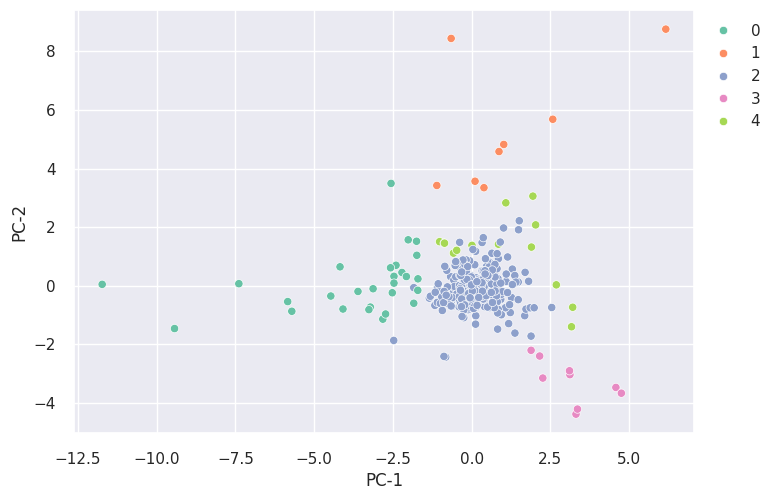

In [532]:
# Show in scatter plot
sns.scatterplot(
    data=reduced_trade_scaled_df_pca,
    x="PC-1",
    y="PC-2",
    hue=kmeans_df["clusters"],
    palette=pellete,
)
plt.legend(bbox_to_anchor=(1, 1));

- Cluster 2 is the biggest cluster
- We can see there is overlap between cluster 2 and cluster 4 .but k=5 is something gives lowest no of nagative clustering.

### Hierarchical Clustering

In [533]:
hierchicla_trade_scaled_df=scaled_trade_data_df.copy()
hierchical_df=trade_ahead_df.copy(deep=True)


In [534]:
distance = ["euclidean", "chebyshev", "mahalanobis"]
# list of linkage methods
linkage_meth = ["single", "complete", "average"]

In [535]:
high_cophenet_corr = 0
high_dist = [0, 0]

for dm in distance:
    for lm in linkage_meth:
        Z = linkage(hierchicla_trade_scaled_df,method=lm,metric=dm)
        c, coph_dists = cophenet(Z, pdist(hierchicla_trade_scaled_df,metric=dm))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm.capitalize(), c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dist[0] = dm
            high_dist[1] = lm

Cophenetic correlation for Euclidean distance and Single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and Complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and Average linkage is 0.9422540609560814.
Cophenetic correlation for Chebyshev distance and Single linkage is 0.8936221223625007.
Cophenetic correlation for Chebyshev distance and Complete linkage is 0.6115913526188475.
Cophenetic correlation for Chebyshev distance and Average linkage is 0.9444580894762943.
Cophenetic correlation for Mahalanobis distance and Single linkage is 0.9280564992678118.
Cophenetic correlation for Mahalanobis distance and Complete linkage is 0.8243567807532551.
Cophenetic correlation for Mahalanobis distance and Average linkage is 0.9393406962460793.


In [536]:
# checking for ward and centrioid as both are limited to eucledian
linkage_meth_reman = ["centroid", "ward"]

for lm in linkage_meth_reman:
    Z = linkage(hierchicla_trade_scaled_df, method=lm)
    c, coph_dists = cophenet(Z, pdist(hierchicla_trade_scaled_df,metric=dm))
    print("Cophenetic correlation for {} distance and {} linkage is {}.".format(
                  'Eucledian', lm.capitalize(), c
              ))
    if high_cophenet_corr < c:
          high_cophenet_corr = c
          high_dist[0] = dm
          high_dist[1] = lm

Cophenetic correlation for Eucledian distance and Centroid linkage is 0.9205915034438008.
Cophenetic correlation for Eucledian distance and Ward linkage is 0.6884877732024464.


### Observation

The **cophenetic correlation coefficient** evaluates how well a hierarchical clustering preserves the pairwise distances between data points. Higher values indicate a better representation of the original pairwise distances.

---

### **Best Combination**
- The highest cophenetic correlation is **0.9445** for **Chebyshev distance** with **Average linkage**.  
  This combination best preserves the original pairwise distances.

---

### **Distance Metrics**
1. **Euclidean Distance**:
   - Performs well with consistently high correlations.
   - **Highest value**: **0.9423** with Average linkage.
   
2. **Chebyshev Distance**:
   - Best-performing metric overall.
   - **Highest value**: **0.9445** with Average linkage.
   
3. **Mahalanobis Distance**:
   - Performs well with Average linkage (**0.9393**)
---

### **Linkage Methods**
- **Average Linkage**:
  - Best-performing method across all distance metrics, with high cophenetic correlations.
  
- **Single Linkage**:
  - Performs well but slightly less optimal compared to Average linkage.
  
- **Complete Linkage**:
  - Performs poorly compared to Average and Single linkage.
  
- **Ward Linkage**:
  - Tested with Eucledian distance, but performed the worst (**0.68**).

---

In [537]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dist[0].capitalize(), high_dist[1]
    )
)

Highest cophenetic correlation is 0.9444580894762943, which is obtained with Chebyshev distance and average linkage.


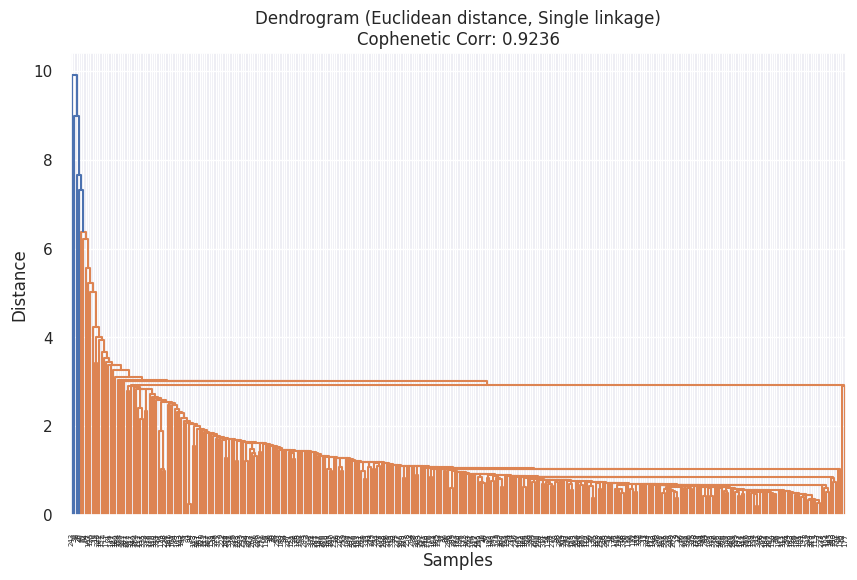

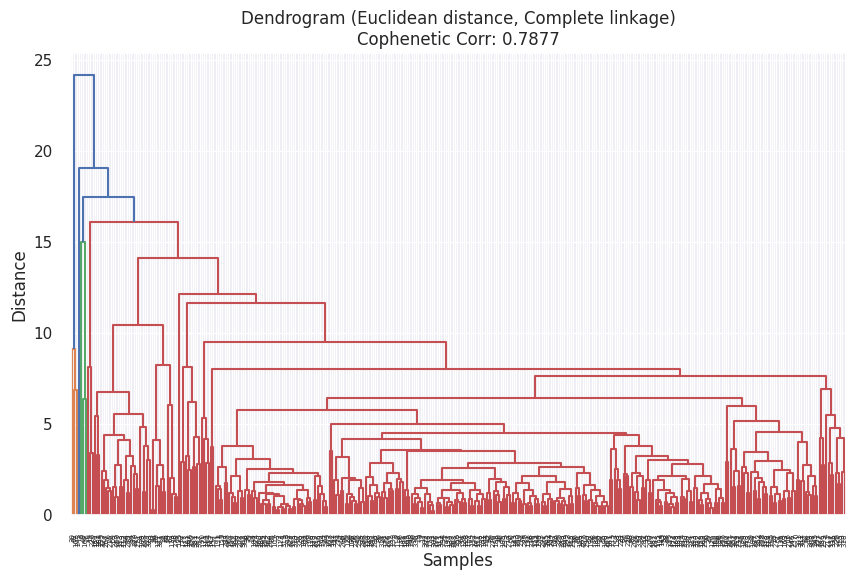

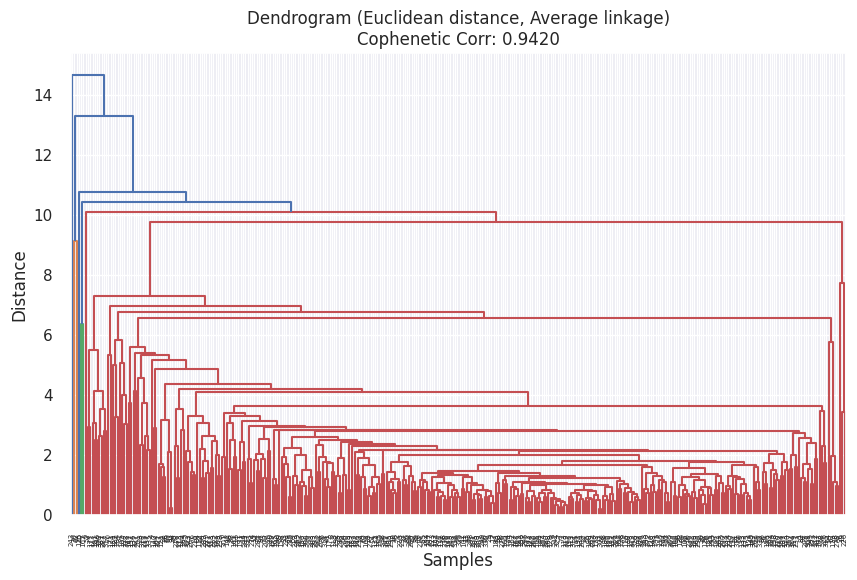

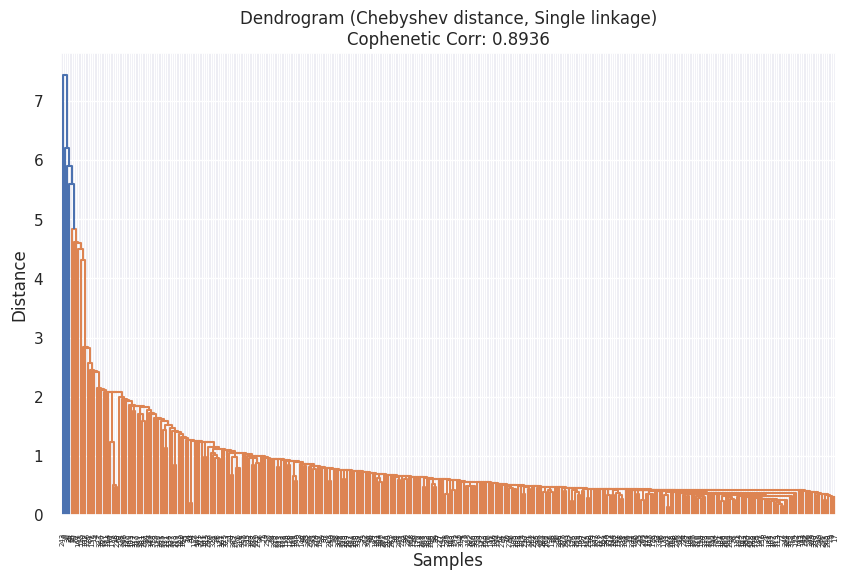

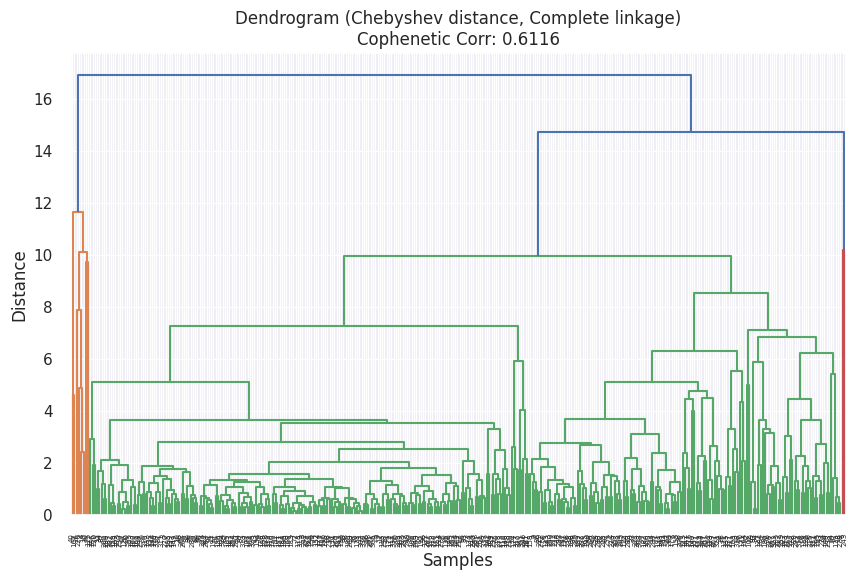

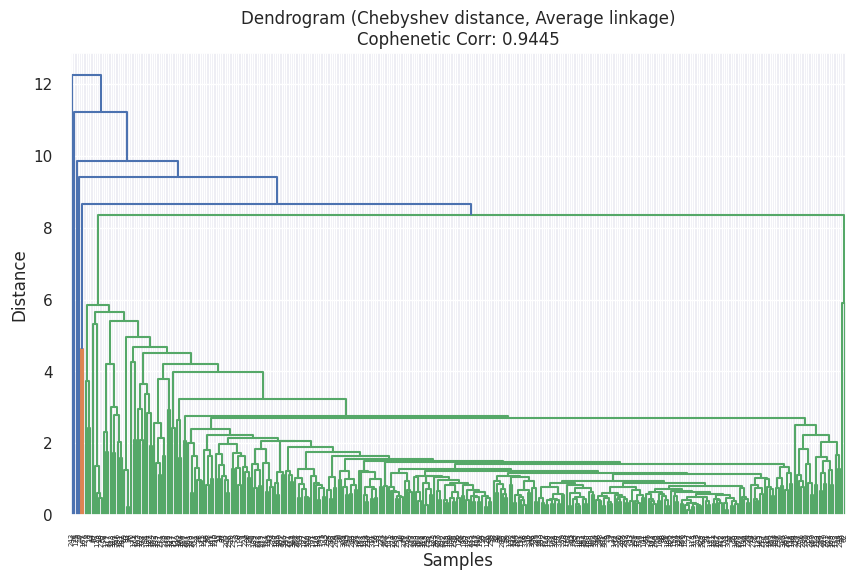

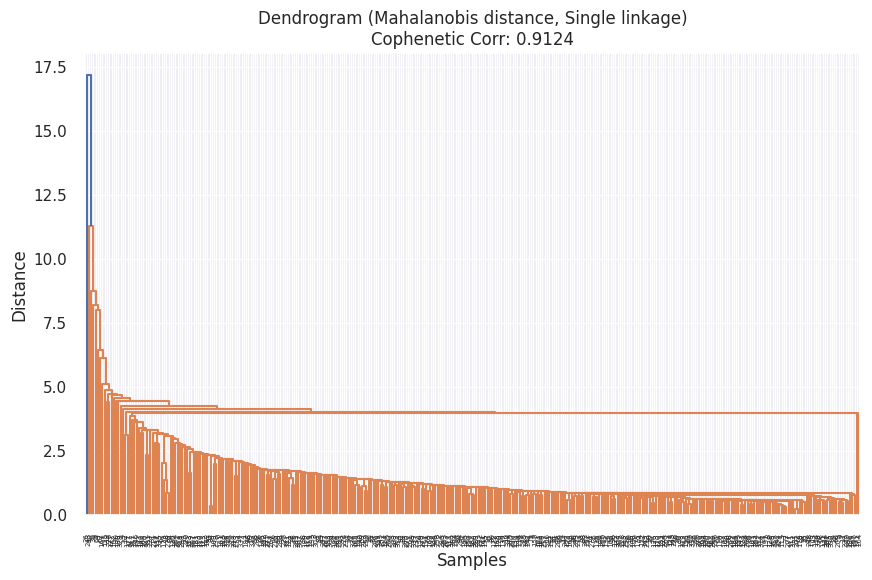

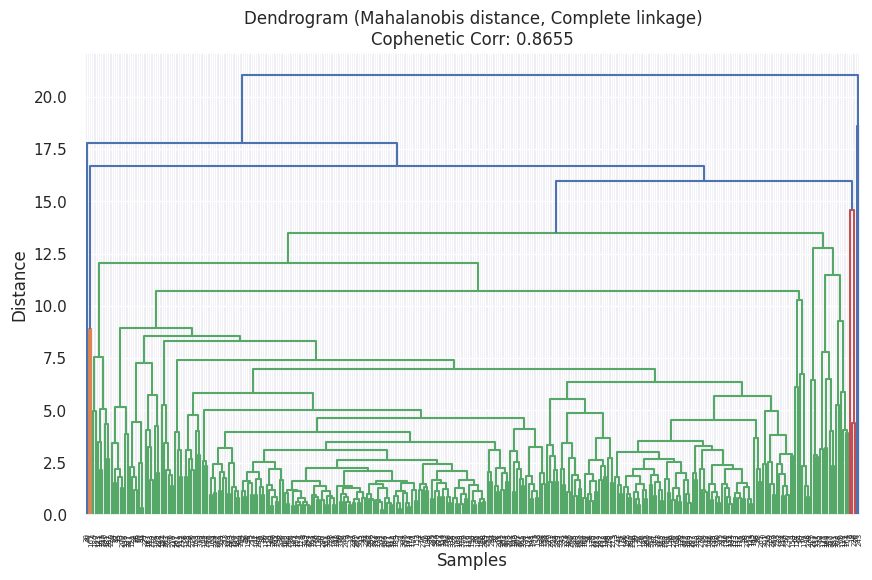

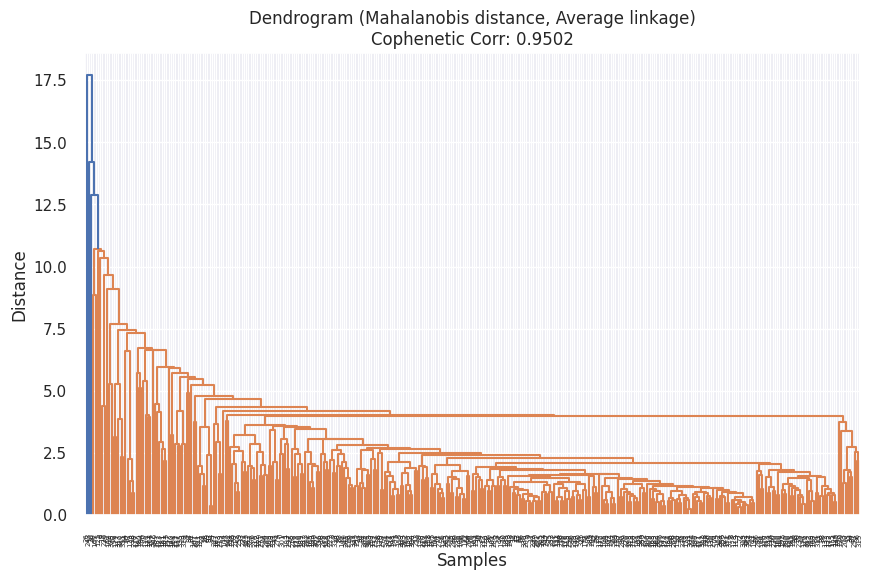


--- Summary of Results ---
Mahalanobis distance + Average linkage: Cophenetic Corr = 0.9502
Chebyshev distance + Average linkage: Cophenetic Corr = 0.9445
Euclidean distance + Average linkage: Cophenetic Corr = 0.9420
Euclidean distance + Single linkage: Cophenetic Corr = 0.9236
Mahalanobis distance + Single linkage: Cophenetic Corr = 0.9124
Chebyshev distance + Single linkage: Cophenetic Corr = 0.8936
Mahalanobis distance + Complete linkage: Cophenetic Corr = 0.8655
Euclidean distance + Complete linkage: Cophenetic Corr = 0.7877
Chebyshev distance + Complete linkage: Cophenetic Corr = 0.6116

High Cophenetic Correlation Combinations:
Euclidean distance + Single linkage: Cophenetic Corr = 0.9236
Euclidean distance + Complete linkage: Cophenetic Corr = 0.7877
Euclidean distance + Average linkage: Cophenetic Corr = 0.9420
Chebyshev distance + Single linkage: Cophenetic Corr = 0.8936
Chebyshev distance + Complete linkage: Cophenetic Corr = 0.6116
Chebyshev distance + Average linkage: Cop

In [575]:
# Call the function
high_corr_combinations = plot_high_cophenetic_clusters(hierchicla_trade_scaled_df, distance, linkage_meth, threshold=0.6)

# Print high cophenetic correlation combinations
print("\nHigh Cophenetic Correlation Combinations:")
for dm, lm, corr in high_corr_combinations:
    print(f"{dm.capitalize()} distance + {lm.capitalize()} linkage: Cophenetic Corr = {corr:.4f}")

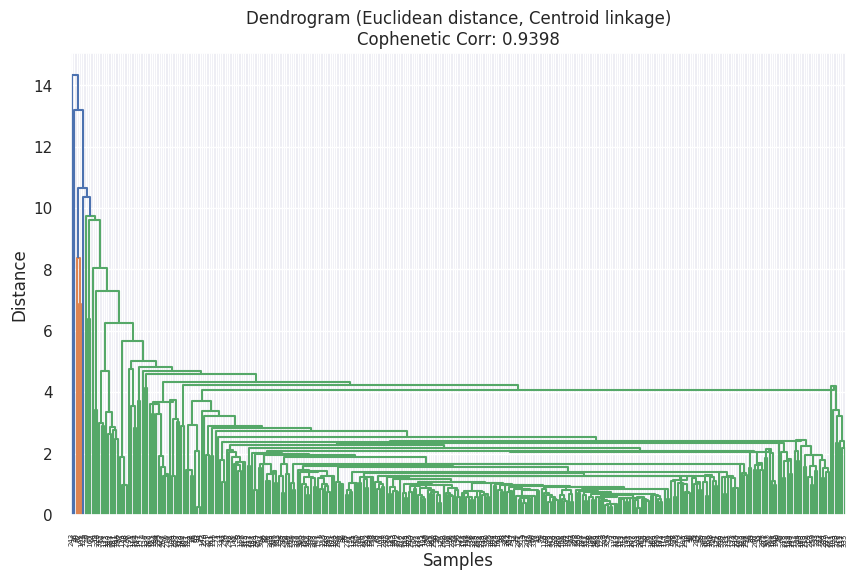

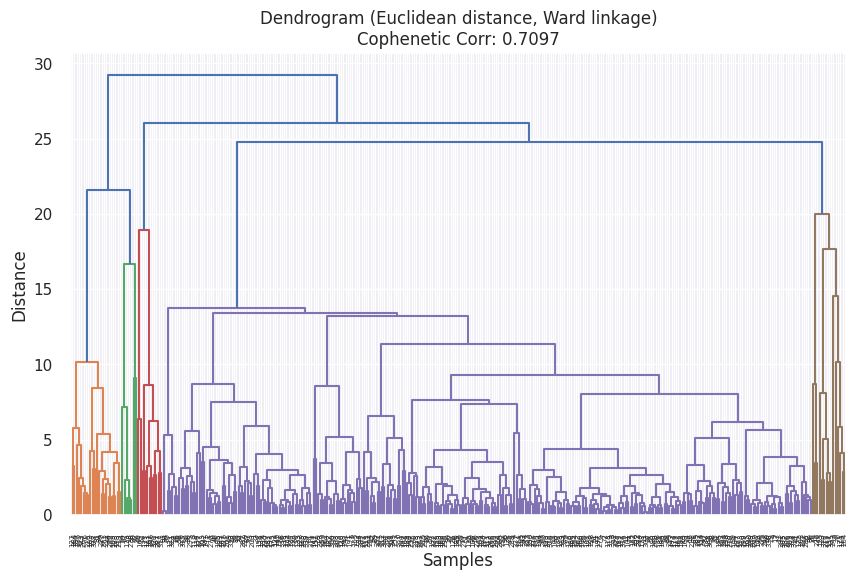


--- Summary of Results ---
Euclidean distance + Centroid linkage: Cophenetic Corr = 0.9398
Euclidean distance + Ward linkage: Cophenetic Corr = 0.7097

High Cophenetic Correlation Combinations:
Euclidean distance + Centroid linkage: Cophenetic Corr = 0.9398
Euclidean distance + Ward linkage: Cophenetic Corr = 0.7097


In [585]:
# Call the function
distance=['euclidean']
high_corr_combinations = plot_high_cophenetic_clusters(hierchicla_trade_scaled_df,distance , linkage_meth_reman, threshold=0.6)

# Print high cophenetic correlation combinations
print("\nHigh Cophenetic Correlation Combinations:")
for dm, lm, corr in high_corr_combinations:
    print(f"{dm.capitalize()} distance + {lm.capitalize()} linkage: Cophenetic Corr = {corr:.4f}")

### Observation:
- Though we had seen cophenetic corr is higher for Chebyshev distance with average linkage ,Eucledian with average linkage (.92-.94) but most of them  have only 2-3 clusters apart from **Euclidean distance + Ward linkage** which has more cluster

### Chebyshev and Average method

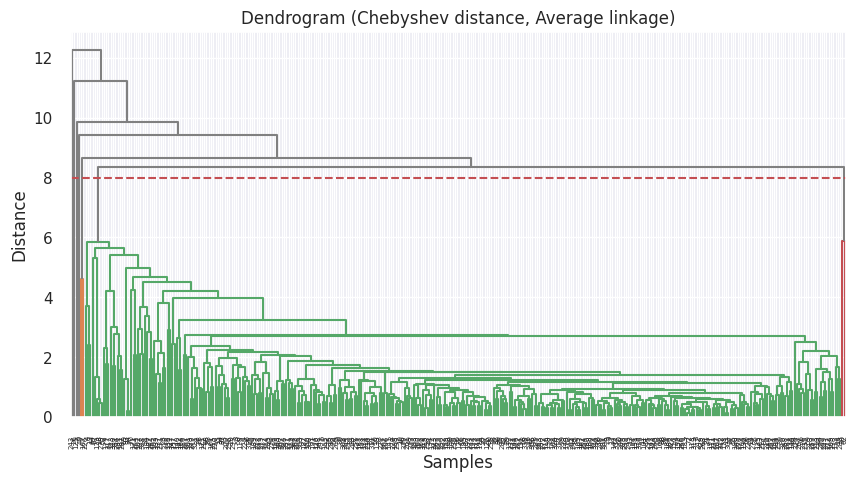

In [566]:
# plot dendogram
dict=plot_dendrogram(
    data=hierchicla_trade_scaled_df,
    method="average",
    metric="chebyshev",
    threshold=8,
    figsize=(10, 5)
)

In [567]:
optimal_no_of_clusters=len(set(dict['color_list']))-1
print(f"Optimal no of clusters is {optimal_no_of_clusters}")


Optimal no of clusters is 3


we decided to start to cut at 8 because below that the other cluster horizontal line are cutting the vertical dendogramic distance  and from the no of colors we decided to go ahead with 3 clusters

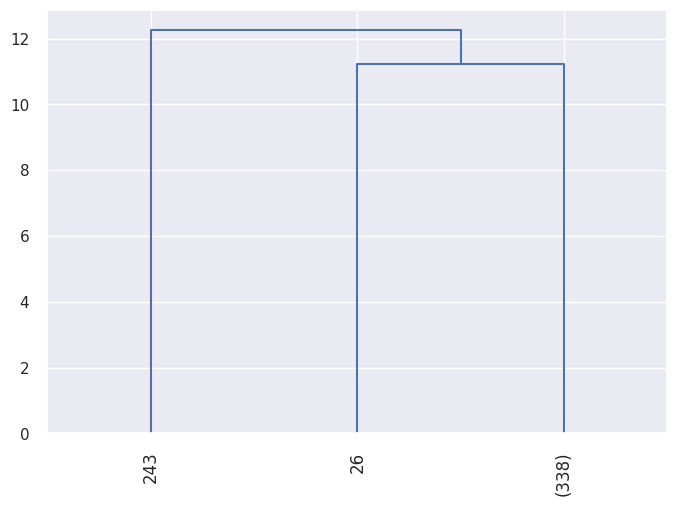

In [600]:
Z = linkage(hierchicla_trade_scaled_df, method='average', metric='chebyshev')
dend=dendrogram(Z,p=3,truncate_mode='lastp',leaf_rotation=90)

In [541]:
agg_model = AgglomerativeClustering(n_clusters=3,metric='chebyshev',linkage='average')
agg_model.fit(hierchicla_trade_scaled_df)

AgglomerativeClustering(linkage='average', metric='chebyshev', n_clusters=3)

In [542]:
# adding hierarchical cluster labels to the original and scaled dataframes

hierchicla_trade_scaled_df["HC_Clusters"] = agg_model.labels_
hierchical_df["HC_Clusters"] = agg_model.labels_

In [543]:
# Group it and shows differnt sectors across each cluster
gics_per_cluster_hc = (
    hierchical_df.groupby('HC_Clusters')['GICS Sector']
    .unique()  # Extract unique values for each cluster
    .reset_index()  # Optional: Convert the result back to a DataFrame
    .rename(columns={'GICS Sector': 'Unique GICS Sectors'})  # Rename for clarity
)

gics_per_cluster_hc

HC_Clusters  \
0            0   
1            1   
2            2   

                                                                                                                                                                Unique GICS Sectors  
0  [Industrials, Health Care, Information Technology, Consumer Staples, Utilities, Financials, Real Estate, Materials, Consumer Discretionary, Energy, Telecommunications Services]  
1                                                                                                                                                          [Consumer Discretionary]  
2                                                                                                                                                          [Consumer Discretionary]

In [544]:
clusterprofile = hierchical_df.select_dtypes(include='number').groupby("HC_Clusters").mean()
clusterprofile

Current Price  Price Change  Volatility   ROE  Cash Ratio  \
HC_Clusters                                                              
0                    75.57          4.00        1.53 39.73       69.72   
1                  1274.95          3.19        1.27 29.00      184.00   
2                   675.89         32.27        1.46  4.00       58.00   

             Net Cash Flow    Net Income  Earnings Per Share  \
HC_Clusters                                                    
0              56867387.57 1493915399.41                2.64   
1           -1671386000.00 2551360000.00               50.09   
2            1333000000.00  596000000.00                1.28   

             Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
HC_Clusters                                                      
0                            578914421.07      31.17      -1.74  
1                             50935516.07      25.45      -1.05  
2                            465625000.00     528.04       3.90

In [545]:
# Group by 'clusters' and 'GICS Sector', then count the 'Security' column
sorted_counts_hc = (
    hierchical_df.groupby(["HC_Clusters", "GICS Sector"])["Security"]
    .count()
    .reset_index(name="count")  # Convert the result to a DataFrame with a column named 'count'
    .sort_values(by=["HC_Clusters", "count"], ascending=[True, False])  # Sort by 'clusters' and then 'count' descending
)

# Display
sorted_counts_hc

HC_Clusters                  GICS Sector  count
5             0                  Industrials     53
3             0                   Financials     49
4             0                  Health Care     40
0             0       Consumer Discretionary     38
6             0       Information Technology     33
2             0                       Energy     30
8             0                  Real Estate     27
10            0                    Utilities     24
7             0                    Materials     20
1             0             Consumer Staples     19
9             0  Telecommunications Services      5
11            1       Consumer Discretionary      1
12            2       Consumer Discretionary      1

### Observations:
We can see majority of the sector are in cluster 0 where as second and third cluster are hardly having one each from Consumer Dicretionary

In [546]:
hierchical_df['HC_Clusters'].value_counts()

HC_Clusters
0    338
2      1
1      1
Name: count, dtype: int64

-  Majority of the stocks are grouped in cluster 0 .Hardly one from Consumer Discretionary are in cluster 1 and 2
- This is not really useful and doesn't help with the business problem

### Eucledian+Ward

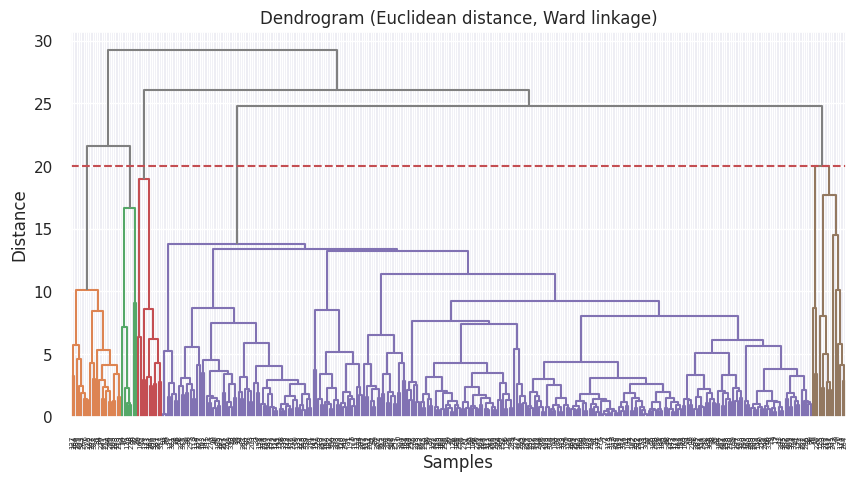

In [597]:
# plot dendogram
dict=plot_dendrogram(
    data=hierchicla_trade_scaled_df,
    method="ward",
    metric="euclidean",
    threshold=20,
    figsize=(10, 5)
)

Around 5 cluster if take cut at 20

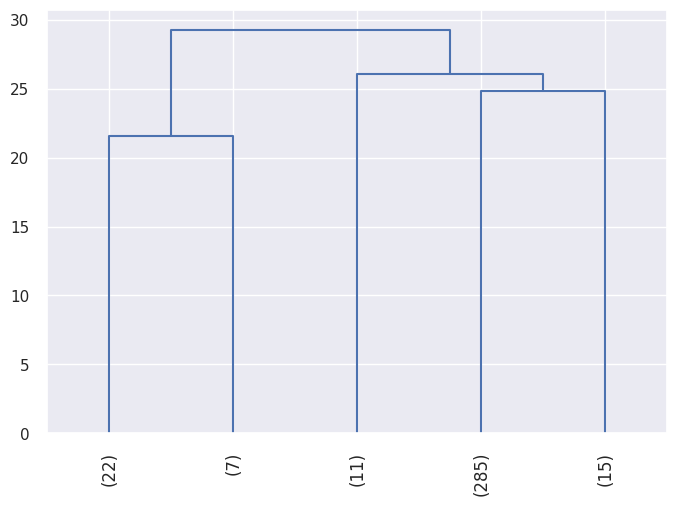

In [598]:
Z = linkage(hierchicla_trade_scaled_df, method='ward', metric='euclidean')
dend=dendrogram(Z,p=5,truncate_mode='lastp',leaf_rotation=90)

In [605]:
HCmodel = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
HCmodel.fit(hierchicla_trade_scaled_df)

AgglomerativeClustering(n_clusters=5)

In [606]:
hierchical_df_1=trade_ahead_df.copy(deep=True)
hierchical_df_1["HC_clusters"] = HCmodel.labels_

In [607]:
hierchical_df_1['HC_clusters'].value_counts()

HC_clusters
3    285
4     22
0     15
2     11
1      7
Name: count, dtype: int64

In [617]:
# Mean value across clusters
hierchical_df_1.select_dtypes(include='number').groupby('HC_clusters').mean()

Current Price  Price Change  Volatility    ROE  Cash Ratio  \
HC_clusters                                                               
0                   326.20         10.56        1.64  14.40      309.47   
1                    84.36          3.85        1.83 633.57       33.57   
2                    42.85          6.27        1.12  22.73       71.45   
3                    72.76          5.21        1.43  25.60       60.39   
4                    36.44        -16.07        2.83  57.50       42.41   

             Net Cash Flow     Net Income  Earnings Per Share  \
HC_clusters                                                     
0             288850666.67   864498533.33                7.79   
1            -568400000.00 -4968157142.86              -10.84   
2             558636363.64 14631272727.27                3.41   
3              79951512.28  1538594322.81                3.66   
4            -472834090.91 -3161045227.27               -8.00   

             Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
HC_clusters                                                      
0                            544900261.30     113.10      19.14  
1                            398169036.44      42.28     -11.59  
2                           4242572567.29      15.24      -4.92  
3                            446472132.23      24.72      -2.65  
4                            514367806.20      85.56       0.84

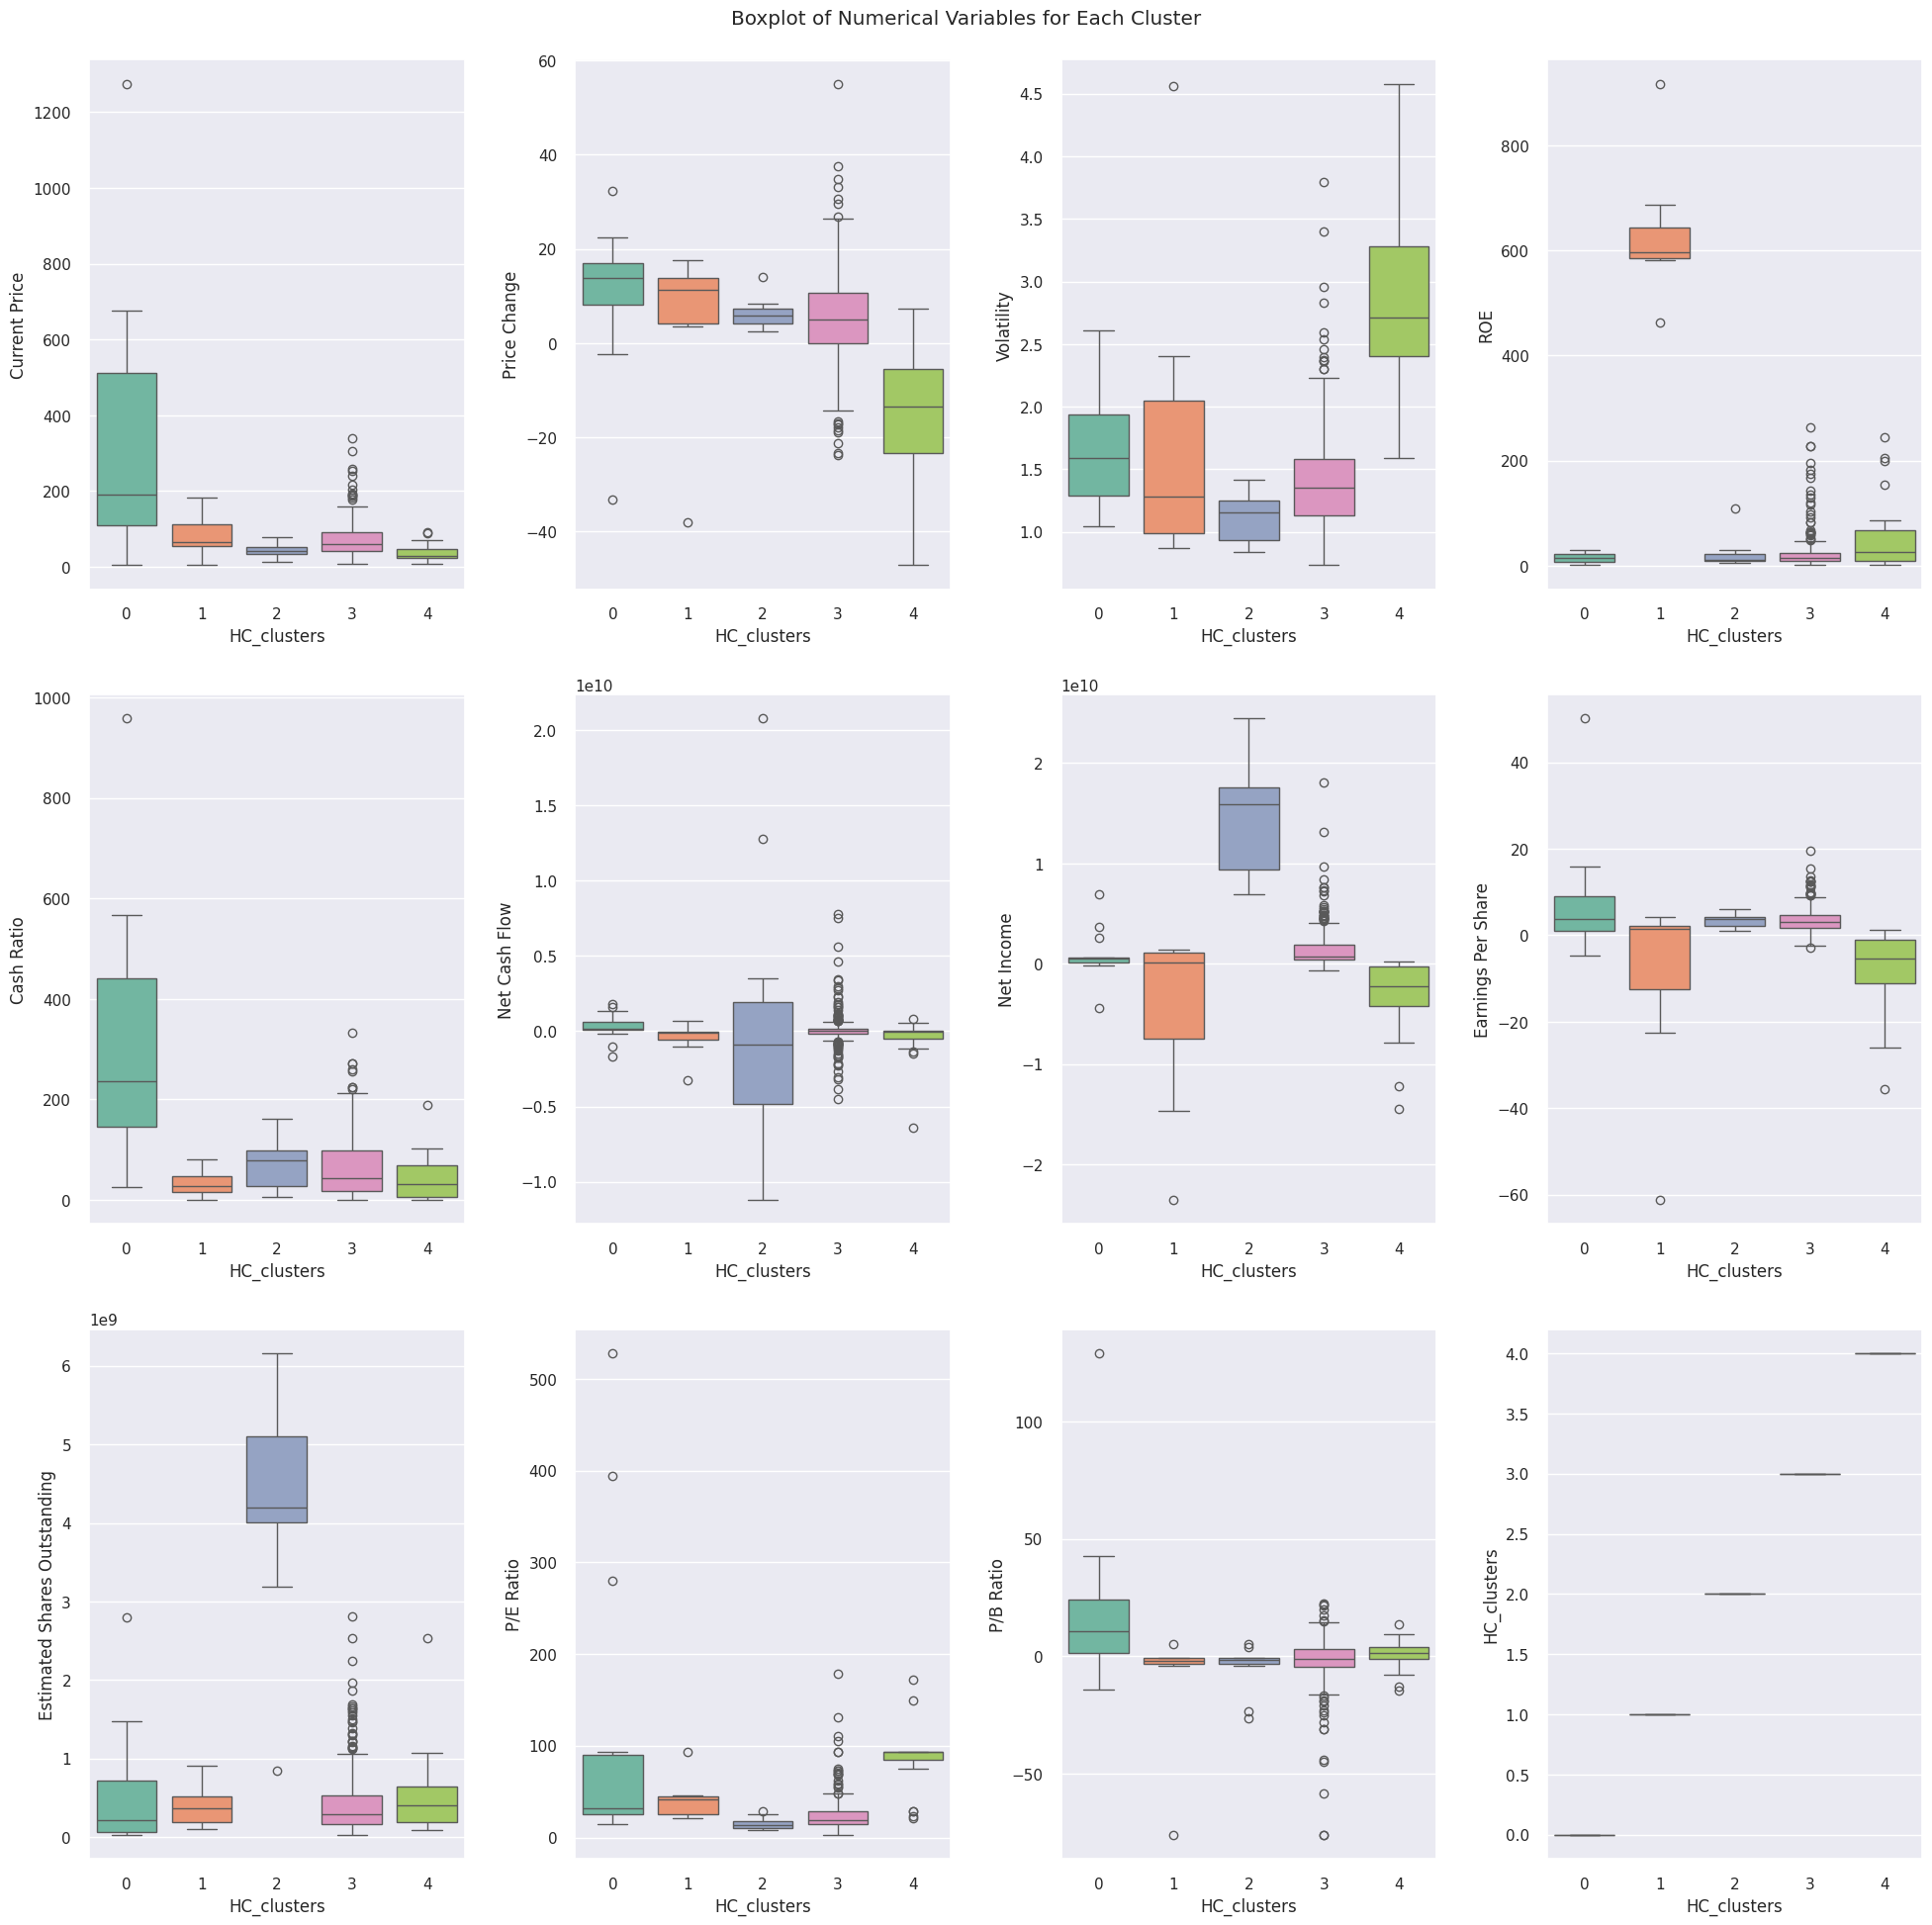

In [608]:
# Call utility function to show the box plot in all cluster
plot_cluster_boxplots(hierchical_df_1, 'HC_clusters')

### Observations:

---

 **Cluster 0**
- **Characteristics**:
  - **High current price**: 326.20.
  - **Relatively low price change**: +10.56 (moderate growth).
  - **Low volatility**: 1.64 (stable stock performance).
  - **Moderate ROE**: 14.40 (profitable but not exceptional).
  - **Extremely high cash ratio**: 309.47 (significant cash reserves).
  - **Positive net cash flow**: 288.85M (healthy liquidity).
  - **High net income**: 864.50M.
  - **Earnings Per Share (EPS)**: 7.79 (solid profitability for shareholders).
  - **High P/E Ratio**: 113.10 (suggests high valuation or growth expectations).
  - **Moderate P/B Ratio**: 19.14.

- **Interpretation**:  
  Likely a high-performing, stable company with strong liquidity and profitability. However, its high P/E ratio suggests potential overvaluation or high growth expectations.

---

**Cluster 1**
- **Characteristics**:
  - **Moderate current price**: 84.36.
  - **Low price change**: +3.85 (small growth).
  - **Moderate volatility**: 1.83.
  - **Extremely high ROE**: 633.57 (likely skewed by leverage or negative equity).
  - **Low cash ratio**: 33.57 (relatively lower liquidity).
  - **Negative net cash flow**: -568.40M (cash outflows).
  - **Negative net income**: -4.97B (loss-making).
  - **Negative EPS**: -10.84 (loss for shareholders).
  - **Moderate P/E Ratio**: 42.28.
  - **Negative P/B Ratio**: -11.59.

- **Interpretation**:  
   The high ROE might be due to financial leverage or other anomalies, making the stock risky.

---

**Cluster 2**
- **Characteristics**:
  - **Low current price**: 42.85.
  - **Moderate price change**: +6.27.
  - **Low volatility**: 1.12 (stable).
  - **Moderate ROE**: 22.73.
  - **Moderate cash ratio**: 71.45.
  - **Strong positive net cash flow**: 558.64M.
  - **High net income**: 14.63B.
  - **Moderate EPS**: 3.41.
  - **Low P/E Ratio**: 15.24 (fairly valued).
  - **Negative P/B Ratio**: -4.92.

- **Interpretation**:  
  This cluster represents a stable, moderately profitable company. Its valuation seems reasonable with a fair P/E ratio and steady earnings. The negative P/B ratio warrants further investigation.

---

**Cluster 3**
- **Characteristics**:
  - **Moderate current price**: 72.76.
  - **Low price change**: +5.21.
  - **Moderate volatility**: 1.43.
  - **Moderate ROE**: 25.60.
  - **Relatively low cash ratio**: 60.39.
  - **Small positive net cash flow**: 79.95M.
  - **Moderate net income**: 1.54B.
  - **Moderate EPS**: 3.66.
  - **Moderate P/E Ratio**: 24.72.
  - **Negative P/B Ratio**: -2.65.

- **Interpretation**:  
  A company with moderate profitability, liquidity, and valuation. Its negative P/B ratio may reflect intangible assets or accounting anomalies.

---
**Cluster 4**
- **Characteristics**:
  - **Very low current price**: 36.44.
  - **Significant price drop**: -16.07.
  - **High volatility**: 2.83 (unstable performance).
  - **High ROE**: 57.50.
  - **Low cash ratio**: 42.41.
  - **Negative net cash flow**: -472.83M.
  - **Negative net income**: -3.16B (loss-making).
  - **Negative EPS**: -8.00.
  - **High P/E Ratio**: 85.56.
  - **Low P/B Ratio**: 0.84.

- **Interpretation**:  
  A high-risk cluster, characterized by declining stock price, high volatility, and significant losses. Despite high ROE, the valuation metrics suggest a troubled company.This might be due to presence of sector like energy.


In [609]:
# Group it and shows differnt sectors across each cluster
gics_per_cluster_hier = (
    hierchical_df_1.groupby('HC_clusters')['GICS Sector']
    .unique()  # Extract unique values for each cluster
    .reset_index()  # Optional: Convert the result back to a DataFrame
    .rename(columns={'GICS Sector': 'Unique GICS Sectors'})  # Rename for clarity
)

gics_per_cluster_hier


HC_clusters  \
0            0   
1            1   
2            2   
3            3   
4            4   

                                                                                                                                                                Unique GICS Sectors  
0                                                         [Information Technology, Health Care, Consumer Discretionary, Real Estate, Telecommunications Services, Consumer Staples]  
1                                                                                                       [Industrials, Energy, Consumer Discretionary, Consumer Staples, Financials]  
2                                                  [Financials, Consumer Discretionary, Information Technology, Consumer Staples, Health Care, Telecommunications Services, Energy]  
3  [Industrials, Health Care, Information Technology, Consumer Staples, Utilities, Financials, Real Estate, Materials, Consumer Discretionary, Telecommunications Services, Energy]  
4                                                                                                                                       [Energy, Materials, Information Technology]

In [612]:
# Group by 'clusters' and 'GICS Sector', then count the 'Security' column
sorted_counts_hier = (
    hierchical_df_1.groupby(["HC_clusters", "GICS Sector"])["Security"]
    .count()
    .reset_index(name="count")  # Convert the result to a DataFrame with a column named 'count'
    .sort_values(by=["HC_clusters", "count"], ascending=[True, False])  # Sort by 'clusters' and then 'count' descending
)

# Display
sorted_counts_hier

HC_clusters                  GICS Sector  count
2             0                  Health Care      5
3             0       Information Technology      4
0             0       Consumer Discretionary      3
1             0             Consumer Staples      1
4             0                  Real Estate      1
5             0  Telecommunications Services      1
7             1             Consumer Staples      2
8             1                       Energy      2
6             1       Consumer Discretionary      1
9             1                   Financials      1
10            1                  Industrials      1
14            2                   Financials      4
17            2  Telecommunications Services      2
11            2       Consumer Discretionary      1
12            2             Consumer Staples      1
13            2                       Energy      1
15            2                  Health Care      1
16            2       Information Technology      1
23            3                  Industrials     52
21            3                   Financials     44
18            3       Consumer Discretionary     35
22            3                  Health Care     34
24            3       Information Technology     27
26            3                  Real Estate     26
28            3                    Utilities     24
25            3                    Materials     19
19            3             Consumer Staples     15
20            3                       Energy      7
27            3  Telecommunications Services      2
29            4                       Energy     20
30            4       Information Technology      1
31            4                    Materials      1

### Observations:

Below are the detailed insights into each cluster based on their GICS Sector breakdown.

  **Cluster 0:**

| GICS Sector                  | Count |
|------------------------------|-------|
| Health Care                   | 5     |
| Information Technology        | 4     |
| Consumer Discretionary        | 3     |
| Consumer Staples              | 1     |
| Real Estate                   | 1     |
| Telecommunications Services   | 1     |

- **Insight**: This cluster shows a **diverse presence** in **Health Care** and **Information Technology**, with some minor representation from **Consumer Discretionary** and other sectors. This group likely reflects companies with more **consistent financials** but still significant volatility due to the diversity of sectors.

---

  **Cluster 1:**

| GICS Sector                  | Count |
|------------------------------|-------|
| Consumer Staples              | 2     |
| Energy                        | 2     |
| Consumer Discretionary        | 1     |
| Financials                    | 1     |
| Industrials                   | 1     |

- **Insight**: Cluster 1 is **balanced** across several sectors, with **Consumer Staples** and **Energy** having the highest representation. Likely indicative of a **moderate risk profile**, capturing firms with a steady but varied performance across different market conditions.

---

  **Cluster 2:**

| GICS Sector                  | Count |
|------------------------------|-------|
| Financials                    | 4     |
| Telecommunications Services   | 2     |
| Consumer Discretionary        | 1     |
| Consumer Staples              | 1     |
| Energy                        | 1     |
| Health Care                   | 1     |
| Information Technology        | 1     |

- **Insight**: Cluster 2 reflects a **diverse** mix of sectors, with a noticeable **financial presence**. This cluster contains a variety of sectors, suggesting that it represents a mix of companies with both **high performers** and **underperformers**. It's a large cluster, covering a wide range of financial behaviors.

---

**Cluster 3:**

| GICS Sector                  | Count |
|------------------------------|-------|
| Industrials                   | 52    |
| Financials                    | 44    |
| Consumer Discretionary        | 35    |
| Health Care                   | 34    |
| Information Technology        | 27    |
| Real Estate                   | 26    |
| Utilities                     | 24    |
| Materials                     | 19    |
| Consumer Staples              | 15    |
| Energy                        | 7     |
| Telecommunications Services   | 2     |

- **Insight**: Cluster 3 is the **largest** and **most diverse** cluster, with a **strong concentration** in **Industrials** and **Financials**. This diversity in representation suggests a **mix of performance types**, from high growth to struggling firms, making it the most varied group in terms of financial outcomes.

---

 **Cluster 4:**

| GICS Sector                  | Count |
|------------------------------|-------|
| Energy                        | 20    |
| Information Technology        | 1     |
| Materials                     | 1     |

- **Insight**: Cluster 4 is **small but concentrated**, with a clear dominance of **Energy**. This could indicate a cluster of companies that are highly reliant on **energy** or resources and have relatively consistent performance metrics across this sector.


---
### **Overall Observations**
1. **Cluster 0**: High-performing, financially strong companies with potential overvaluation.
2. **Cluster 1**: Loss-making, high-risk entities with poor liquidity but extremely high ROE (possibly misleading).
3. **Cluster 2**: Stable, profitable, and reasonably valued companies.
4. **Cluster 3**: Largest cluster with moderate performers with reasonable profitability and valuation.
5. **Cluster 4**: High-risk, loss-making companies with unstable performance.

